**Name: AJAY SEN

  Roll No.: 002211001110

  Dept: IT A2

  ASSIGNMENT: 2
  
  Git HUb Link: https://github.com/Ajay-sen/ML-LAB**

In [76]:
# =============================
# Import all required Libraries in this block
# =============================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score, roc_curve, auc
)
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


**WINE DATASET**

In [43]:
# Load dataset
wine = load_wine()
X, y = wine.data, wine.target
target_names = wine.target_names

In [44]:
# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [45]:
# Utility function
def evaluate_and_plot(clf, X_train, X_test, y_train, y_test, clf_name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"\n===== {clf_name} =====")
    print(f"Accuracy: {acc:.4f}")

    # Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f"Confusion Matrix: {clf_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return acc, y_pred

In [46]:
# ROC plotting function
def plot_roc_curves(classifiers, X_test, y_test, title):
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    plt.figure(figsize=(7,6))
    for name, clf in classifiers.items():
        if hasattr(clf, "predict_proba"):
            y_score = clf.predict_proba(X_test)
        else:
            y_score = clf.decision_function(X_test)

        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

    plt.plot([0,1], [0,1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.show()

In [47]:
## function to run any classifier passed to it.
def run_classifier(clf, clf_name, splits=[0.5, 0.4, 0.3, 0.2]):
    """
    Runs training, evaluation, and ROC plotting
    for a given classifier and multiple train-test splits.
    """
    for split in splits:
        print(f"\n\n========= {clf_name} | Train-Test Split {int((1-split)*100)}:{int(split*100)} =========")

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=split, random_state=42, stratify=y
        )

        # Train + evaluate
        acc, y_pred = evaluate_and_plot(clf, X_train, X_test, y_train, y_test, clf_name)

        # ROC curve (separate for each classifier and split)
        plot_roc_curves(
            {clf_name: clf}, X_test, y_test,
            f"ROC Curve ({clf_name}, Split {int((1-split)*100)}:{int(split*100)})"
        )


**SVM CLASSIFIER**



========= SVM-Linear | Train-Test Split 50:50 =========

===== SVM-Linear =====
Accuracy: 0.9551

Classification Report:
              precision    recall  f1-score   support

     class_0       0.94      1.00      0.97        30
     class_1       0.97      0.91      0.94        35
     class_2       0.96      0.96      0.96        24

    accuracy                           0.96        89
   macro avg       0.96      0.96      0.96        89
weighted avg       0.96      0.96      0.95        89



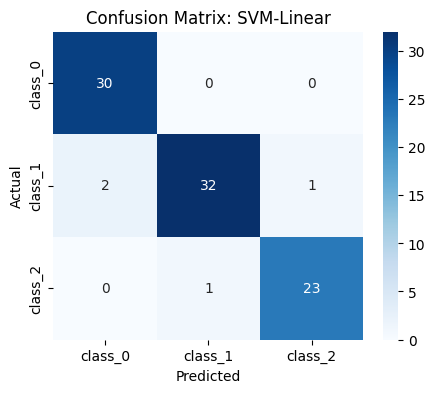

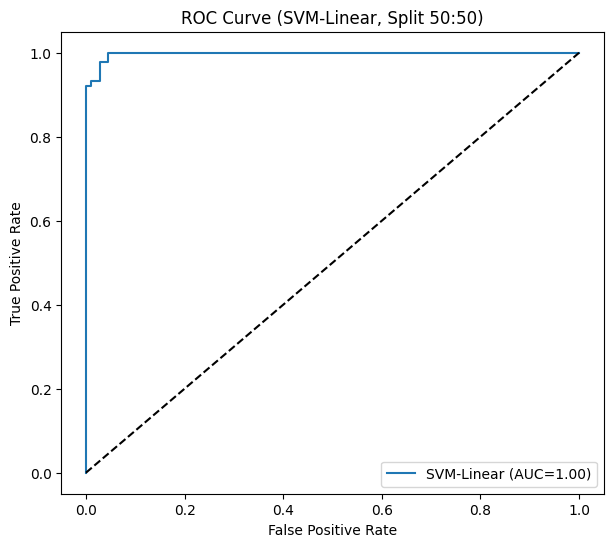



========= SVM-Linear | Train-Test Split 60:40 =========

===== SVM-Linear =====
Accuracy: 0.9583

Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        24
     class_1       0.96      0.93      0.95        29
     class_2       1.00      0.95      0.97        19

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72



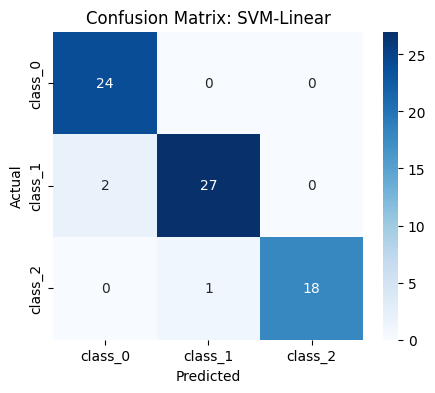

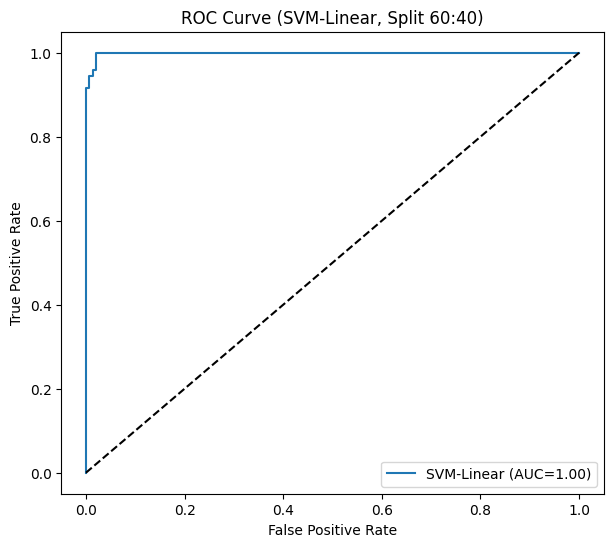



========= SVM-Linear | Train-Test Split 70:30 =========

===== SVM-Linear =====
Accuracy: 0.9630

Classification Report:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       0.95      0.95      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



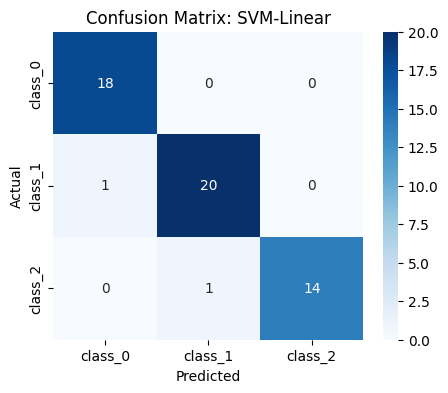

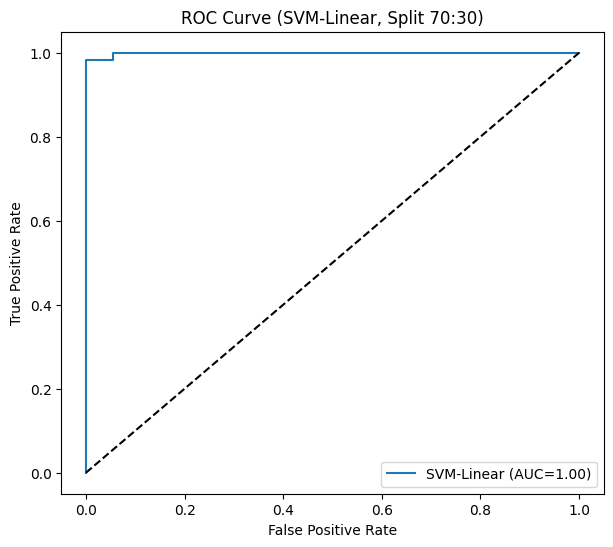



========= SVM-Linear | Train-Test Split 80:20 =========

===== SVM-Linear =====
Accuracy: 0.9444

Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       0.93      0.93      0.93        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



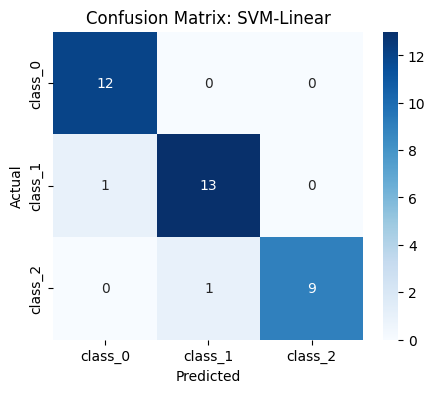

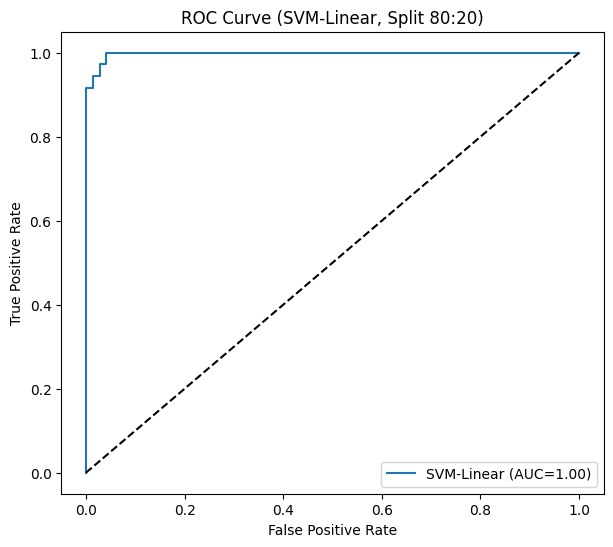

In [48]:
# Linear
run_classifier(SVC(kernel="linear", probability=True, random_state=42), "SVM-Linear")



========= SVM-Polynomial | Train-Test Split 50:50 =========

===== SVM-Polynomial =====
Accuracy: 0.8539

Classification Report:
              precision    recall  f1-score   support

     class_0       0.91      0.70      0.79        30
     class_1       0.75      0.94      0.84        35
     class_2       1.00      0.92      0.96        24

    accuracy                           0.85        89
   macro avg       0.89      0.85      0.86        89
weighted avg       0.87      0.85      0.85        89



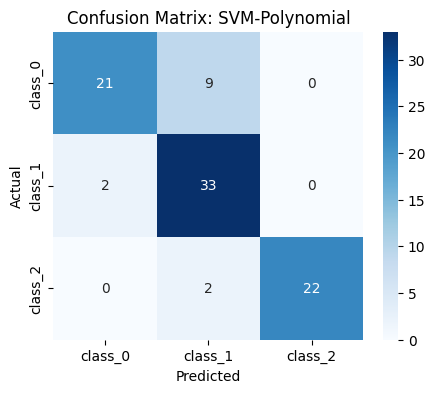

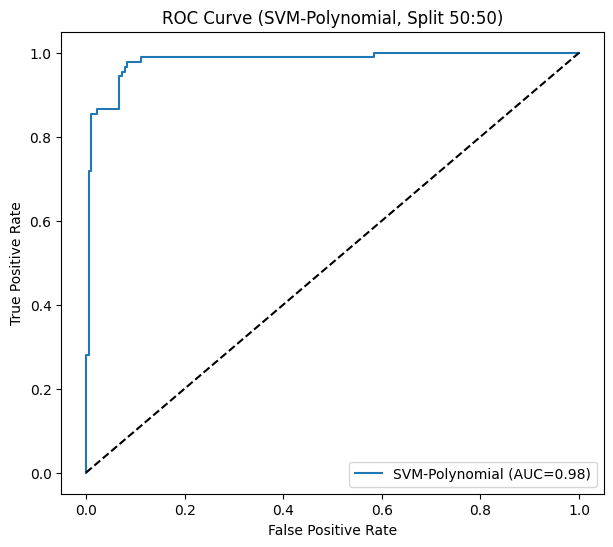



========= SVM-Polynomial | Train-Test Split 60:40 =========

===== SVM-Polynomial =====
Accuracy: 0.8889

Classification Report:
              precision    recall  f1-score   support

     class_0       0.95      0.79      0.86        24
     class_1       0.80      0.97      0.88        29
     class_2       1.00      0.89      0.94        19

    accuracy                           0.89        72
   macro avg       0.92      0.88      0.89        72
weighted avg       0.90      0.89      0.89        72



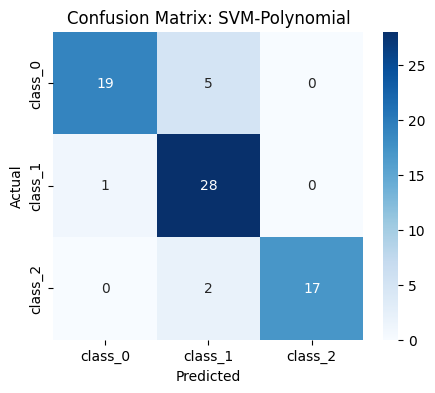

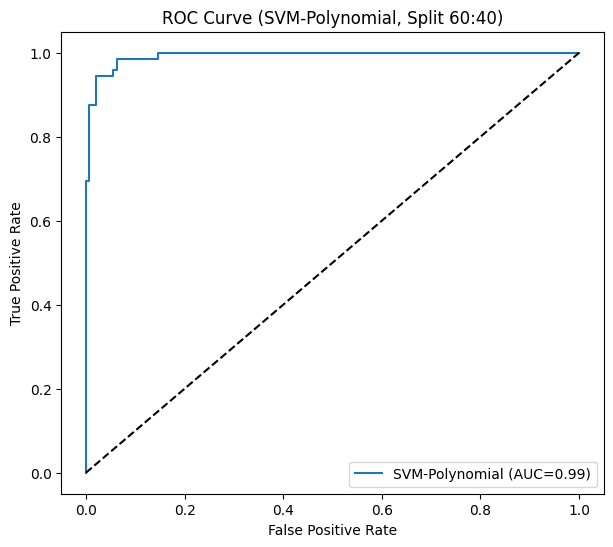



========= SVM-Polynomial | Train-Test Split 70:30 =========

===== SVM-Polynomial =====
Accuracy: 0.9444

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        18
     class_1       0.88      1.00      0.93        21
     class_2       1.00      0.87      0.93        15

    accuracy                           0.94        54
   macro avg       0.96      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54



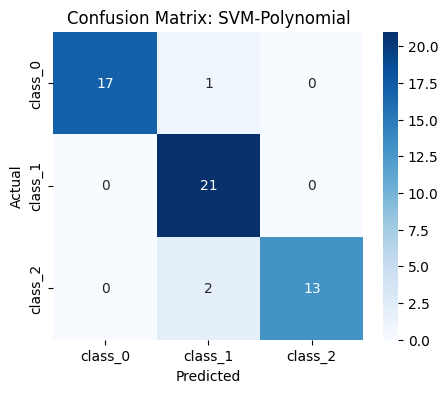

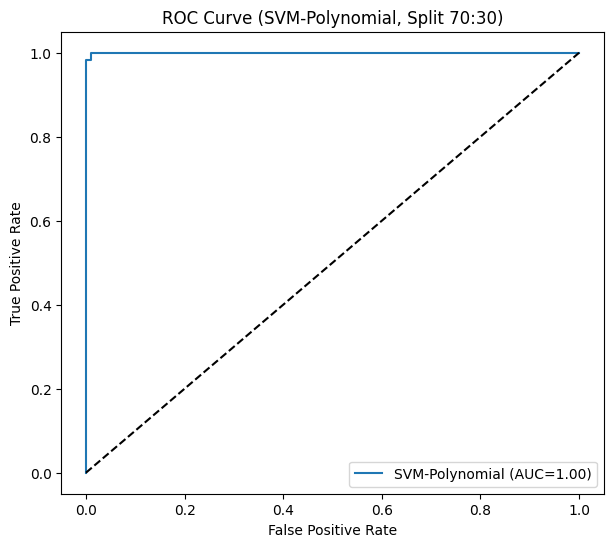



========= SVM-Polynomial | Train-Test Split 80:20 =========

===== SVM-Polynomial =====
Accuracy: 0.9444

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.80      0.89        10

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



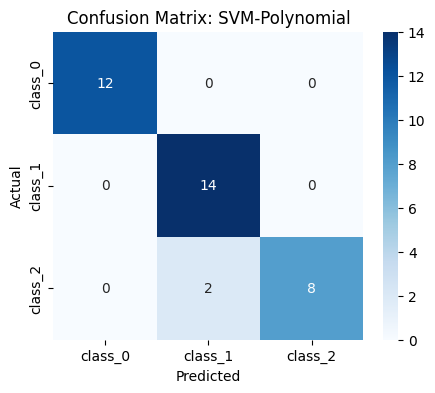

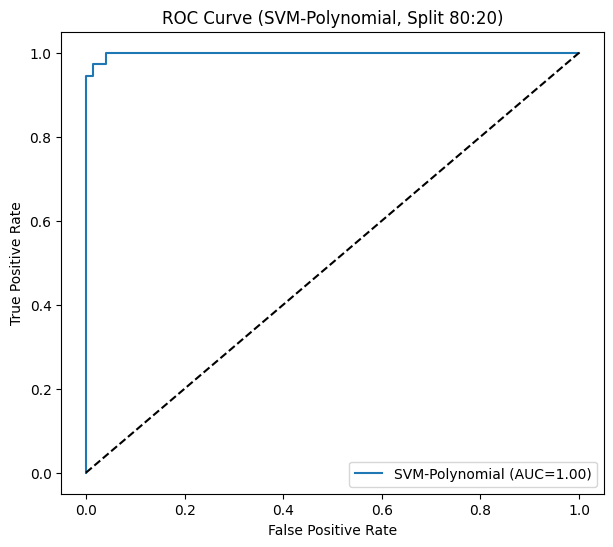

In [49]:
# Polynomial
run_classifier(SVC(kernel="poly", degree=3, probability=True, random_state=42), "SVM-Polynomial")



========= SVM-RBF | Train-Test Split 50:50 =========

===== SVM-RBF =====
Accuracy: 0.9775

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        30
     class_1       0.97      0.97      0.97        35
     class_2       0.96      0.96      0.96        24

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



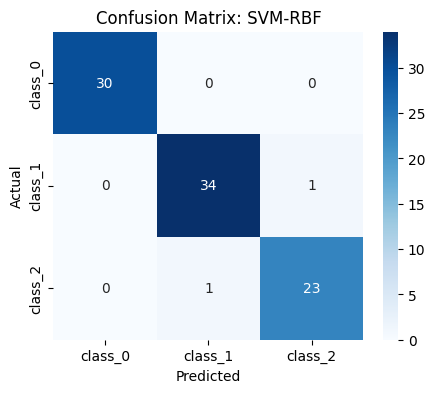

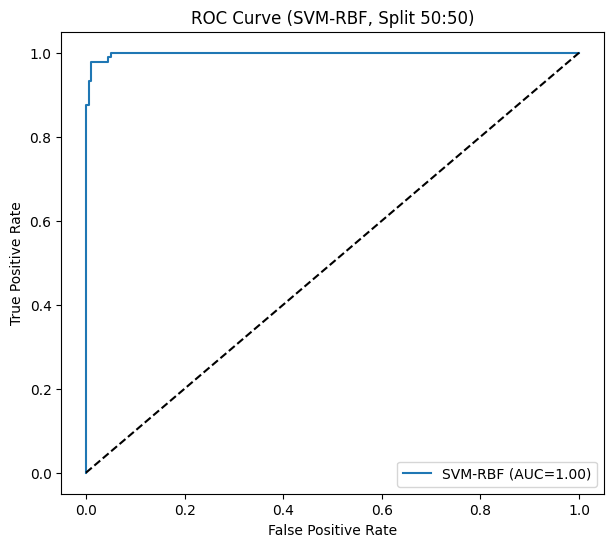



========= SVM-RBF | Train-Test Split 60:40 =========

===== SVM-RBF =====
Accuracy: 0.9861

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        24
     class_1       0.97      1.00      0.98        29
     class_2       1.00      0.95      0.97        19

    accuracy                           0.99        72
   macro avg       0.99      0.98      0.99        72
weighted avg       0.99      0.99      0.99        72



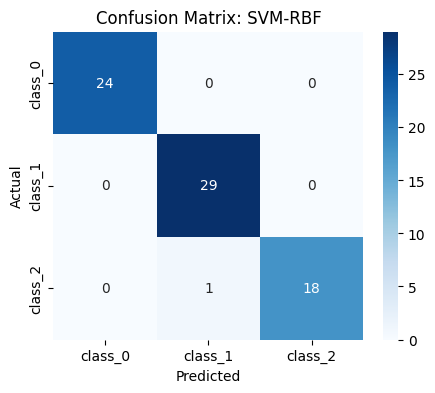

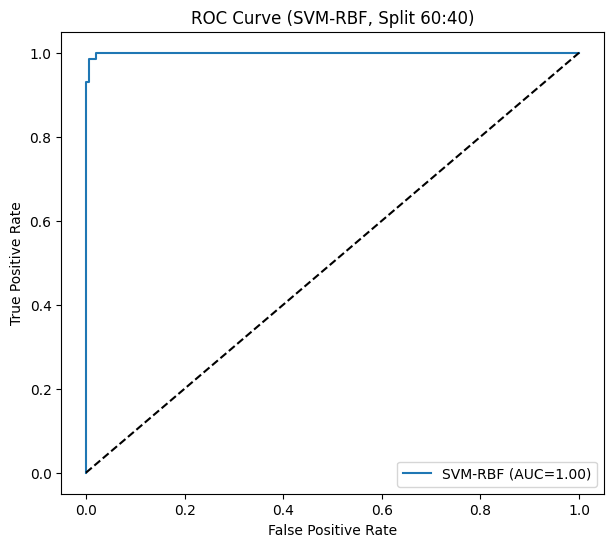



========= SVM-RBF | Train-Test Split 70:30 =========

===== SVM-RBF =====
Accuracy: 0.9815

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



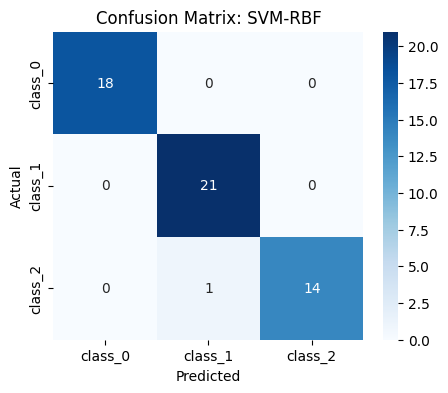

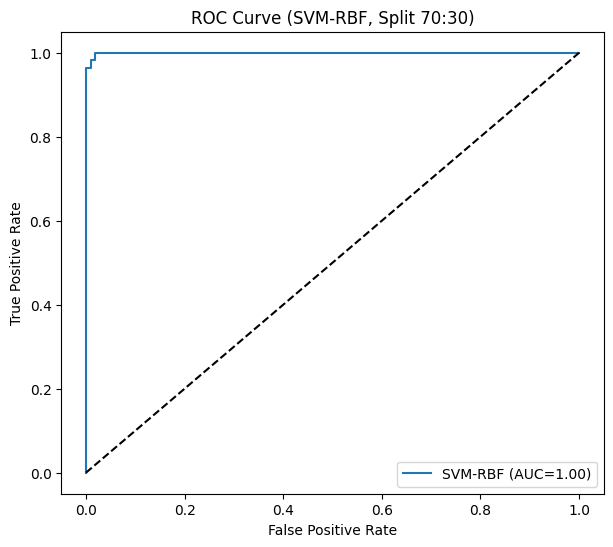



========= SVM-RBF | Train-Test Split 80:20 =========

===== SVM-RBF =====
Accuracy: 0.9722

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



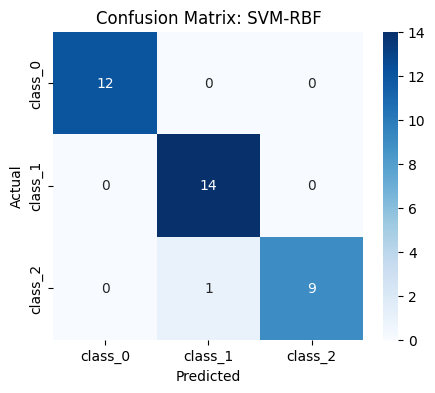

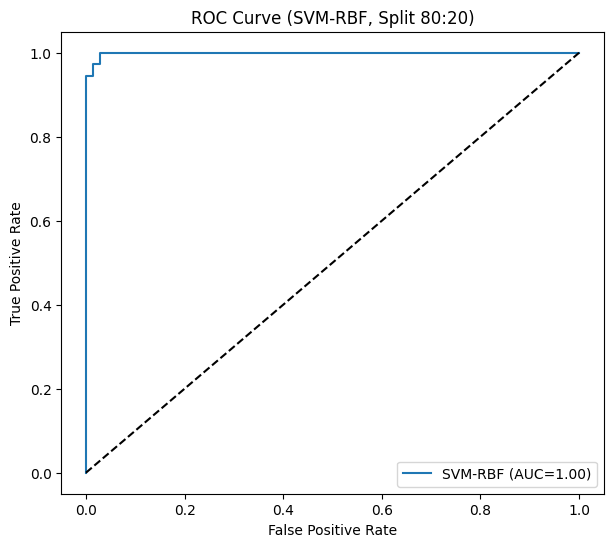

In [50]:
# Gaussian (RBF)
run_classifier(SVC(kernel="rbf", probability=True, random_state=42), "SVM-RBF")



========= SVM-Sigmoid | Train-Test Split 50:50 =========

===== SVM-Sigmoid =====
Accuracy: 0.9775

Classification Report:
              precision    recall  f1-score   support

     class_0       0.97      1.00      0.98        30
     class_1       1.00      0.94      0.97        35
     class_2       0.96      1.00      0.98        24

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



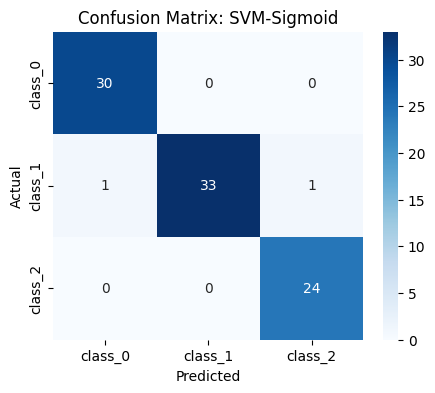

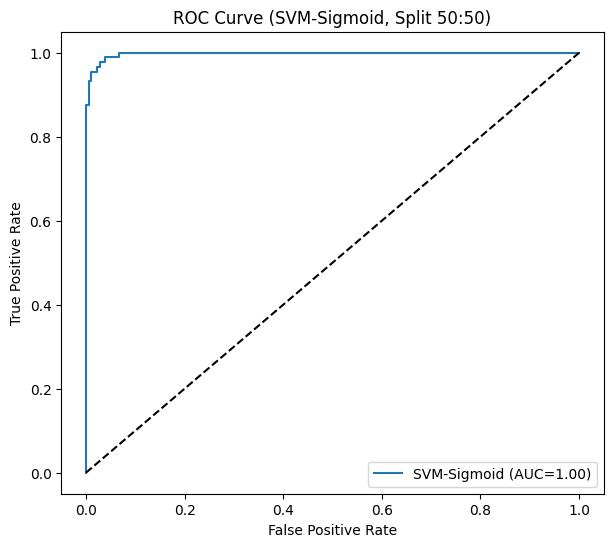



========= SVM-Sigmoid | Train-Test Split 60:40 =========

===== SVM-Sigmoid =====
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        24
     class_1       1.00      1.00      1.00        29
     class_2       1.00      1.00      1.00        19

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



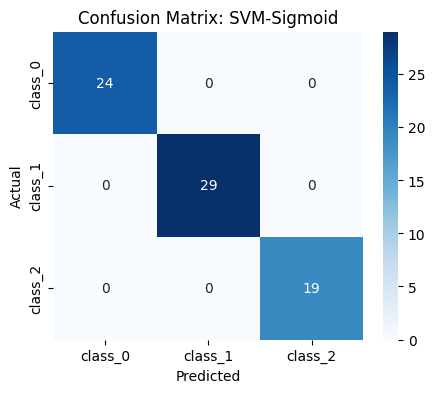

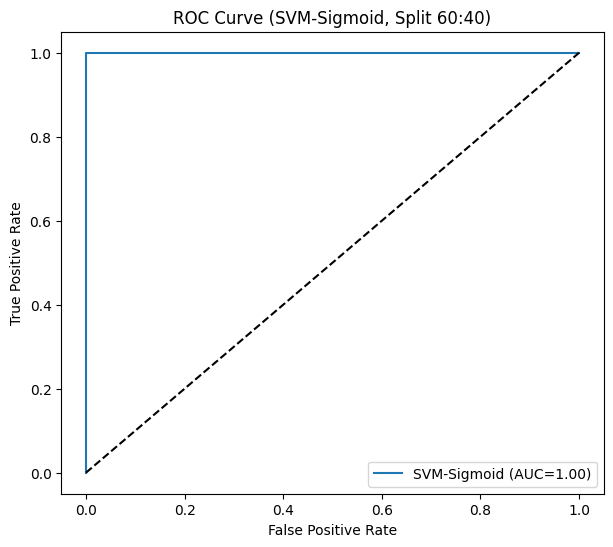



========= SVM-Sigmoid | Train-Test Split 70:30 =========

===== SVM-Sigmoid =====
Accuracy: 0.9630

Classification Report:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.90      0.95        21
     class_2       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



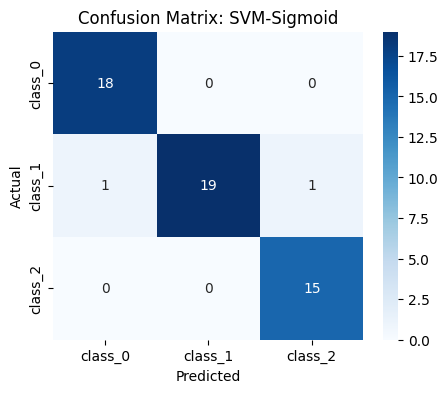

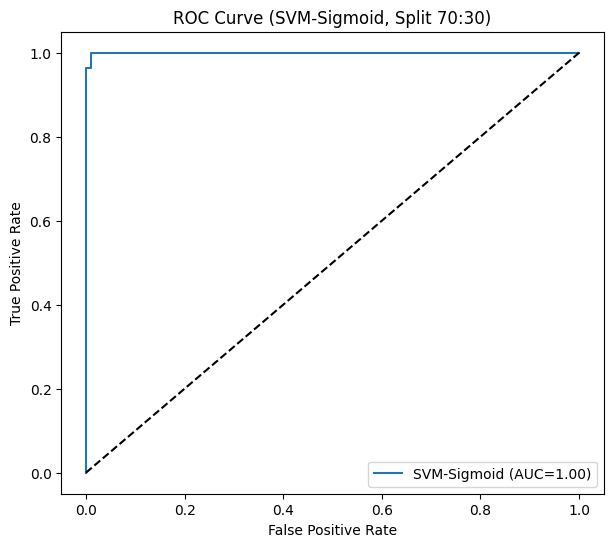



========= SVM-Sigmoid | Train-Test Split 80:20 =========

===== SVM-Sigmoid =====
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



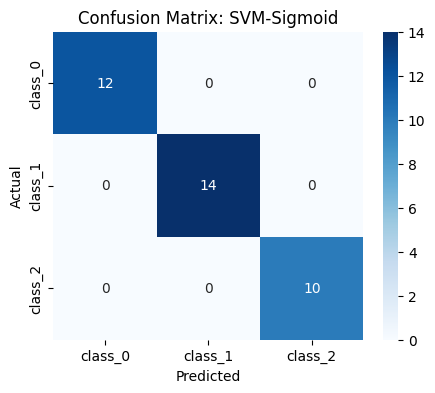

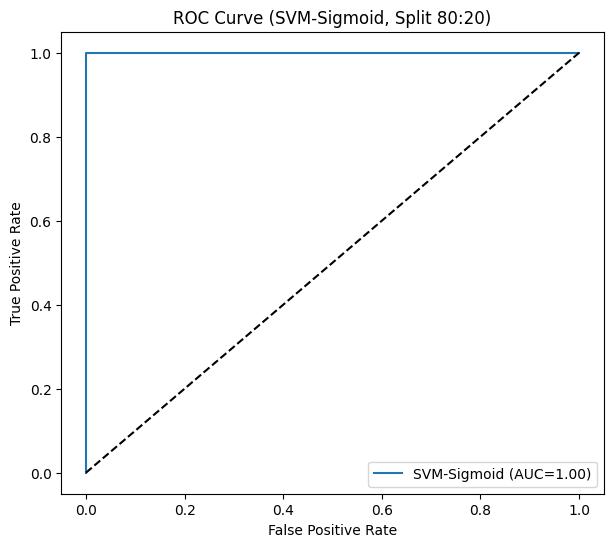

In [51]:
# Sigmoid
run_classifier(SVC(kernel="sigmoid", probability=True, random_state=42), "SVM-Sigmoid")

**MLP CLASSIFIER **



========= MLP (momentum=0.9, lr=0.01, epochs=500) | Train-Test Split 50:50 =========

===== MLP (momentum=0.9, lr=0.01, epochs=500) =====
Accuracy: 0.9551

Classification Report:
              precision    recall  f1-score   support

     class_0       0.94      1.00      0.97        30
     class_1       0.97      0.91      0.94        35
     class_2       0.96      0.96      0.96        24

    accuracy                           0.96        89
   macro avg       0.96      0.96      0.96        89
weighted avg       0.96      0.96      0.95        89



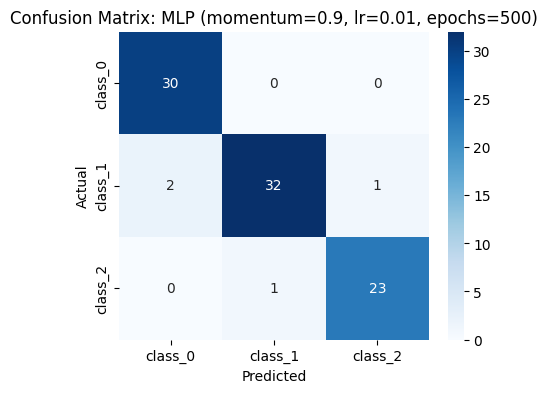

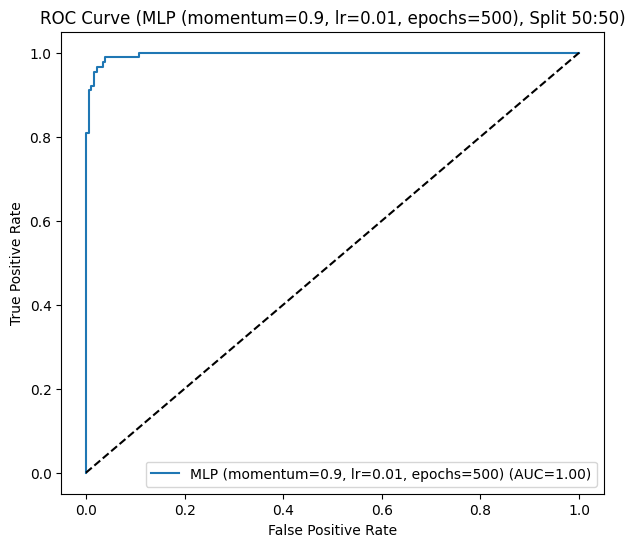



========= MLP (momentum=0.9, lr=0.01, epochs=500) | Train-Test Split 60:40 =========

===== MLP (momentum=0.9, lr=0.01, epochs=500) =====
Accuracy: 0.9444

Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        24
     class_1       0.96      0.90      0.93        29
     class_2       0.95      0.95      0.95        19

    accuracy                           0.94        72
   macro avg       0.94      0.95      0.95        72
weighted avg       0.95      0.94      0.94        72



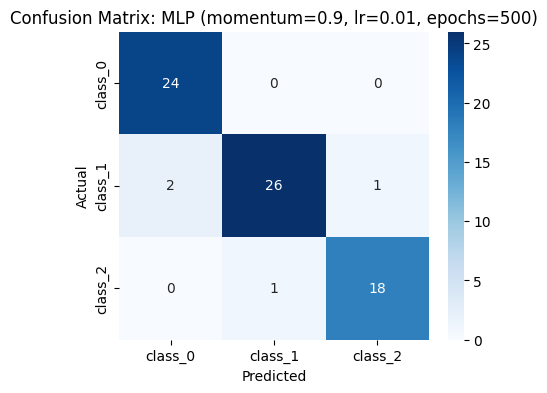

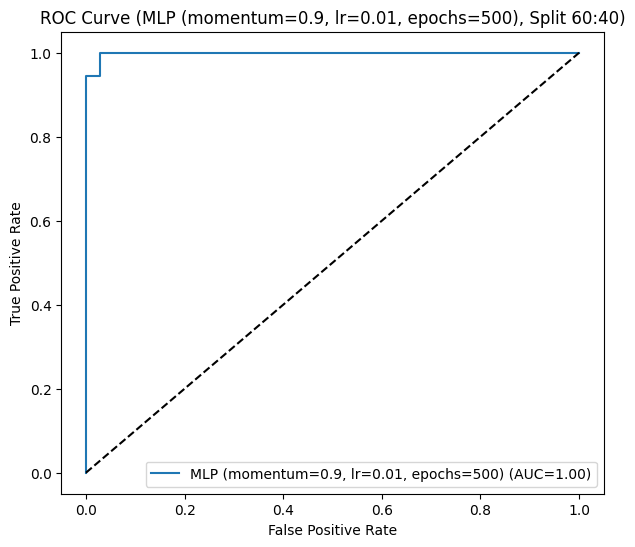



========= MLP (momentum=0.9, lr=0.01, epochs=500) | Train-Test Split 70:30 =========

===== MLP (momentum=0.9, lr=0.01, epochs=500) =====
Accuracy: 0.9630

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.95      0.95      0.95        21
     class_2       0.93      0.93      0.93        15

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



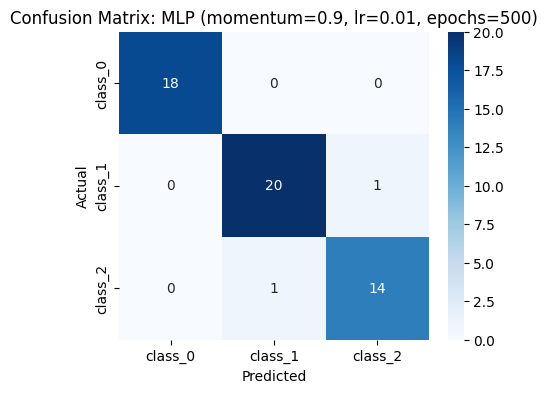

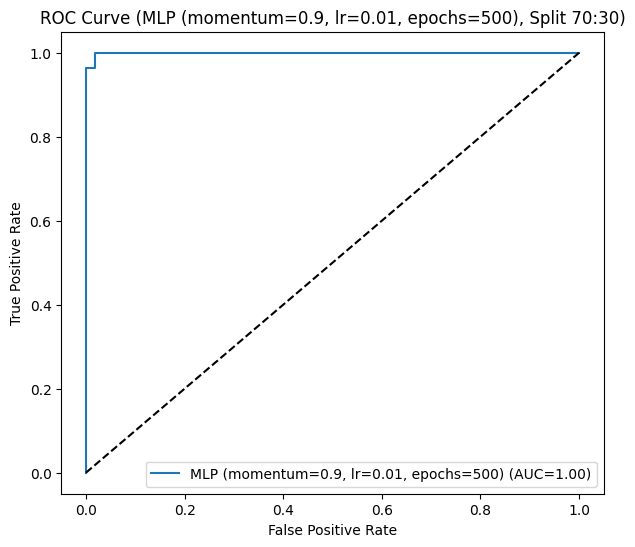



========= MLP (momentum=0.9, lr=0.01, epochs=500) | Train-Test Split 80:20 =========

===== MLP (momentum=0.9, lr=0.01, epochs=500) =====
Accuracy: 0.9722

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



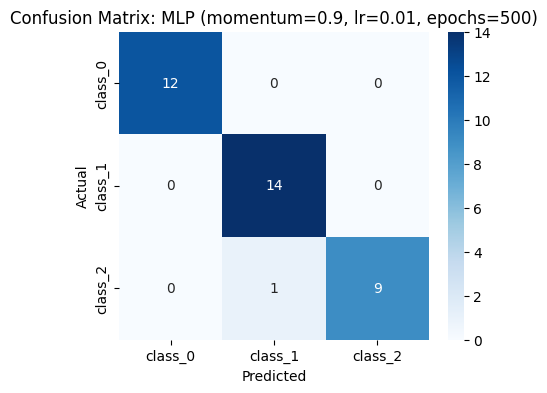

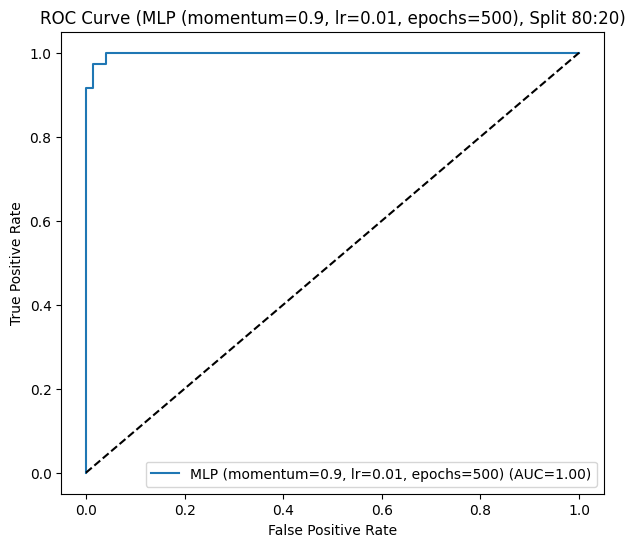

In [52]:
# Default MLP with momentum, learning rate, epochs
run_classifier(MLPClassifier(hidden_layer_sizes=(100,), learning_rate_init=0.01,
                             momentum=0.9, max_iter=500, random_state=42),
               "MLP (momentum=0.9, lr=0.01, epochs=500)")


**RANDOM FOREST CLASSIFIER**



========= Random Forest (200 trees, depth=10) | Train-Test Split 50:50 =========

===== Random Forest (200 trees, depth=10) =====
Accuracy: 0.9775

Classification Report:
              precision    recall  f1-score   support

     class_0       0.97      1.00      0.98        30
     class_1       1.00      0.94      0.97        35
     class_2       0.96      1.00      0.98        24

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



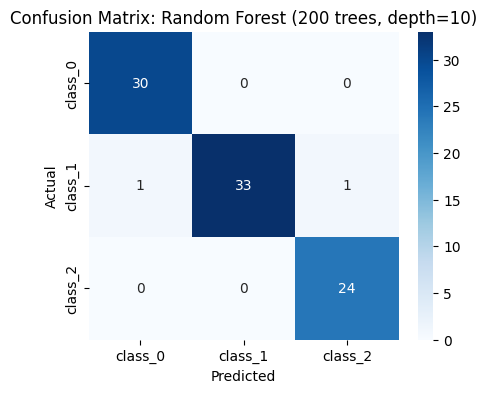

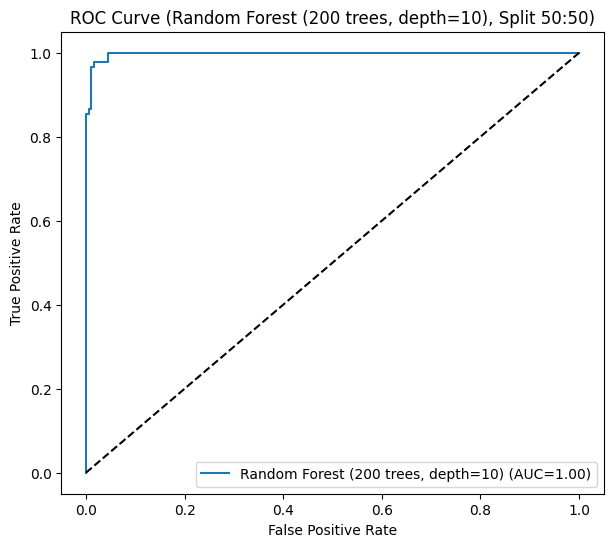



========= Random Forest (200 trees, depth=10) | Train-Test Split 60:40 =========

===== Random Forest (200 trees, depth=10) =====
Accuracy: 0.9861

Classification Report:
              precision    recall  f1-score   support

     class_0       0.96      1.00      0.98        24
     class_1       1.00      0.97      0.98        29
     class_2       1.00      1.00      1.00        19

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



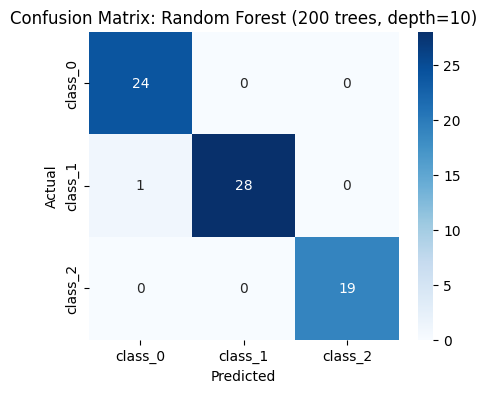

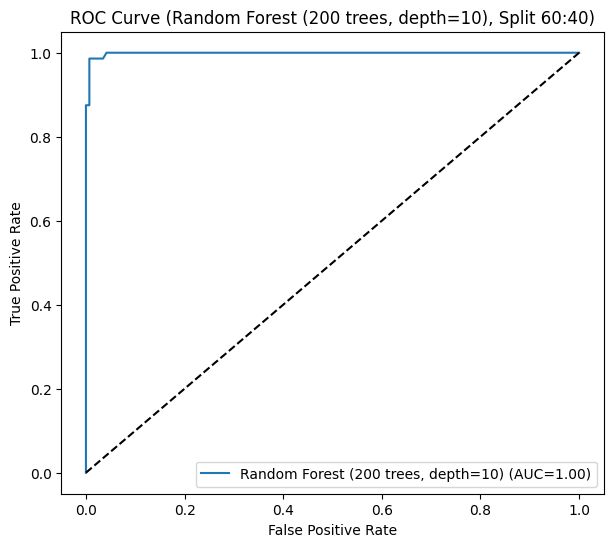



========= Random Forest (200 trees, depth=10) | Train-Test Split 70:30 =========

===== Random Forest (200 trees, depth=10) =====
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



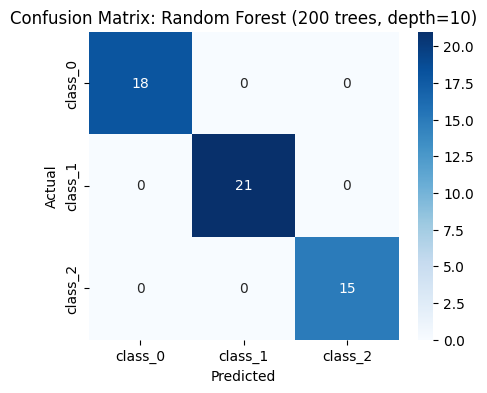

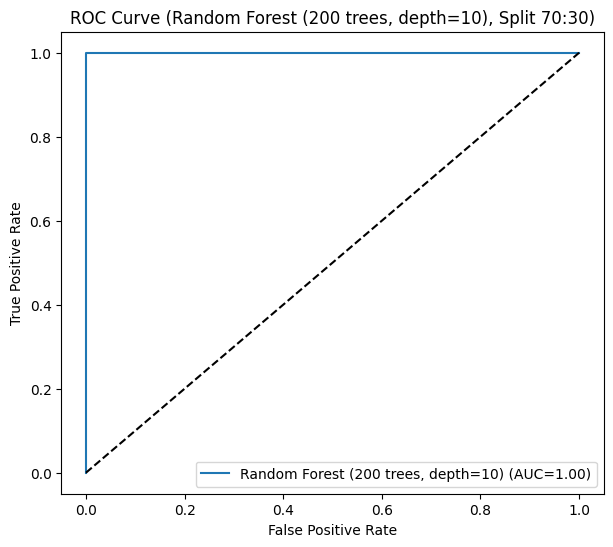



========= Random Forest (200 trees, depth=10) | Train-Test Split 80:20 =========

===== Random Forest (200 trees, depth=10) =====
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



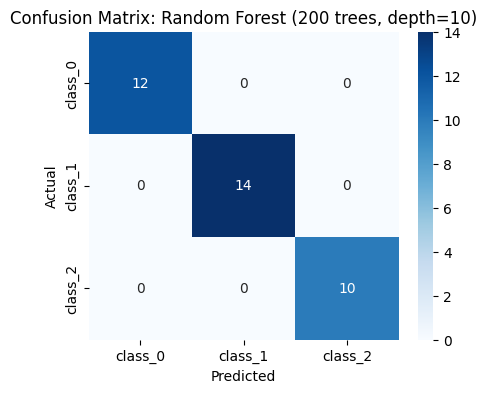

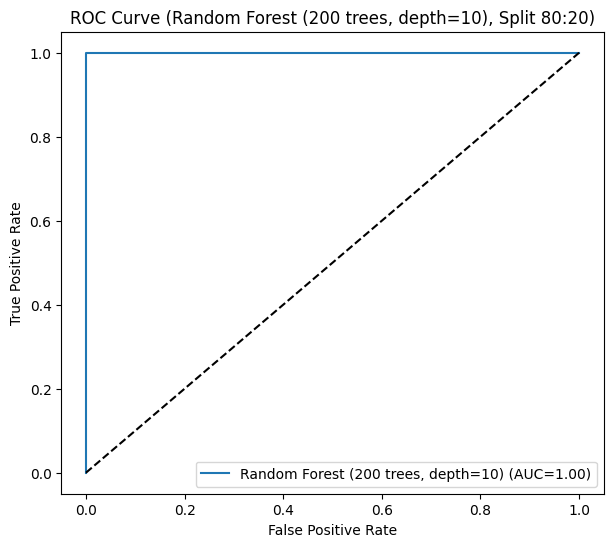

In [53]:
run_classifier(RandomForestClassifier(n_estimators=200, max_depth=10,
                                      random_state=42), "Random Forest (200 trees, depth=10)")

**PCA COMPONENT REDUCTION**

In [54]:
def run_classifier_with_data(clf, name, X, y, test_size=0.2, n_components=None):
    """
    Runs training + evaluation on either raw or PCA-reduced data
    """
    # Apply PCA if required
    if n_components is not None:
        pca = PCA(n_components=n_components)
        X = pca.fit_transform(X)
        print(f"\n>>> PCA applied: {n_components} components <<<")

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    # Fit + Evaluate
    acc, y_pred = evaluate_and_plot(clf, X_train, X_test, y_train, y_test, name)

    # ROC curve
    plot_roc_curves({name: clf}, X_test, y_test, f"ROC Curve ({name})")

    return acc



>>> PCA applied: 2 components <<<

===== PCA + SVM-Linear =====
Accuracy: 0.9167

Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      0.92      0.92        12
     class_1       0.87      0.93      0.90        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



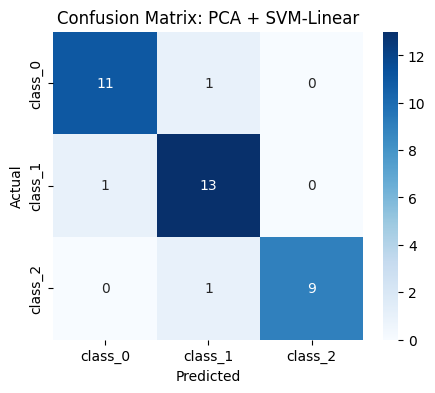

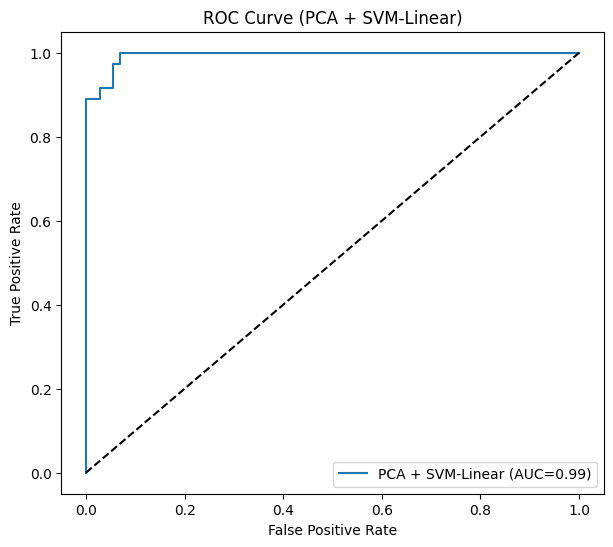

0.9166666666666666

In [55]:
run_classifier_with_data(SVC(kernel="linear", probability=True, random_state=42),
                         "PCA + SVM-Linear", X, y, n_components=2)


>>> PCA applied: 2 components <<<

===== PCA + SVM-Polynomial =====
Accuracy: 0.8889

Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      0.92      0.92        12
     class_1       0.81      0.93      0.87        14
     class_2       1.00      0.80      0.89        10

    accuracy                           0.89        36
   macro avg       0.91      0.88      0.89        36
weighted avg       0.90      0.89      0.89        36



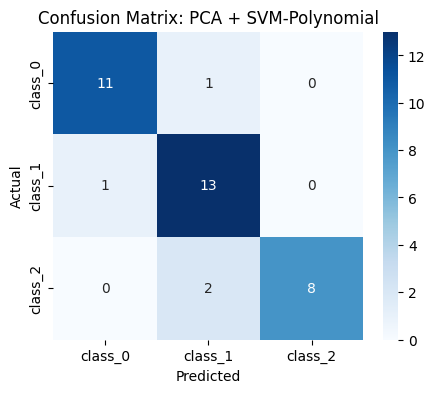

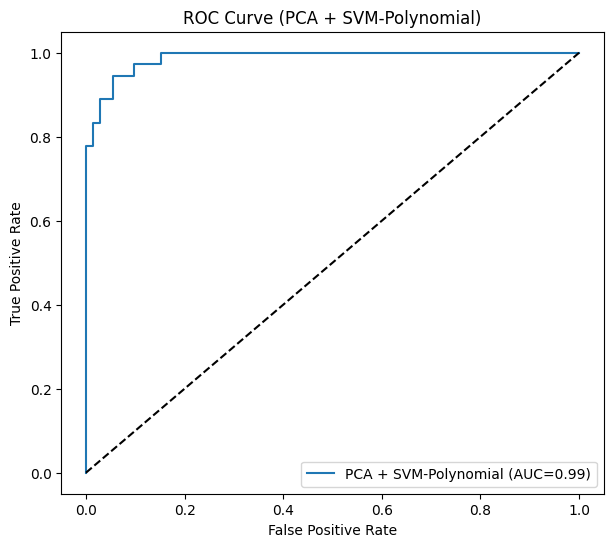

0.8888888888888888

In [56]:
run_classifier_with_data(SVC(kernel="poly", probability=True, random_state=42),
                         "PCA + SVM-Polynomial", X, y, n_components=2)


>>> PCA applied: 2 components <<<

===== PCA + SVM-RBF =====
Accuracy: 0.9167

Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      0.92      0.92        12
     class_1       0.87      0.93      0.90        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



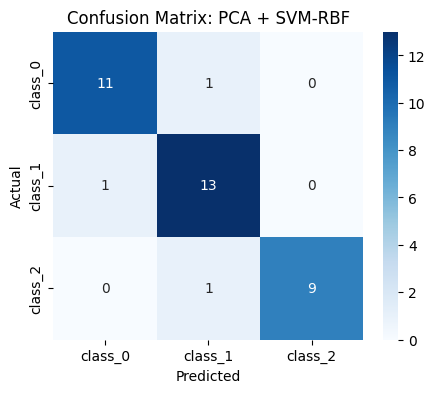

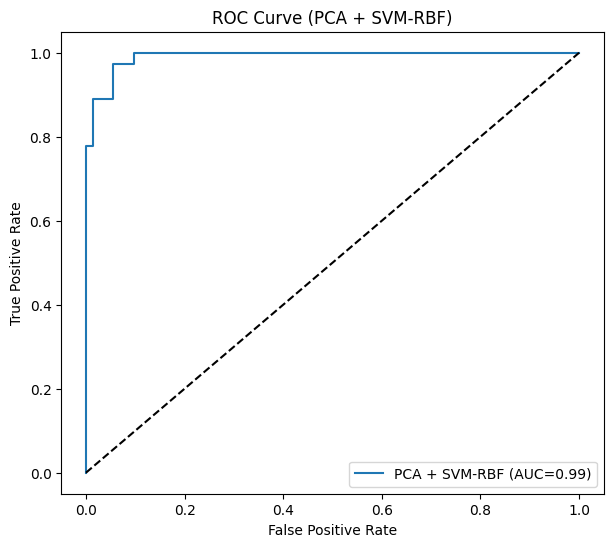

0.9166666666666666

In [57]:
run_classifier_with_data(SVC(kernel="rbf", probability=True, random_state=42),
                         "PCA + SVM-RBF", X, y, n_components=2)


>>> PCA applied: 2 components <<<

===== PCA + SVM-Sigmoid =====
Accuracy: 0.9444

Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      0.92      0.92        12
     class_1       0.93      0.93      0.93        14
     class_2       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



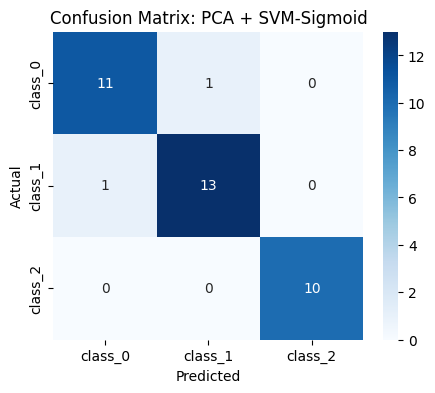

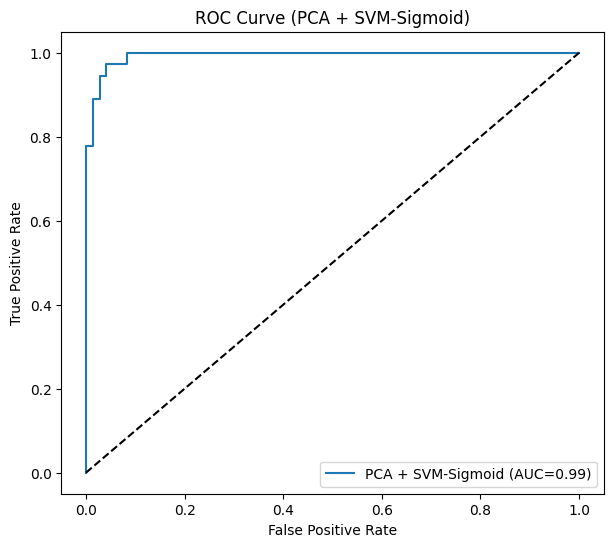

0.9444444444444444

In [58]:
run_classifier_with_data(SVC(kernel="sigmoid", probability=True, random_state=42),
                         "PCA + SVM-Sigmoid", X, y, n_components=2)


>>> PCA applied: 2 components <<<

===== PCA + MLP =====
Accuracy: 0.9167

Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      0.92      0.92        12
     class_1       0.87      0.93      0.90        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



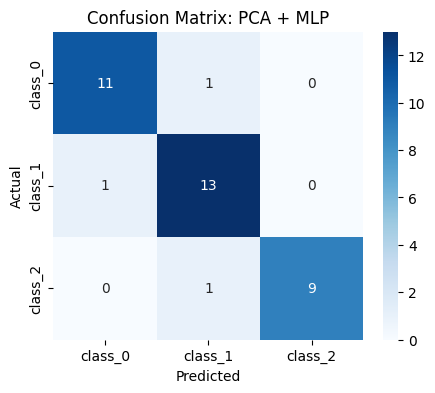

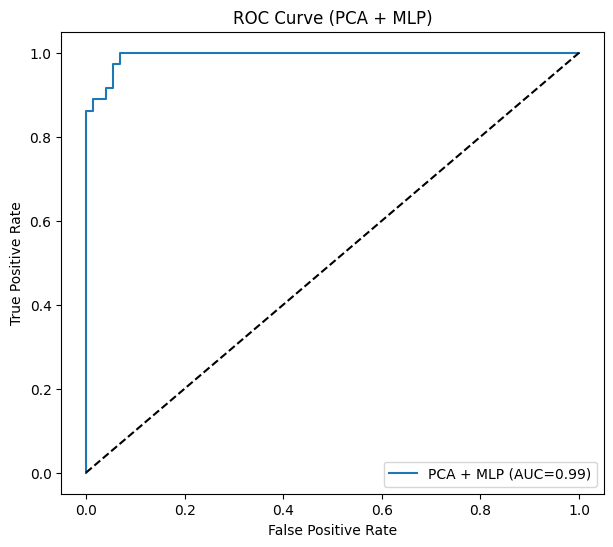

0.9166666666666666

In [59]:
run_classifier_with_data(MLPClassifier(hidden_layer_sizes=(100,), max_iter=500,
                                       learning_rate_init=0.001, momentum=0.9,
                                       random_state=42),
                         "PCA + MLP", X, y, n_components=2)


>>> PCA applied: 2 components <<<

===== PCA + Random Forest =====
Accuracy: 0.9167

Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      0.92      0.92        12
     class_1       0.87      0.93      0.90        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



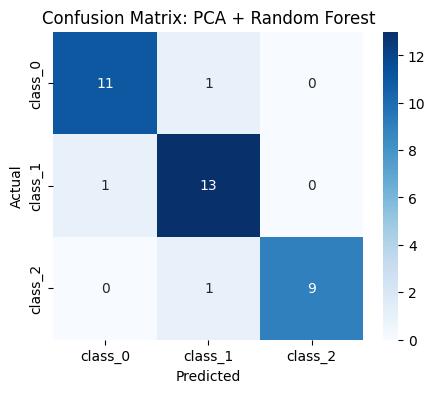

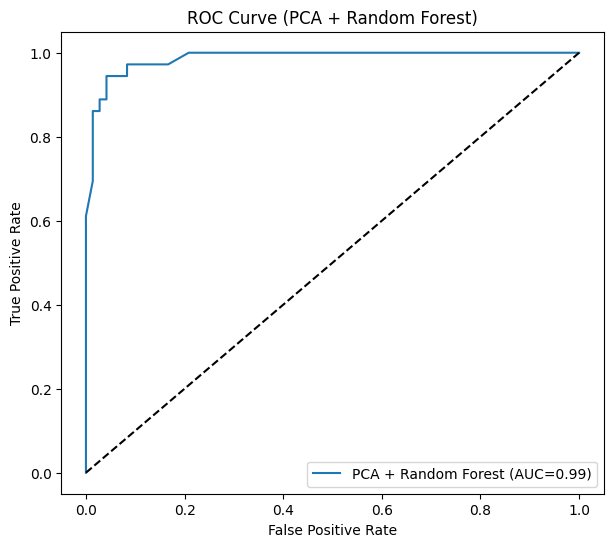

0.9166666666666666

In [60]:
run_classifier_with_data(RandomForestClassifier(n_estimators=100, random_state=42),
                         "PCA + Random Forest", X, y, n_components=2)

**HANDWRITTEN DIGIT DATASET**

Shape of features: (1797, 64)
Shape of labels: (1797,)
Number of classes: 10


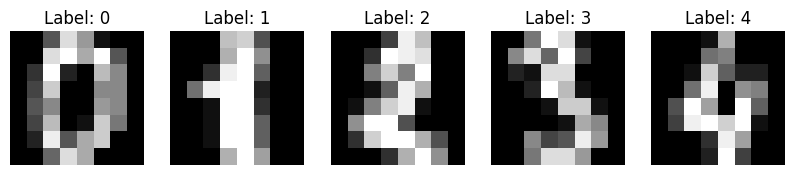

In [61]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

print("Shape of features:", X.shape)
print("Shape of labels:", y.shape)
print("Number of classes:", len(set(y)))

# Visualize first 5 images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.show()

In [62]:
from sklearn.metrics import (classification_report, confusion_matrix,
                             ConfusionMatrixDisplay, roc_curve, auc)
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import label_binarize
import numpy as np

def evaluate_model(model, X, y, model_name="Model"):
    splits = [0.5, 0.4, 0.3, 0.2]  # test sizes → 50:50, 60:40, 70:30, 80:20
    classes = np.unique(y)

    for test_size in splits:
        print(f"\n==== {model_name} | Train-Test Split {int((1-test_size)*100)}:{int(test_size*100)} ====")

        # Split dataset
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )

        # Train
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Metrics
        print(classification_report(y_test, y_pred, digits=4))

        # Confusion Matrix Heatmap
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap="Blues", xticks_rotation=45)
        plt.title(f"{model_name} | Split {int((1-test_size)*100)}:{int(test_size*100)}")
        plt.show()

        # ROC & AUC (multiclass)
        try:
            y_test_bin = label_binarize(y_test, classes=classes)
            if hasattr(model, "predict_proba"):
                y_score = model.predict_proba(X_test)
            else:
                y_score = model.decision_function(X_test)

            fpr, tpr, roc_auc = {}, {}, {}
            for i in range(len(classes)):
                fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])

            plt.figure(figsize=(7, 5))
            for i in range(len(classes)):
                plt.plot(fpr[i], tpr[i], lw=1,
                         label=f"Class {classes[i]} (AUC={roc_auc[i]:.2f})")
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title(f"ROC Curve - {model_name} | Split {int((1-test_size)*100)}:{int(test_size*100)}")
            plt.legend(loc="lower right", fontsize="small")
            plt.show()
        except Exception as e:
            print("ROC skipped:", e)

        # Learning Curve
        try:
            train_sizes, train_scores, test_scores = learning_curve(
                model, X_train, y_train, cv=3,
                train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
            )
            plt.figure()
            plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Train")
            plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Validation")
            plt.xlabel("Training Samples")
            plt.ylabel("Score")
            plt.title(f"Learning Curve - {model_name} | Split {int((1-test_size)*100)}:{int(test_size*100)}")
            plt.legend()
            plt.show()
        except Exception as e:
            print("Learning curve skipped:", e)

        # Loss Curve (only for MLP)
        if hasattr(model, "loss_curve_") and len(model.loss_curve_) > 0:
            plt.figure()
            plt.plot(model.loss_curve_)
            plt.xlabel("Iterations")
            plt.ylabel("Loss")
            plt.title(f"Loss Curve - {model_name} | Split {int((1-test_size)*100)}:{int(test_size*100)}")
            plt.show()



==== SVM-Linear | Train-Test Split 50:50 ====
              precision    recall  f1-score   support

           0     1.0000    0.9888    0.9944        89
           1     0.9184    0.9890    0.9524        91
           2     0.9886    0.9886    0.9886        88
           3     0.9890    0.9783    0.9836        92
           4     0.9891    1.0000    0.9945        91
           5     0.9889    0.9780    0.9834        91
           6     0.9890    0.9890    0.9890        91
           7     0.9565    0.9888    0.9724        89
           8     0.9518    0.9080    0.9294        87
           9     0.9651    0.9222    0.9432        90

    accuracy                         0.9733       899
   macro avg     0.9736    0.9731    0.9731       899
weighted avg     0.9737    0.9733    0.9732       899



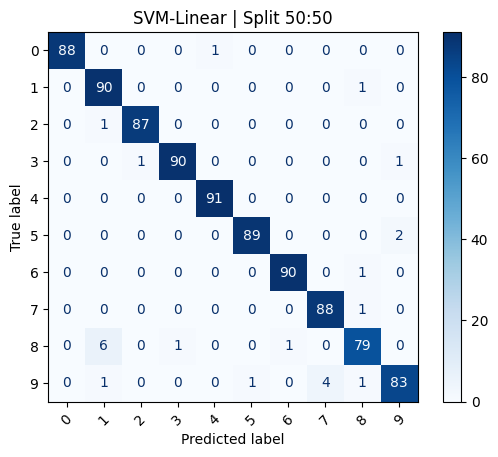

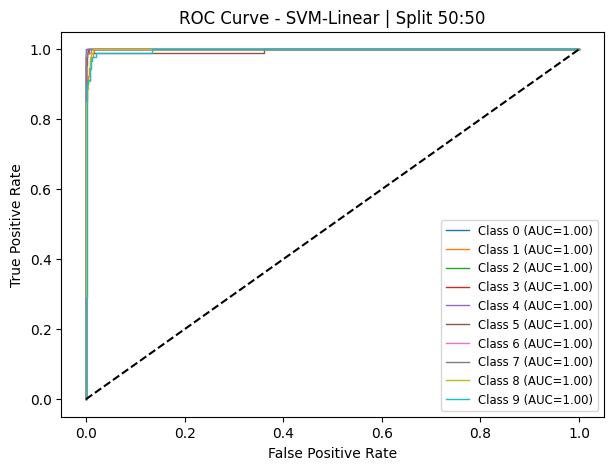

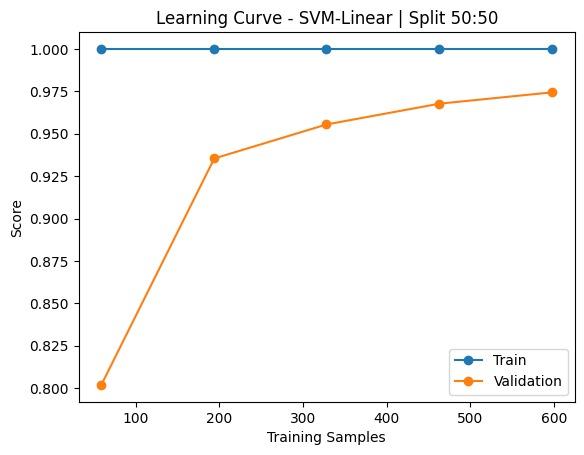


==== SVM-Linear | Train-Test Split 60:40 ====
              precision    recall  f1-score   support

           0     1.0000    0.9859    0.9929        71
           1     0.8780    0.9863    0.9290        73
           2     1.0000    0.9718    0.9857        71
           3     1.0000    0.9726    0.9861        73
           4     0.9863    1.0000    0.9931        72
           5     0.9730    0.9863    0.9796        73
           6     0.9861    0.9861    0.9861        72
           7     0.9600    1.0000    0.9796        72
           8     0.9836    0.8571    0.9160        70
           9     0.9444    0.9444    0.9444        72

    accuracy                         0.9694       719
   macro avg     0.9711    0.9691    0.9693       719
weighted avg     0.9709    0.9694    0.9693       719



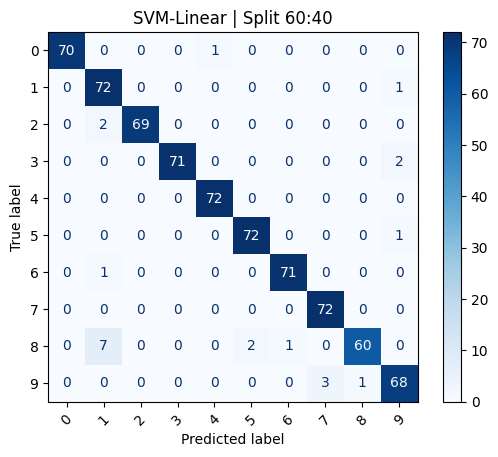

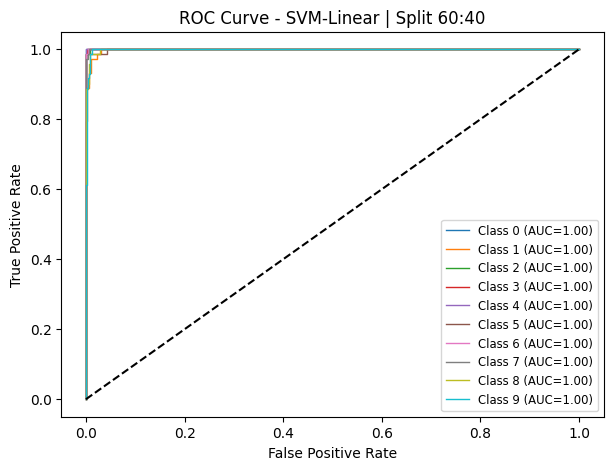

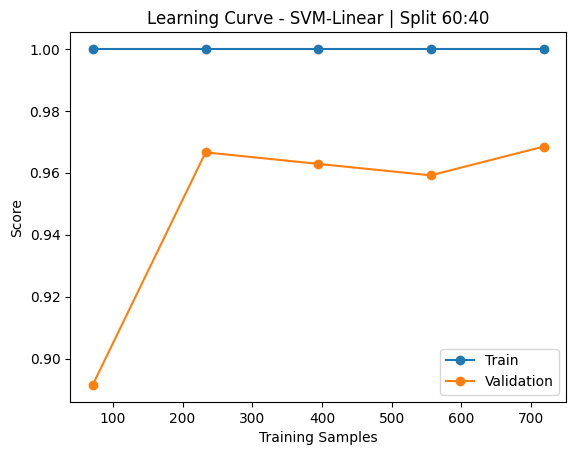


==== SVM-Linear | Train-Test Split 70:30 ====
              precision    recall  f1-score   support

           0     1.0000    0.9815    0.9907        54
           1     0.9310    0.9818    0.9558        55
           2     1.0000    1.0000    1.0000        53
           3     1.0000    0.9818    0.9908        55
           4     0.9818    1.0000    0.9908        54
           5     0.9818    0.9818    0.9818        55
           6     0.9818    1.0000    0.9908        54
           7     0.9818    1.0000    0.9908        54
           8     0.9574    0.8654    0.9091        52
           9     0.9455    0.9630    0.9541        54

    accuracy                         0.9759       540
   macro avg     0.9761    0.9755    0.9755       540
weighted avg     0.9761    0.9759    0.9757       540



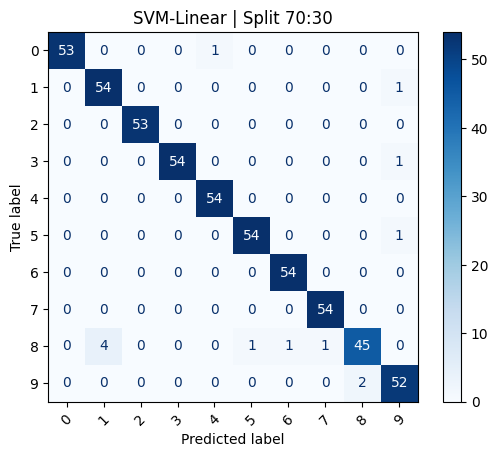

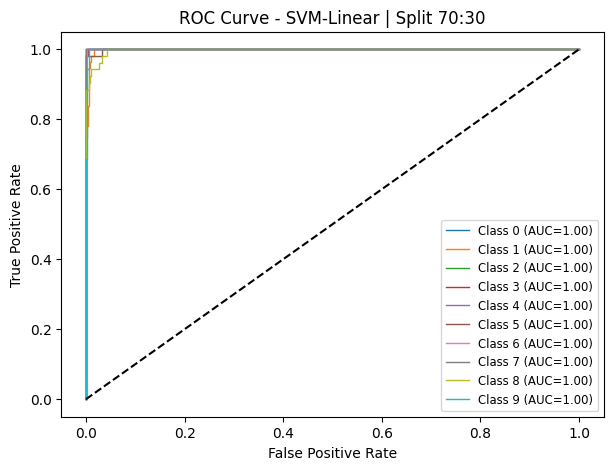

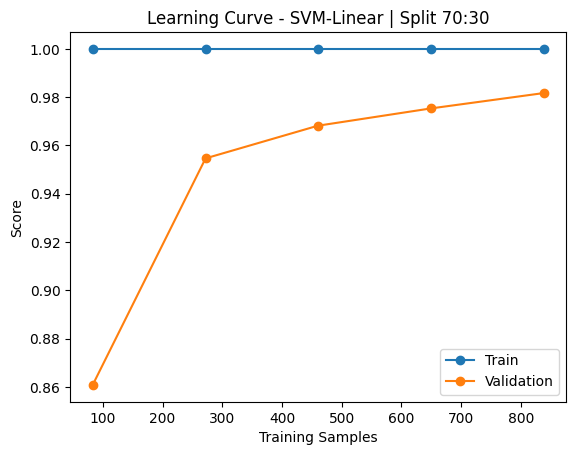


==== SVM-Linear | Train-Test Split 80:20 ====
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        36
           1     0.9189    0.9444    0.9315        36
           2     1.0000    1.0000    1.0000        35
           3     1.0000    0.9730    0.9863        37
           4     1.0000    1.0000    1.0000        36
           5     1.0000    1.0000    1.0000        37
           6     1.0000    0.9722    0.9859        36
           7     0.9730    1.0000    0.9863        36
           8     0.9394    0.8857    0.9118        35
           9     0.9474    1.0000    0.9730        36

    accuracy                         0.9778       360
   macro avg     0.9779    0.9775    0.9775       360
weighted avg     0.9780    0.9778    0.9777       360



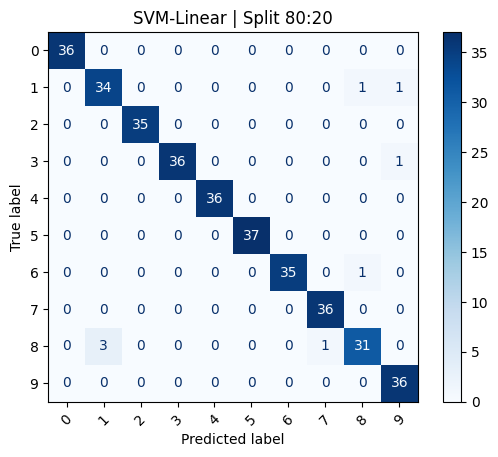

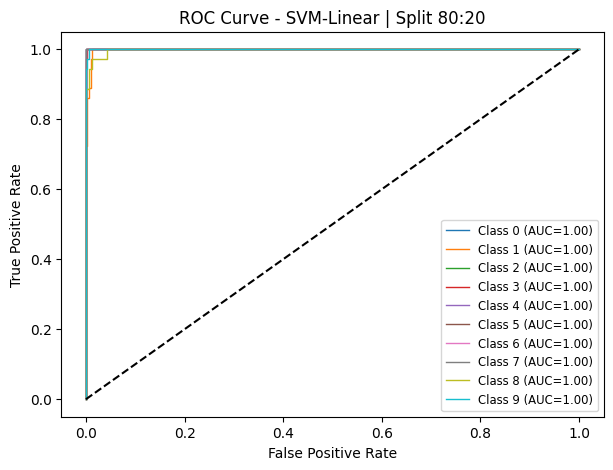

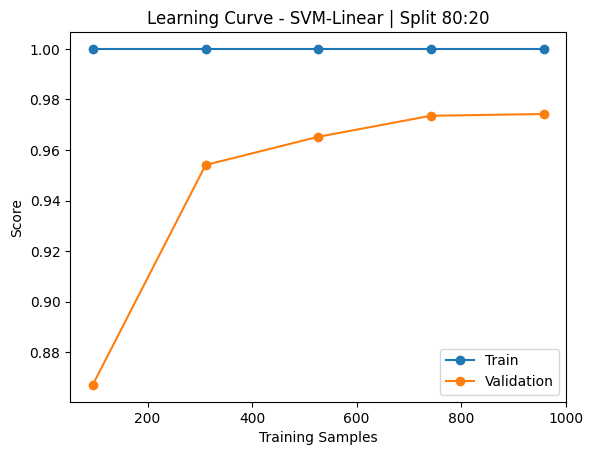

In [63]:
from sklearn.svm import SVC

# Linear SVM
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
evaluate_model(svm_linear, X, y, model_name="SVM-Linear")



==== SVM-Poly | Train-Test Split 50:50 ====
              precision    recall  f1-score   support

           0     1.0000    0.9888    0.9944        89
           1     0.9681    1.0000    0.9838        91
           2     0.9885    0.9773    0.9829        88
           3     1.0000    0.9783    0.9890        92
           4     0.9891    1.0000    0.9945        91
           5     0.9889    0.9780    0.9834        91
           6     1.0000    0.9890    0.9945        91
           7     0.9368    1.0000    0.9674        89
           8     0.9884    0.9770    0.9827        87
           9     0.9655    0.9333    0.9492        90

    accuracy                         0.9822       899
   macro avg     0.9825    0.9822    0.9822       899
weighted avg     0.9826    0.9822    0.9822       899



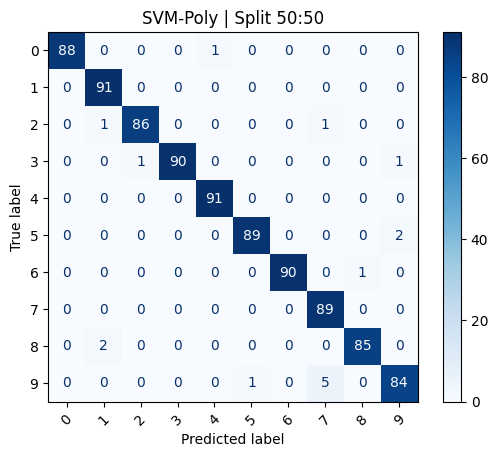

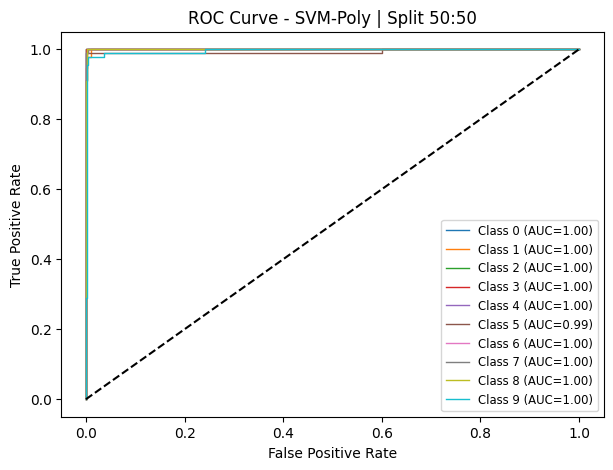

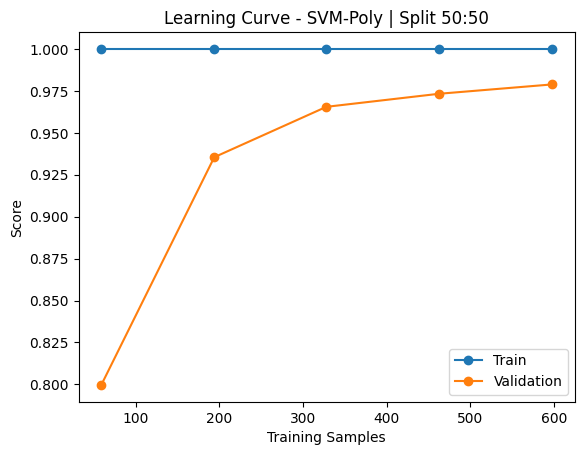


==== SVM-Poly | Train-Test Split 60:40 ====
              precision    recall  f1-score   support

           0     1.0000    0.9859    0.9929        71
           1     0.9481    1.0000    0.9733        73
           2     1.0000    0.9718    0.9857        71
           3     1.0000    1.0000    1.0000        73
           4     0.9863    1.0000    0.9931        72
           5     1.0000    0.9863    0.9931        73
           6     1.0000    0.9861    0.9930        72
           7     0.9600    1.0000    0.9796        72
           8     0.9853    0.9571    0.9710        70
           9     0.9859    0.9722    0.9790        72

    accuracy                         0.9861       719
   macro avg     0.9866    0.9860    0.9861       719
weighted avg     0.9865    0.9861    0.9861       719



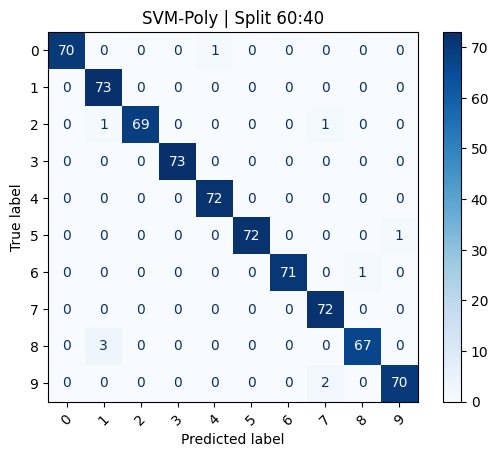

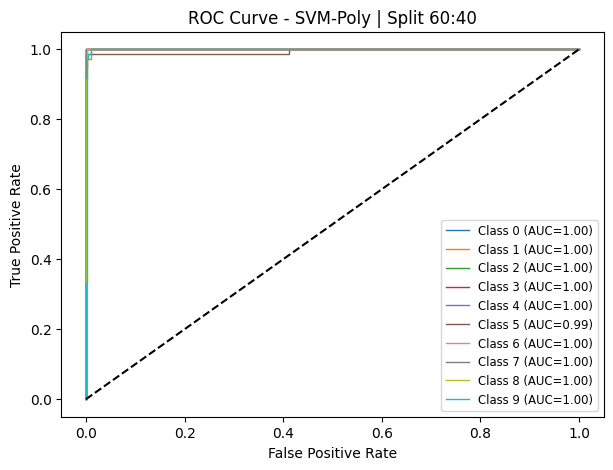

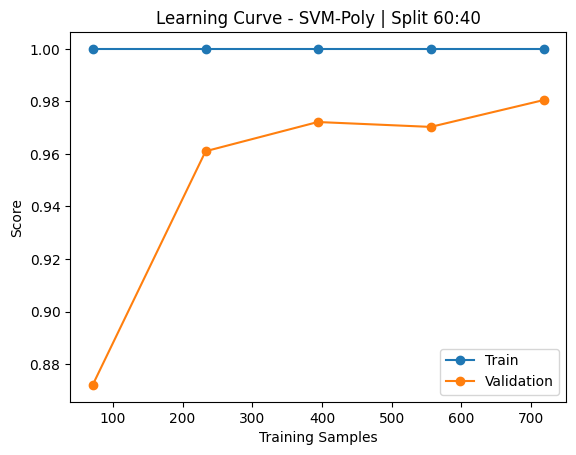


==== SVM-Poly | Train-Test Split 70:30 ====
              precision    recall  f1-score   support

           0     1.0000    0.9815    0.9907        54
           1     0.9649    1.0000    0.9821        55
           2     1.0000    1.0000    1.0000        53
           3     1.0000    1.0000    1.0000        55
           4     0.9818    1.0000    0.9908        54
           5     1.0000    0.9818    0.9908        55
           6     1.0000    0.9815    0.9907        54
           7     0.9818    1.0000    0.9908        54
           8     0.9804    0.9615    0.9709        52
           9     0.9815    0.9815    0.9815        54

    accuracy                         0.9889       540
   macro avg     0.9890    0.9888    0.9888       540
weighted avg     0.9890    0.9889    0.9889       540



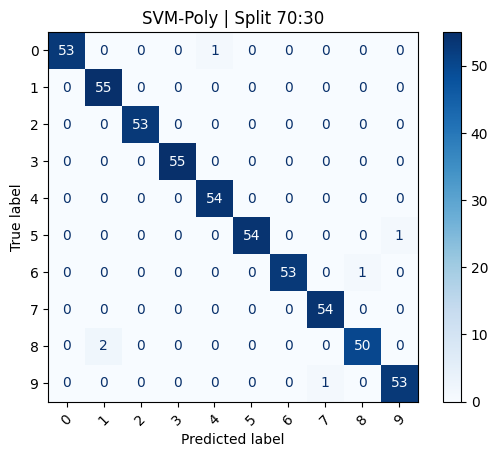

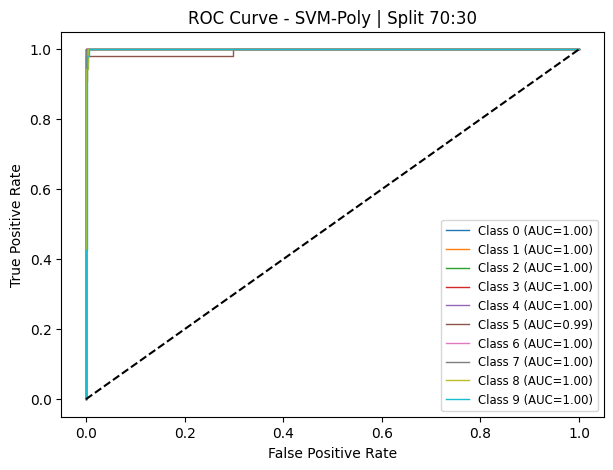

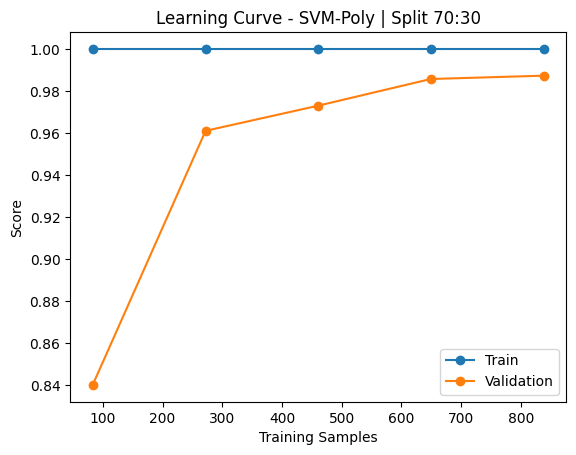


==== SVM-Poly | Train-Test Split 80:20 ====
              precision    recall  f1-score   support

           0     1.0000    0.9722    0.9859        36
           1     0.9474    1.0000    0.9730        36
           2     1.0000    1.0000    1.0000        35
           3     1.0000    1.0000    1.0000        37
           4     0.9730    1.0000    0.9863        36
           5     1.0000    1.0000    1.0000        37
           6     1.0000    0.9722    0.9859        36
           7     0.9730    1.0000    0.9863        36
           8     0.9706    0.9429    0.9565        35
           9     1.0000    0.9722    0.9859        36

    accuracy                         0.9861       360
   macro avg     0.9864    0.9860    0.9860       360
weighted avg     0.9865    0.9861    0.9861       360



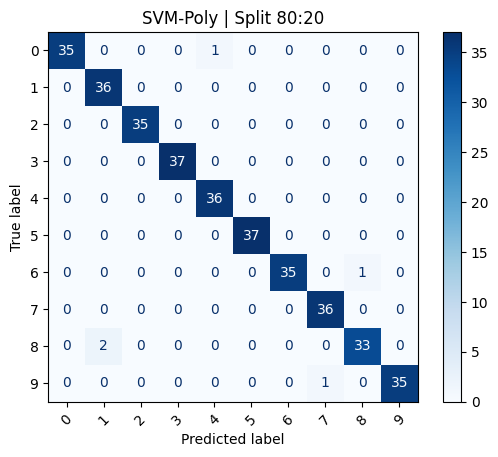

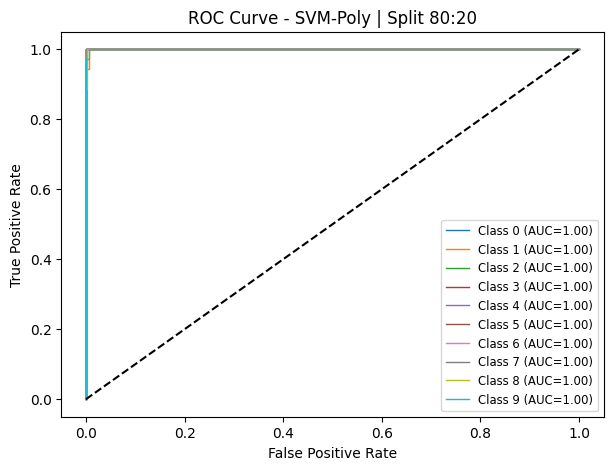

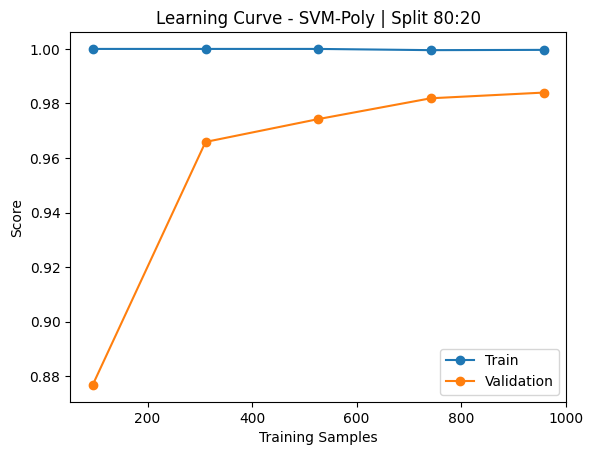

In [64]:
# Polynomial SVM
svm_poly = SVC(kernel='poly', probability=True, random_state=42)
evaluate_model(svm_poly, X, y, model_name="SVM-Poly")



==== SVM-RBF | Train-Test Split 50:50 ====
              precision    recall  f1-score   support

           0     1.0000    0.9888    0.9944        89
           1     0.9579    1.0000    0.9785        91
           2     1.0000    0.9886    0.9943        88
           3     1.0000    0.9891    0.9945        92
           4     0.9890    0.9890    0.9890        91
           5     0.9783    0.9890    0.9836        91
           6     1.0000    0.9890    0.9945        91
           7     0.9271    1.0000    0.9622        89
           8     0.9767    0.9655    0.9711        87
           9     0.9880    0.9111    0.9480        90

    accuracy                         0.9811       899
   macro avg     0.9817    0.9810    0.9810       899
weighted avg     0.9817    0.9811    0.9811       899



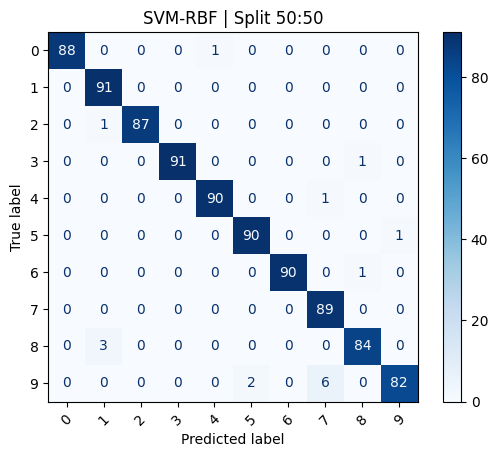

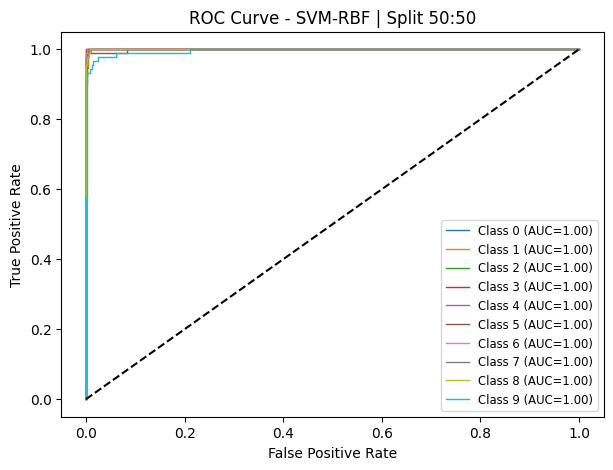

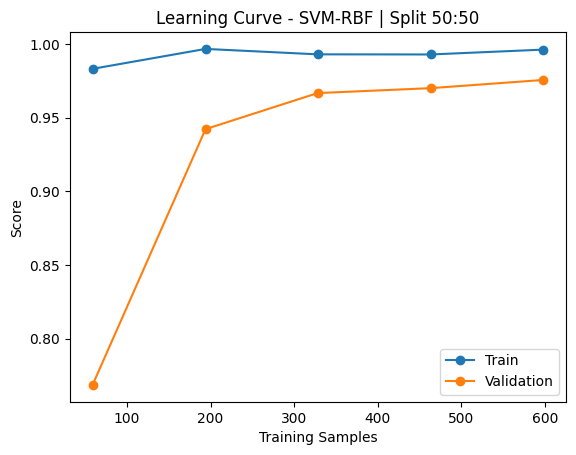


==== SVM-RBF | Train-Test Split 60:40 ====
              precision    recall  f1-score   support

           0     1.0000    0.9859    0.9929        71
           1     0.9481    1.0000    0.9733        73
           2     1.0000    0.9859    0.9929        71
           3     1.0000    1.0000    1.0000        73
           4     0.9863    1.0000    0.9931        72
           5     1.0000    0.9863    0.9931        73
           6     1.0000    1.0000    1.0000        72
           7     0.9474    1.0000    0.9730        72
           8     1.0000    0.9571    0.9781        70
           9     0.9855    0.9444    0.9645        72

    accuracy                         0.9861       719
   macro avg     0.9867    0.9860    0.9861       719
weighted avg     0.9866    0.9861    0.9861       719



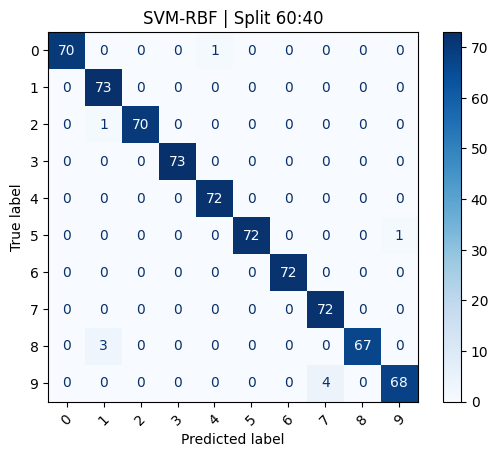

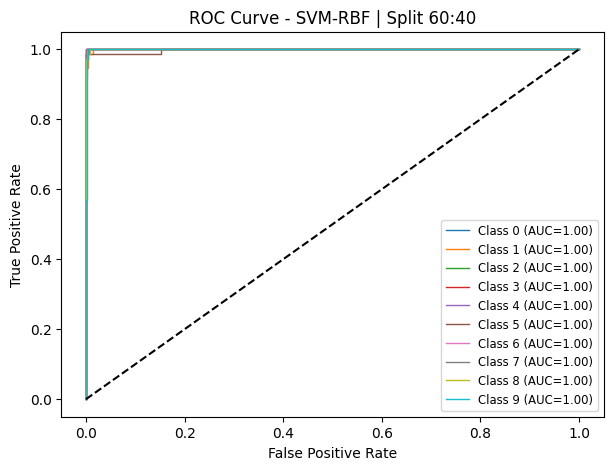

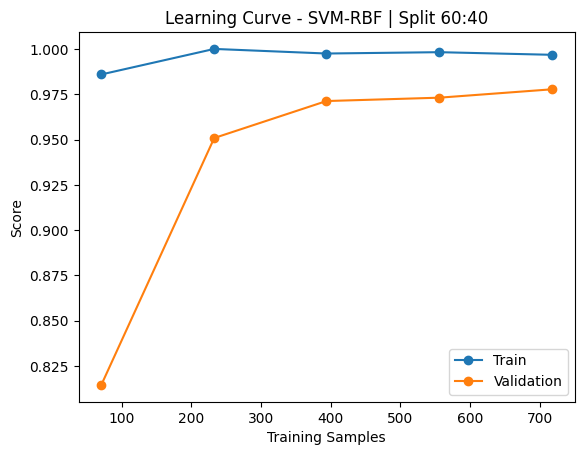


==== SVM-RBF | Train-Test Split 70:30 ====
              precision    recall  f1-score   support

           0     1.0000    0.9815    0.9907        54
           1     0.9649    1.0000    0.9821        55
           2     1.0000    1.0000    1.0000        53
           3     1.0000    1.0000    1.0000        55
           4     0.9815    0.9815    0.9815        54
           5     1.0000    0.9818    0.9908        55
           6     1.0000    1.0000    1.0000        54
           7     0.9818    1.0000    0.9908        54
           8     0.9804    0.9615    0.9709        52
           9     0.9815    0.9815    0.9815        54

    accuracy                         0.9889       540
   macro avg     0.9890    0.9888    0.9888       540
weighted avg     0.9890    0.9889    0.9889       540



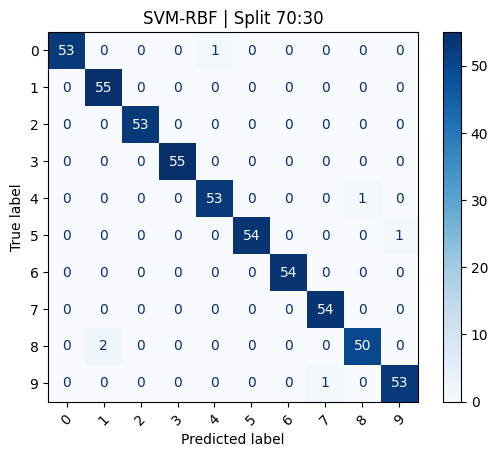

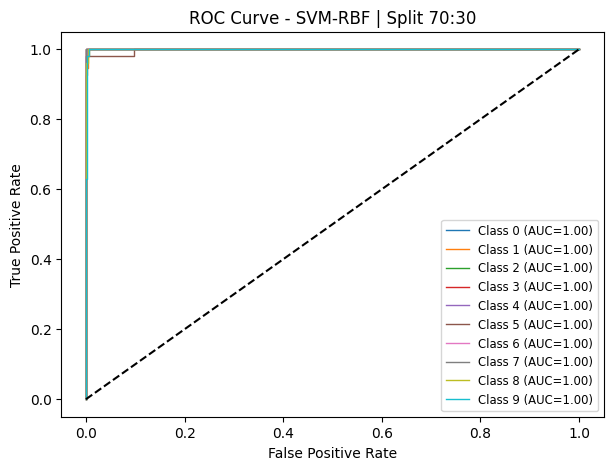

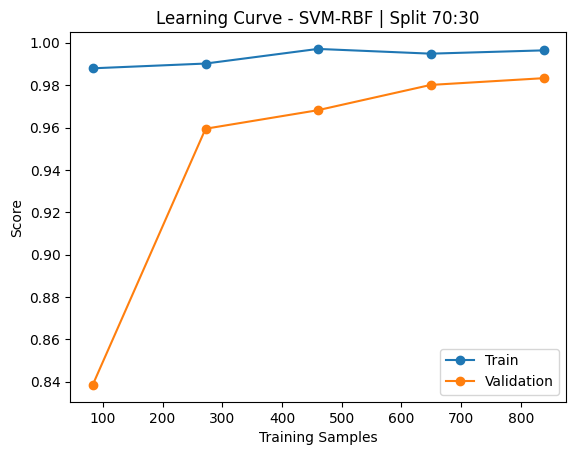


==== SVM-RBF | Train-Test Split 80:20 ====
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        36
           1     0.9474    1.0000    0.9730        36
           2     1.0000    1.0000    1.0000        35
           3     1.0000    1.0000    1.0000        37
           4     1.0000    1.0000    1.0000        36
           5     1.0000    1.0000    1.0000        37
           6     1.0000    1.0000    1.0000        36
           7     0.9730    1.0000    0.9863        36
           8     1.0000    0.9429    0.9706        35
           9     1.0000    0.9722    0.9859        36

    accuracy                         0.9917       360
   macro avg     0.9920    0.9915    0.9916       360
weighted avg     0.9920    0.9917    0.9917       360



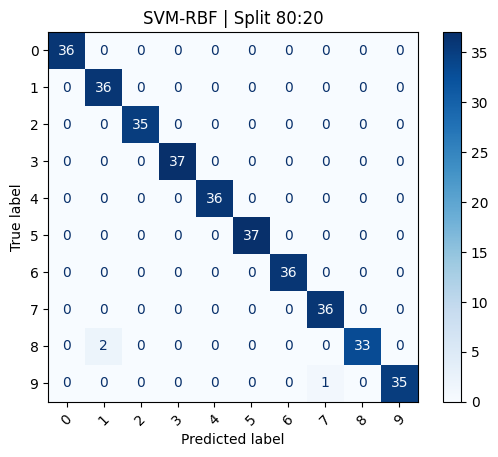

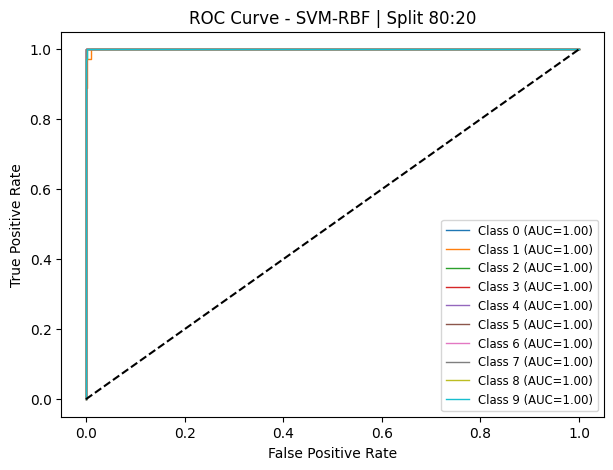

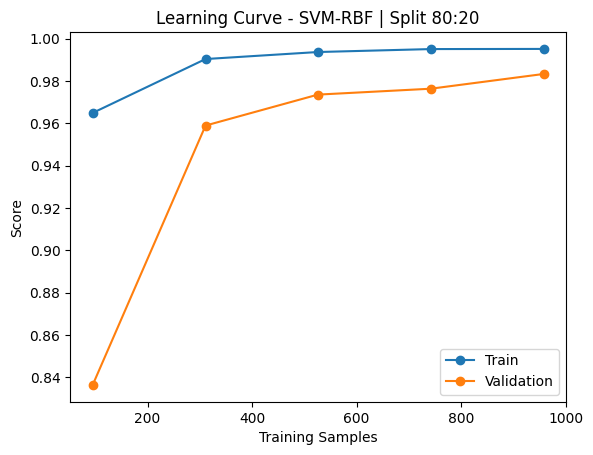

In [65]:
# RBF SVM
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
evaluate_model(svm_rbf, X, y, model_name="SVM-RBF")



==== SVM-Sigmoid | Train-Test Split 50:50 ====
              precision    recall  f1-score   support

           0     0.9773    0.9663    0.9718        89
           1     0.7143    0.8242    0.7653        91
           2     1.0000    0.9091    0.9524        88
           3     1.0000    0.9130    0.9545        92
           4     0.8958    0.9451    0.9198        91
           5     0.9255    0.9560    0.9405        91
           6     0.9468    0.9780    0.9622        91
           7     0.9140    0.9551    0.9341        89
           8     0.8395    0.7816    0.8095        87
           9     0.8929    0.8333    0.8621        90

    accuracy                         0.9066       899
   macro avg     0.9106    0.9062    0.9072       899
weighted avg     0.9106    0.9066    0.9074       899



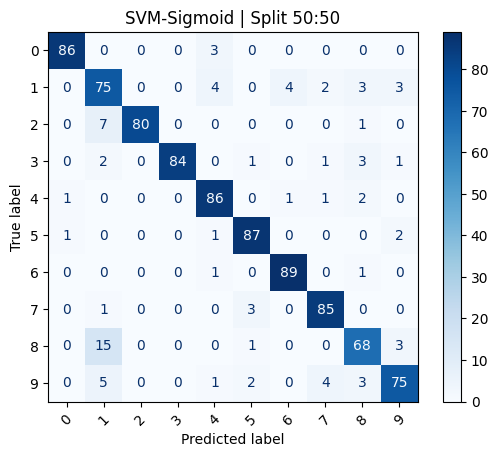

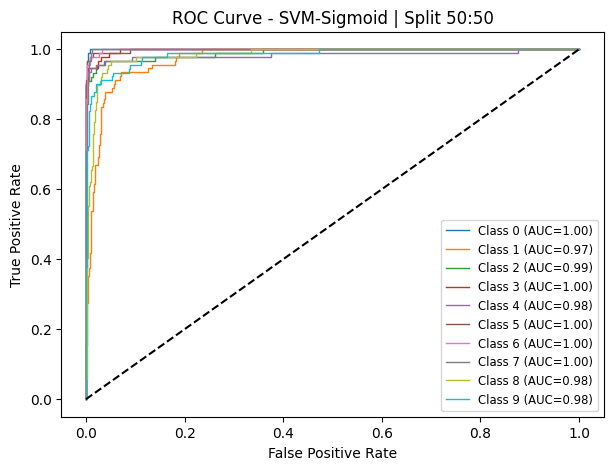

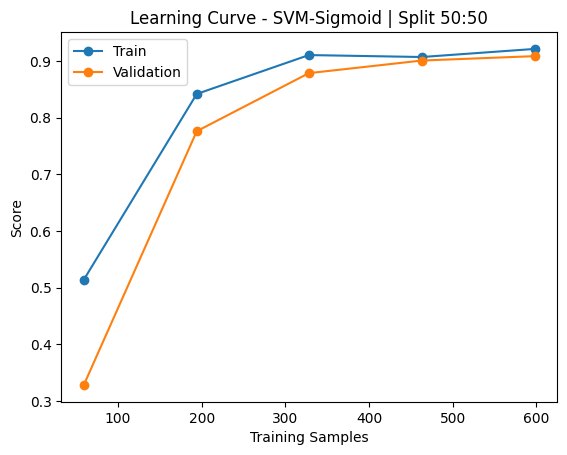


==== SVM-Sigmoid | Train-Test Split 60:40 ====
              precision    recall  f1-score   support

           0     0.9710    0.9437    0.9571        71
           1     0.6941    0.8082    0.7468        73
           2     0.9545    0.8873    0.9197        71
           3     0.9714    0.9315    0.9510        73
           4     0.8750    0.9722    0.9211        72
           5     0.9595    0.9726    0.9660        73
           6     0.9459    0.9722    0.9589        72
           7     0.8947    0.9444    0.9189        72
           8     0.9091    0.7143    0.8000        70
           9     0.9000    0.8750    0.8873        72

    accuracy                         0.9026       719
   macro avg     0.9075    0.9021    0.9027       719
weighted avg     0.9072    0.9026    0.9028       719



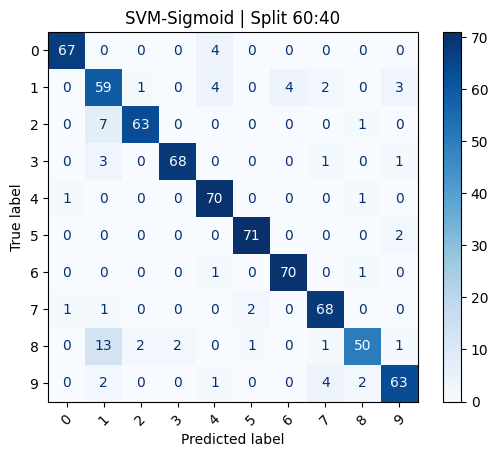

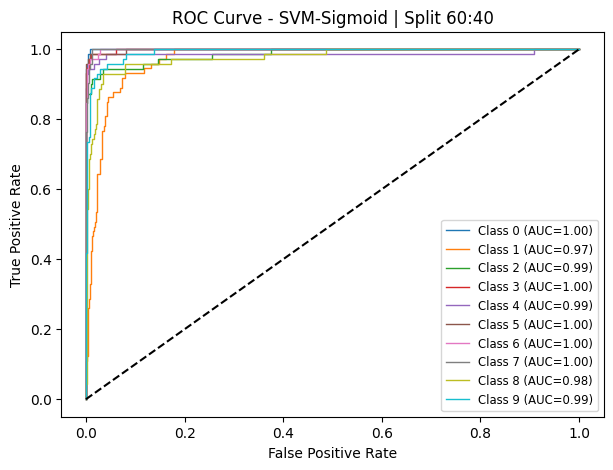

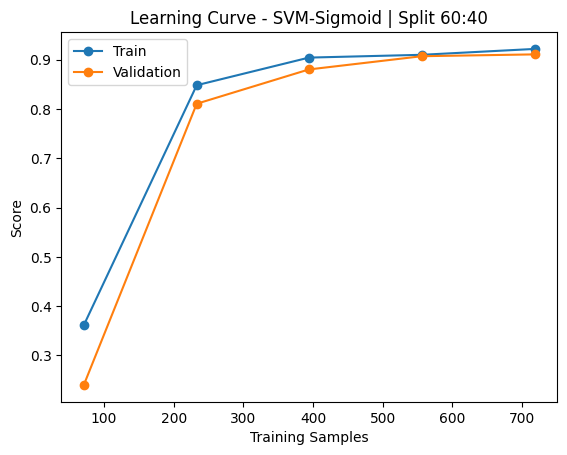


==== SVM-Sigmoid | Train-Test Split 70:30 ====
              precision    recall  f1-score   support

           0     0.9804    0.9259    0.9524        54
           1     0.6719    0.7818    0.7227        55
           2     0.9600    0.9057    0.9320        53
           3     0.9444    0.9273    0.9358        55
           4     0.8361    0.9444    0.8870        54
           5     0.9474    0.9818    0.9643        55
           6     0.9444    0.9444    0.9444        54
           7     0.8852    1.0000    0.9391        54
           8     0.9189    0.6538    0.7640        52
           9     0.9216    0.8704    0.8952        54

    accuracy                         0.8944       540
   macro avg     0.9010    0.8936    0.8937       540
weighted avg     0.9006    0.8944    0.8940       540



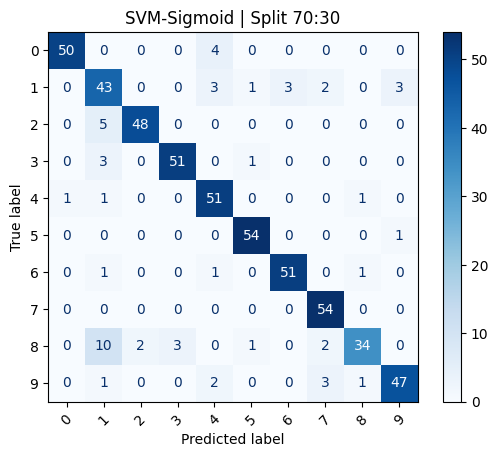

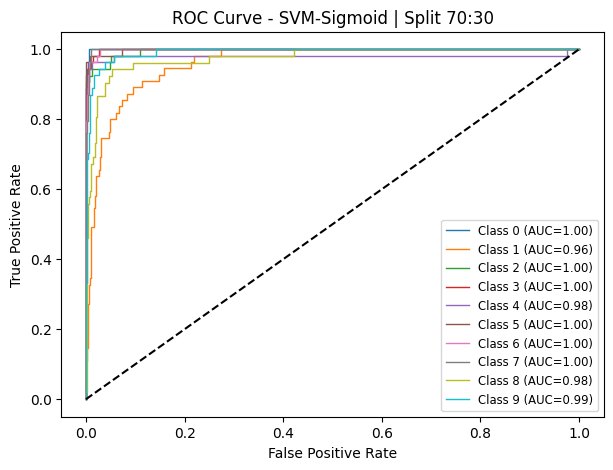

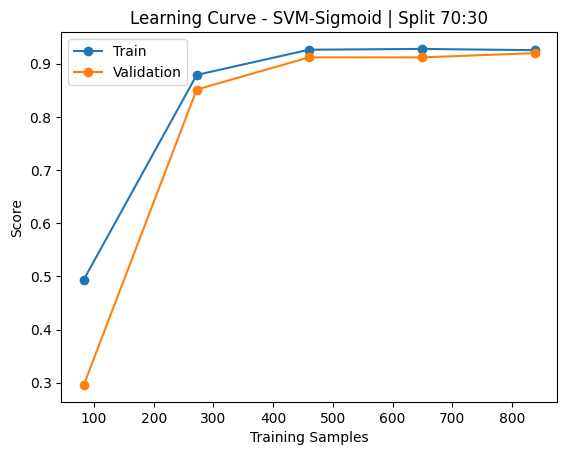


==== SVM-Sigmoid | Train-Test Split 80:20 ====
              precision    recall  f1-score   support

           0     1.0000    0.9167    0.9565        36
           1     0.6429    0.7500    0.6923        36
           2     0.9714    0.9714    0.9714        35
           3     0.9231    0.9730    0.9474        37
           4     0.7727    0.9444    0.8500        36
           5     1.0000    1.0000    1.0000        37
           6     0.9167    0.9167    0.9167        36
           7     0.9429    0.9167    0.9296        36
           8     0.8462    0.6286    0.7213        35
           9     0.9091    0.8333    0.8696        36

    accuracy                         0.8861       360
   macro avg     0.8925    0.8851    0.8855       360
weighted avg     0.8928    0.8861    0.8862       360



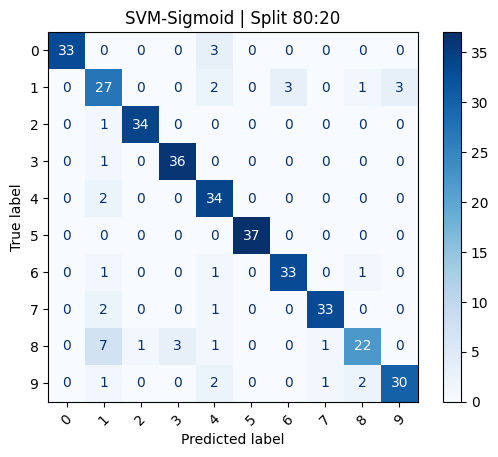

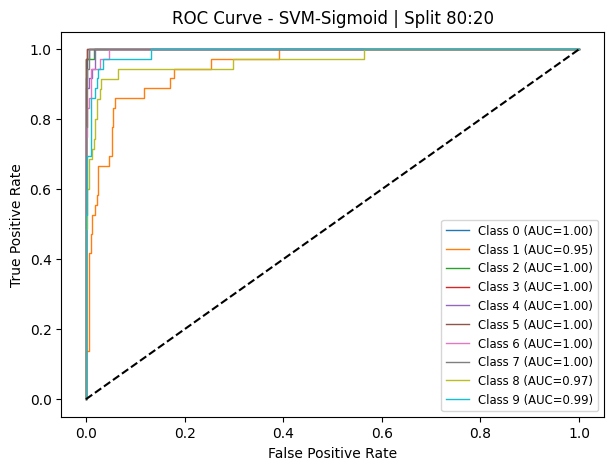

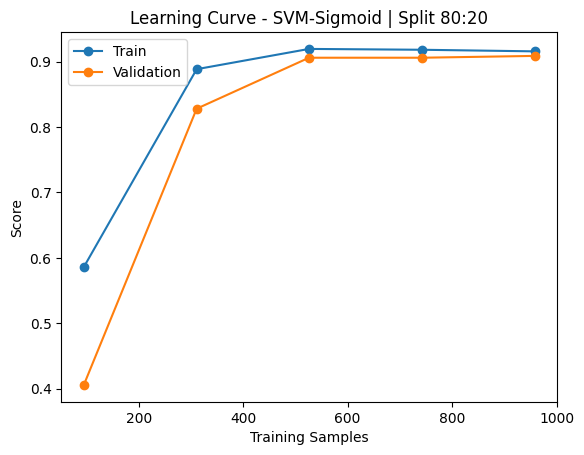

In [66]:
# Sigmoid SVM
svm_sigmoid = SVC(kernel='sigmoid', probability=True, random_state=42)
evaluate_model(svm_sigmoid, X, y, model_name="SVM-Sigmoid")


==== MLP | Train-Test Split 50:50 ====
              precision    recall  f1-score   support

           0     0.9888    0.9888    0.9888        89
           1     0.9368    0.9780    0.9570        91
           2     0.9770    0.9659    0.9714        88
           3     0.9780    0.9674    0.9727        92
           4     0.9886    0.9560    0.9721        91
           5     0.9468    0.9780    0.9622        91
           6     0.9780    0.9780    0.9780        91
           7     0.9255    0.9775    0.9508        89
           8     0.9091    0.9195    0.9143        87
           9     0.9756    0.8889    0.9302        90

    accuracy                         0.9600       899
   macro avg     0.9604    0.9598    0.9597       899
weighted avg     0.9606    0.9600    0.9599       899



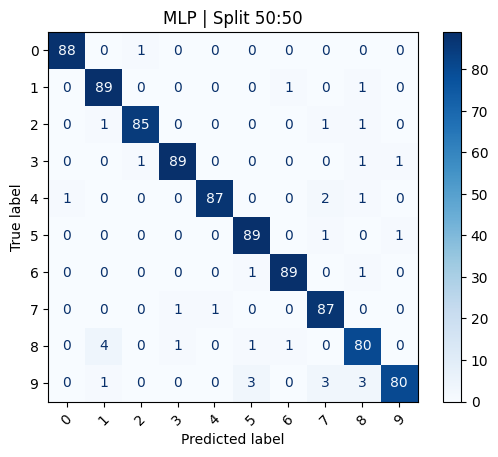

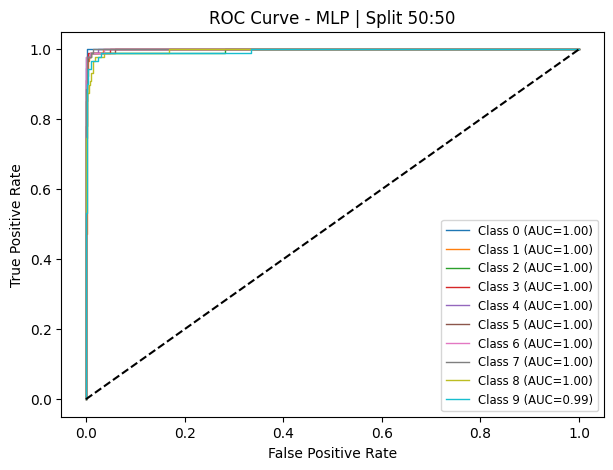

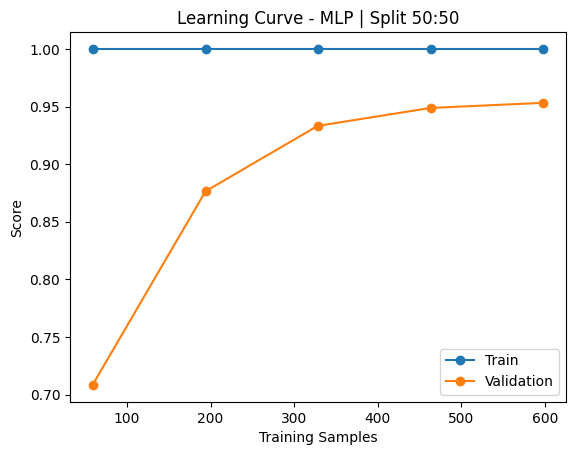

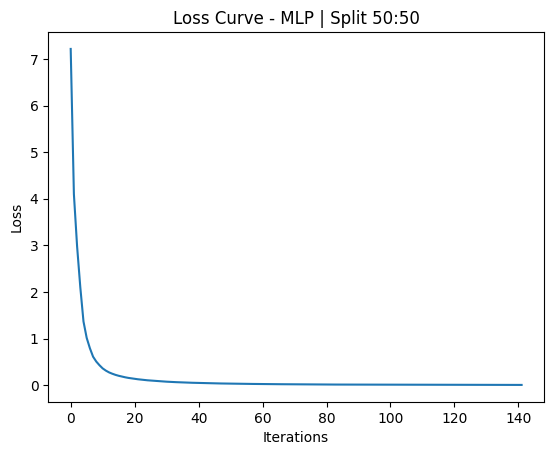


==== MLP | Train-Test Split 60:40 ====
              precision    recall  f1-score   support

           0     1.0000    0.9859    0.9929        71
           1     0.9012    1.0000    0.9481        73
           2     0.9848    0.9155    0.9489        71
           3     1.0000    1.0000    1.0000        73
           4     0.9859    0.9722    0.9790        72
           5     0.9730    0.9863    0.9796        73
           6     0.9859    0.9722    0.9790        72
           7     0.9595    0.9861    0.9726        72
           8     0.9143    0.9143    0.9143        70
           9     0.9855    0.9444    0.9645        72

    accuracy                         0.9680       719
   macro avg     0.9690    0.9677    0.9679       719
weighted avg     0.9691    0.9680    0.9681       719



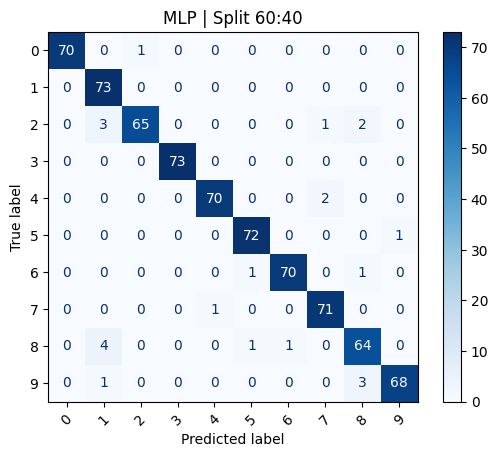

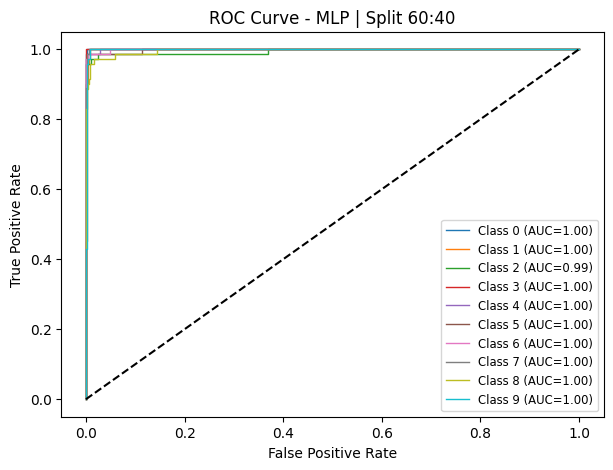

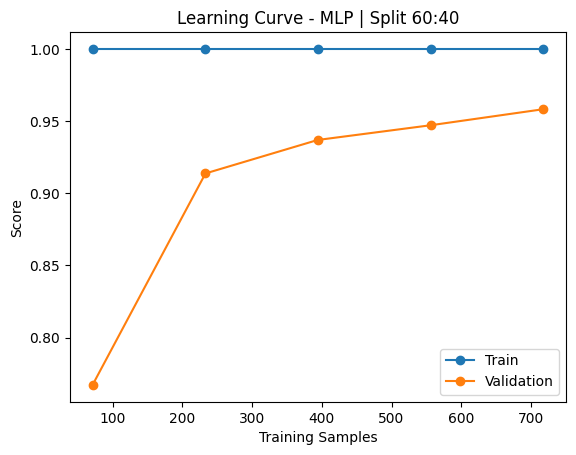

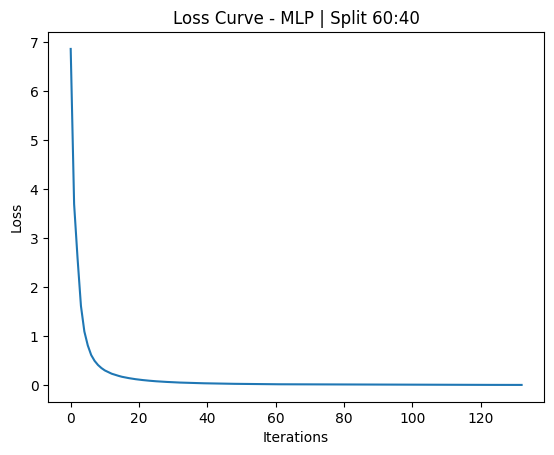


==== MLP | Train-Test Split 70:30 ====
              precision    recall  f1-score   support

           0     1.0000    0.9444    0.9714        54
           1     0.9483    1.0000    0.9735        55
           2     0.9636    1.0000    0.9815        53
           3     1.0000    1.0000    1.0000        55
           4     0.9455    0.9630    0.9541        54
           5     0.9818    0.9818    0.9818        55
           6     1.0000    0.9815    0.9907        54
           7     0.9636    0.9815    0.9725        54
           8     0.9792    0.9038    0.9400        52
           9     0.9818    1.0000    0.9908        54

    accuracy                         0.9759       540
   macro avg     0.9764    0.9756    0.9756       540
weighted avg     0.9764    0.9759    0.9758       540



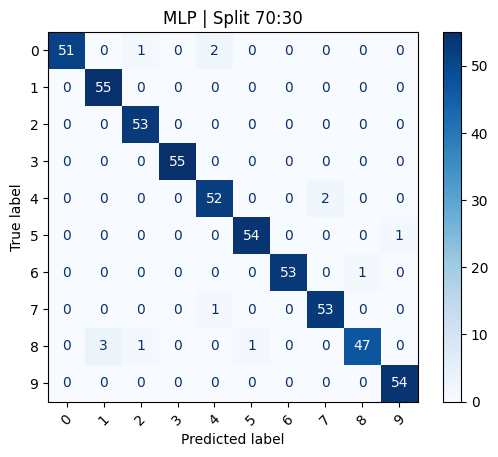

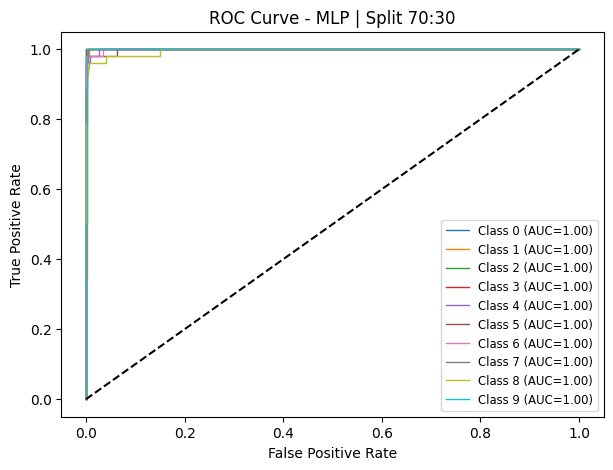

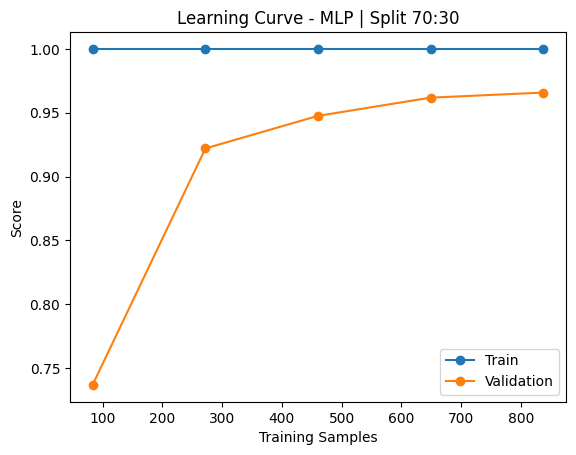

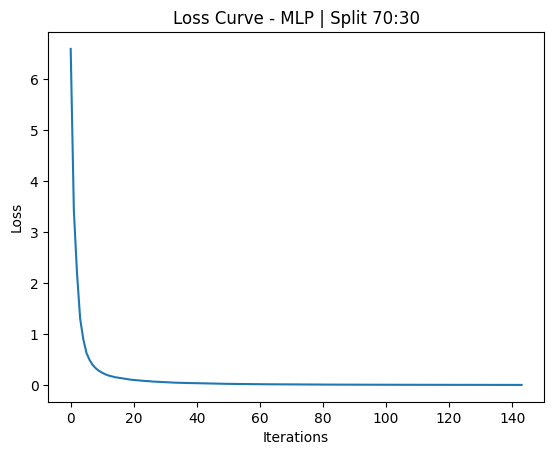


==== MLP | Train-Test Split 80:20 ====
              precision    recall  f1-score   support

           0     1.0000    0.9444    0.9714        36
           1     0.9000    1.0000    0.9474        36
           2     0.9722    1.0000    0.9859        35
           3     1.0000    0.9730    0.9863        37
           4     0.9474    1.0000    0.9730        36
           5     1.0000    1.0000    1.0000        37
           6     1.0000    0.9722    0.9859        36
           7     0.9722    0.9722    0.9722        36
           8     0.9688    0.8857    0.9254        35
           9     0.9722    0.9722    0.9722        36

    accuracy                         0.9722       360
   macro avg     0.9733    0.9720    0.9720       360
weighted avg     0.9734    0.9722    0.9722       360



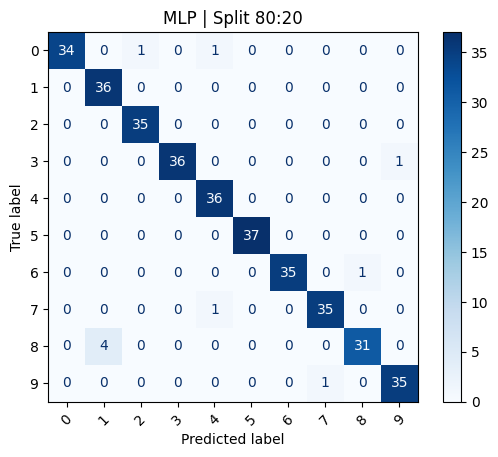

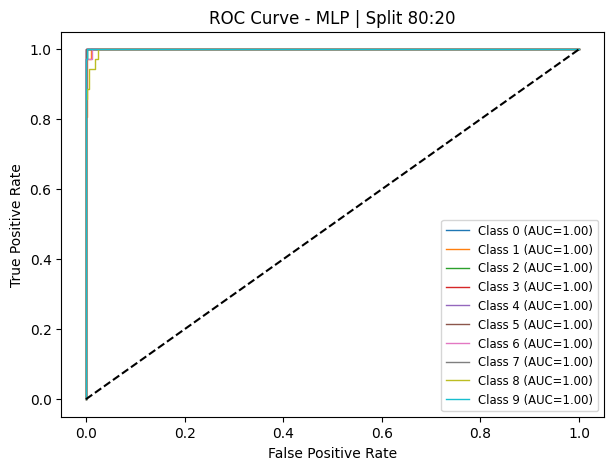

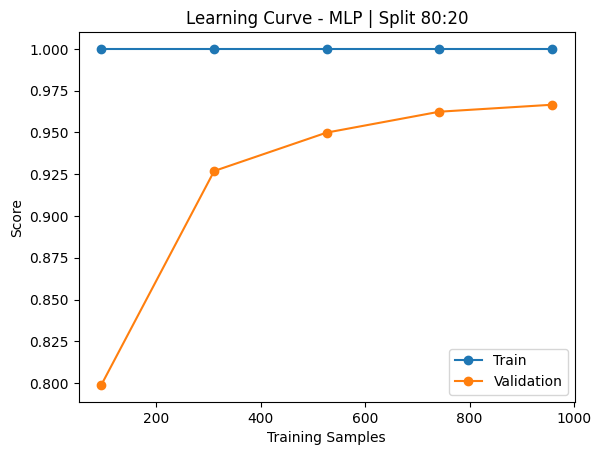

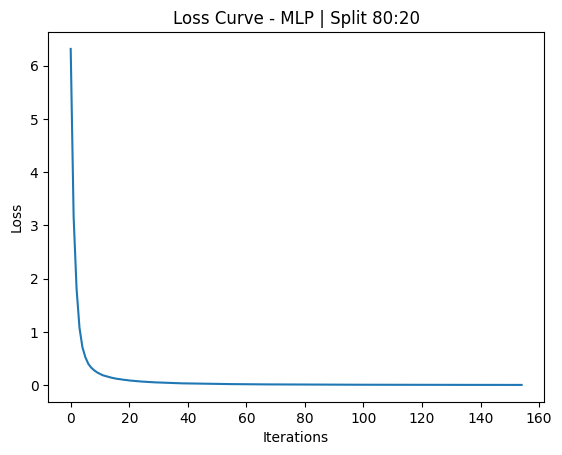

In [67]:
from sklearn.neural_network import MLPClassifier

# Single MLP call → change parameters manually for assignment
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=200,
    learning_rate_init=0.001,
    momentum=0.9,
    random_state=42
)

evaluate_model(mlp, X, y, model_name="MLP")



==== Random Forest | Train-Test Split 50:50 ====
              precision    recall  f1-score   support

           0     0.9775    0.9775    0.9775        89
           1     0.9278    0.9890    0.9574        91
           2     1.0000    0.9659    0.9827        88
           3     0.9670    0.9565    0.9617        92
           4     0.9670    0.9670    0.9670        91
           5     0.9565    0.9670    0.9617        91
           6     1.0000    0.9780    0.9889        91
           7     0.8812    1.0000    0.9368        89
           8     0.9524    0.9195    0.9357        87
           9     0.9625    0.8556    0.9059        90

    accuracy                         0.9577       899
   macro avg     0.9592    0.9576    0.9575       899
weighted avg     0.9592    0.9577    0.9576       899



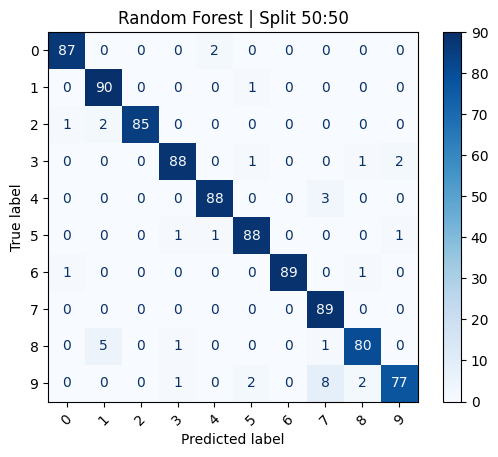

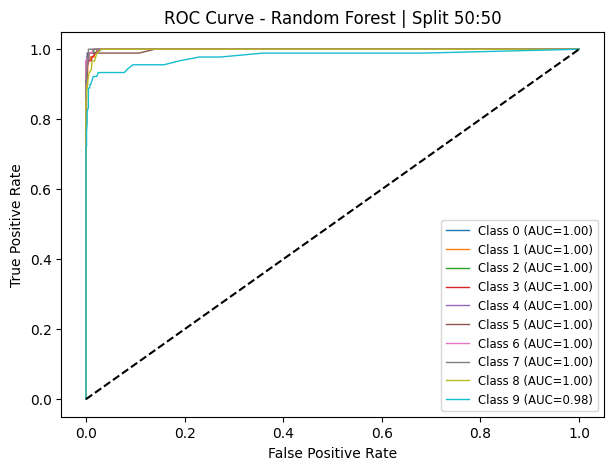

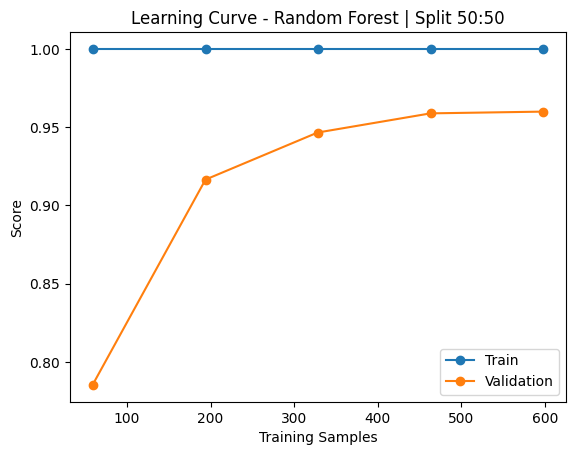


==== Random Forest | Train-Test Split 60:40 ====
              precision    recall  f1-score   support

           0     0.9857    0.9718    0.9787        71
           1     0.9221    0.9726    0.9467        73
           2     1.0000    0.9577    0.9784        71
           3     0.9863    0.9863    0.9863        73
           4     0.9726    0.9861    0.9793        72
           5     0.9863    0.9863    0.9863        73
           6     0.9861    0.9861    0.9861        72
           7     0.9114    1.0000    0.9536        72
           8     0.9412    0.9143    0.9275        70
           9     0.9848    0.9028    0.9420        72

    accuracy                         0.9666       719
   macro avg     0.9677    0.9664    0.9665       719
weighted avg     0.9676    0.9666    0.9666       719



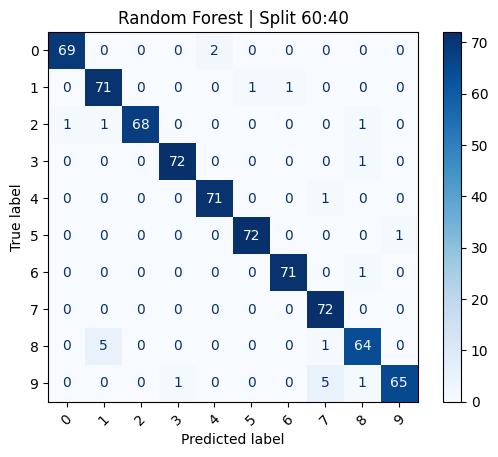

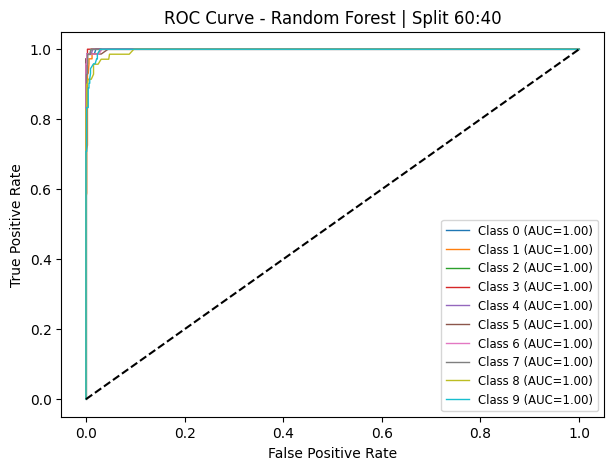

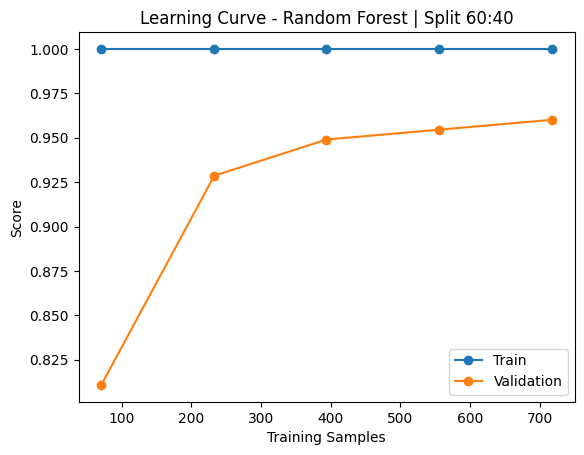


==== Random Forest | Train-Test Split 70:30 ====
              precision    recall  f1-score   support

           0     1.0000    0.9630    0.9811        54
           1     0.9322    1.0000    0.9649        55
           2     1.0000    1.0000    1.0000        53
           3     0.9643    0.9818    0.9730        55
           4     0.9636    0.9815    0.9725        54
           5     1.0000    0.9818    0.9908        55
           6     1.0000    0.9815    0.9907        54
           7     0.9000    1.0000    0.9474        54
           8     0.9583    0.8846    0.9200        52
           9     0.9600    0.8889    0.9231        54

    accuracy                         0.9667       540
   macro avg     0.9678    0.9663    0.9663       540
weighted avg     0.9678    0.9667    0.9665       540



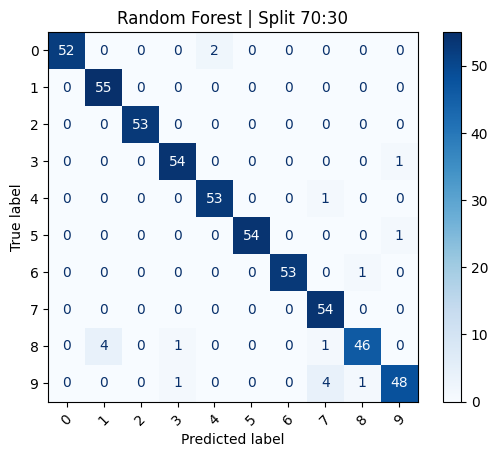

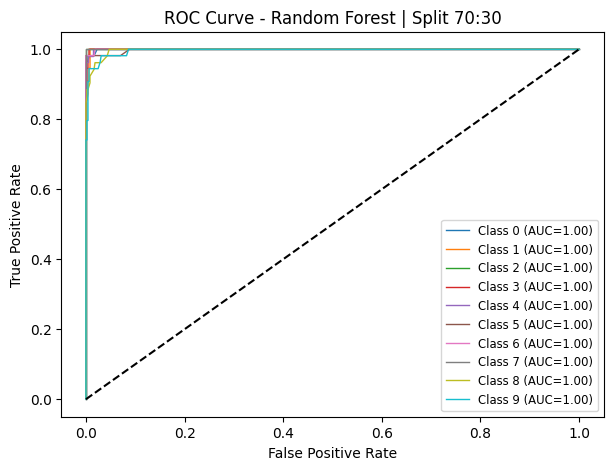

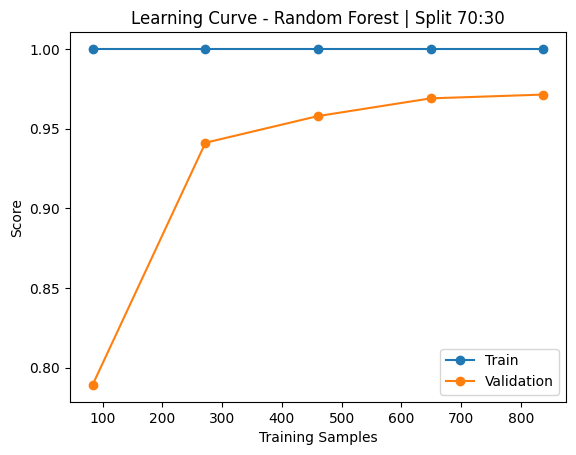


==== Random Forest | Train-Test Split 80:20 ====
              precision    recall  f1-score   support

           0     0.9722    0.9722    0.9722        36
           1     0.8974    0.9722    0.9333        36
           2     1.0000    0.9714    0.9855        35
           3     0.9730    0.9730    0.9730        37
           4     0.9722    0.9722    0.9722        36
           5     0.9737    1.0000    0.9867        37
           6     1.0000    0.9722    0.9859        36
           7     0.9231    1.0000    0.9600        36
           8     0.9375    0.8571    0.8955        35
           9     0.9706    0.9167    0.9429        36

    accuracy                         0.9611       360
   macro avg     0.9620    0.9607    0.9607       360
weighted avg     0.9620    0.9611    0.9609       360



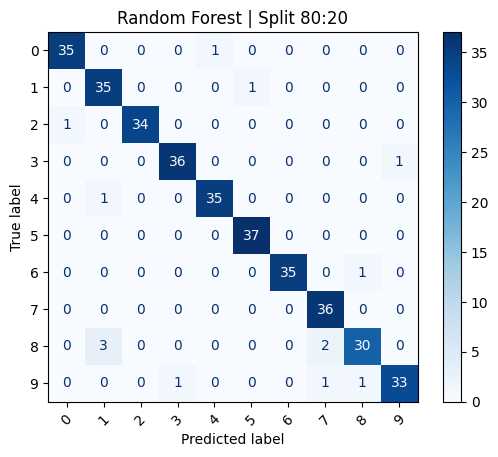

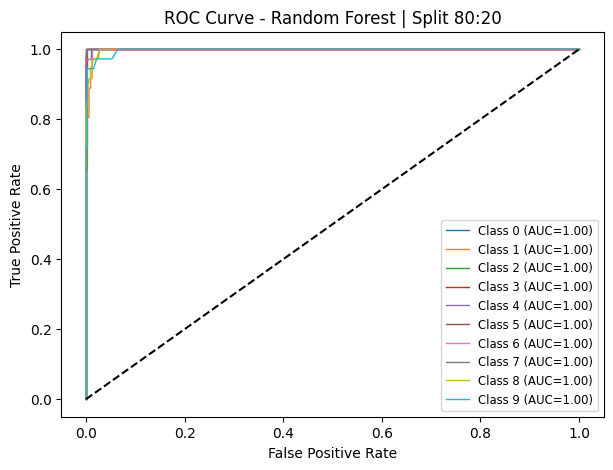

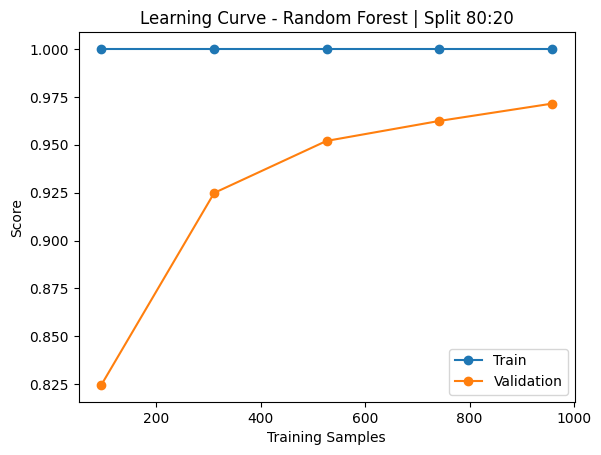

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest → adjust parameters manually for assignment
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

evaluate_model(rf, X, y, model_name="Random Forest")


In [69]:
from sklearn.decomposition import PCA

# PCA Transformation Block
pca = PCA(n_components=30, random_state=42)
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Reduced shape after PCA:", X_pca.shape)


Original shape: (1797, 64)
Reduced shape after PCA: (1797, 30)



==== SVM-Linear (PCA) | Train-Test Split 50:50 ====
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        89
           1     0.9175    0.9780    0.9468        91
           2     0.9885    0.9773    0.9829        88
           3     0.9785    0.9891    0.9838        92
           4     1.0000    1.0000    1.0000        91
           5     0.9667    0.9560    0.9613        91
           6     0.9890    0.9890    0.9890        91
           7     0.9565    0.9888    0.9724        89
           8     0.9398    0.8966    0.9176        87
           9     0.9651    0.9222    0.9432        90

    accuracy                         0.9700       899
   macro avg     0.9702    0.9697    0.9697       899
weighted avg     0.9702    0.9700    0.9699       899



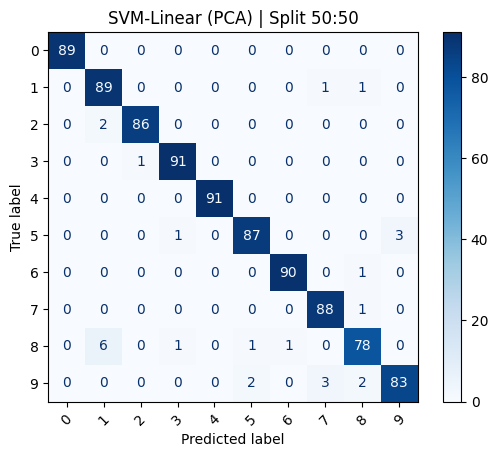

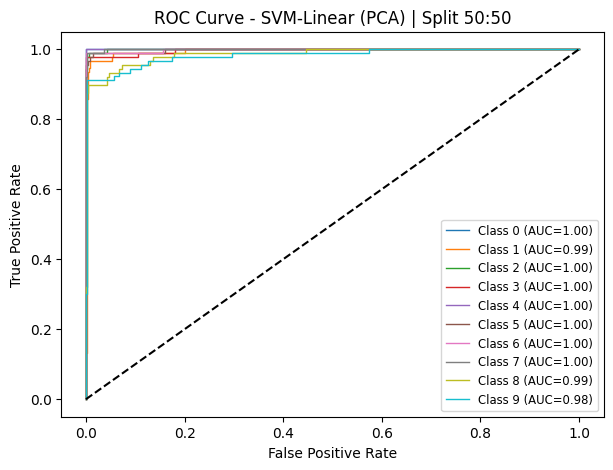

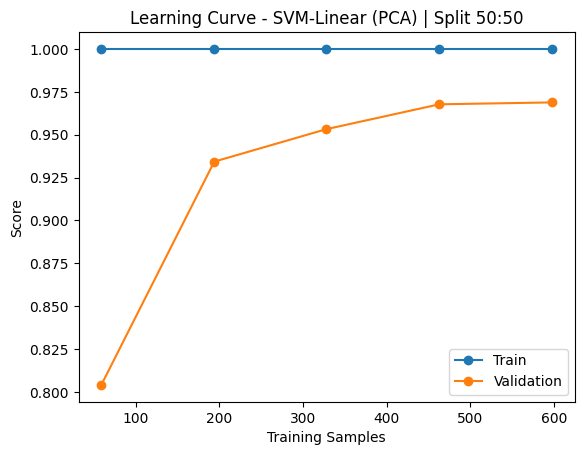


==== SVM-Linear (PCA) | Train-Test Split 60:40 ====
              precision    recall  f1-score   support

           0     1.0000    0.9859    0.9929        71
           1     0.8780    0.9863    0.9290        73
           2     1.0000    0.9718    0.9857        71
           3     1.0000    0.9863    0.9931        73
           4     0.9863    1.0000    0.9931        72
           5     1.0000    0.9863    0.9931        73
           6     0.9861    0.9861    0.9861        72
           7     0.9231    1.0000    0.9600        72
           8     0.9839    0.8714    0.9242        70
           9     0.9565    0.9167    0.9362        72

    accuracy                         0.9694       719
   macro avg     0.9714    0.9691    0.9693       719
weighted avg     0.9712    0.9694    0.9694       719



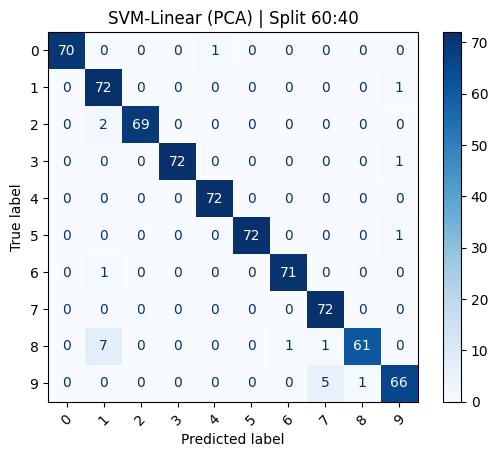

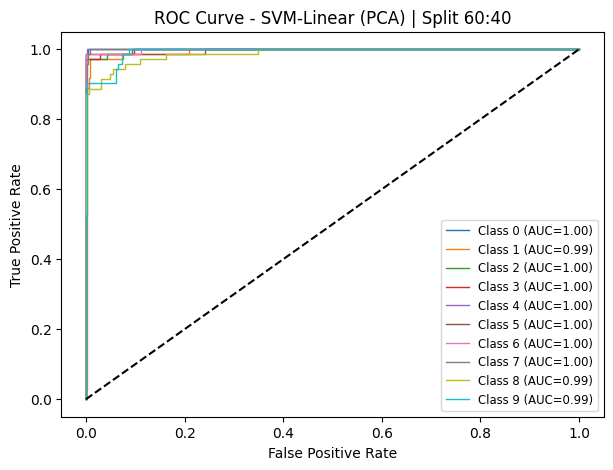

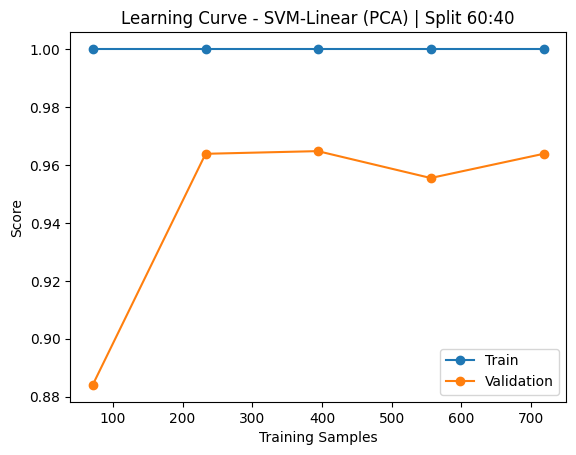


==== SVM-Linear (PCA) | Train-Test Split 70:30 ====
              precision    recall  f1-score   support

           0     1.0000    0.9815    0.9907        54
           1     0.9310    0.9818    0.9558        55
           2     1.0000    1.0000    1.0000        53
           3     0.9818    0.9818    0.9818        55
           4     0.9818    1.0000    0.9908        54
           5     1.0000    0.9818    0.9908        55
           6     1.0000    0.9815    0.9907        54
           7     0.9474    1.0000    0.9730        54
           8     0.9388    0.8846    0.9109        52
           9     0.9434    0.9259    0.9346        54

    accuracy                         0.9722       540
   macro avg     0.9724    0.9719    0.9719       540
weighted avg     0.9725    0.9722    0.9721       540



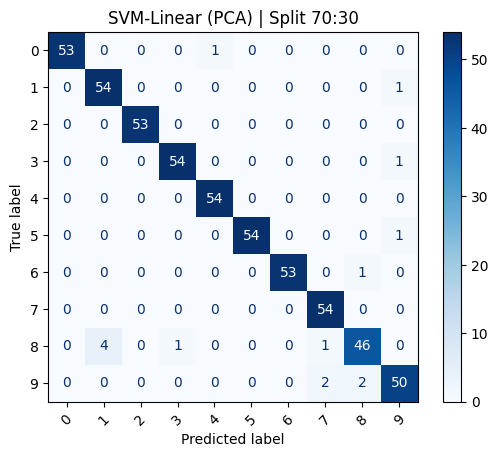

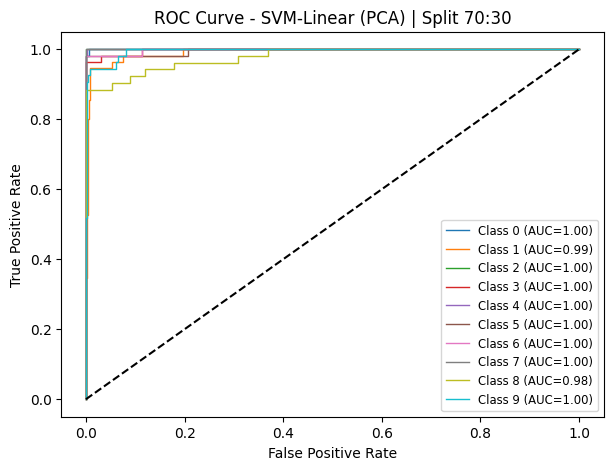

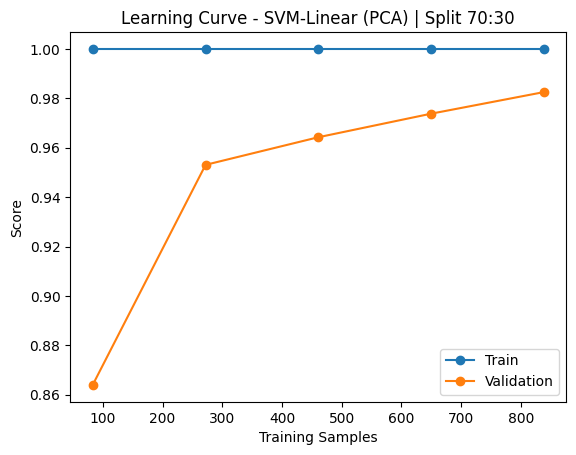


==== SVM-Linear (PCA) | Train-Test Split 80:20 ====
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        36
           1     0.9211    0.9722    0.9459        36
           2     1.0000    1.0000    1.0000        35
           3     1.0000    1.0000    1.0000        37
           4     1.0000    1.0000    1.0000        36
           5     1.0000    1.0000    1.0000        37
           6     0.9722    0.9722    0.9722        36
           7     0.9231    1.0000    0.9600        36
           8     0.9394    0.8857    0.9118        35
           9     1.0000    0.9167    0.9565        36

    accuracy                         0.9750       360
   macro avg     0.9756    0.9747    0.9746       360
weighted avg     0.9757    0.9750    0.9749       360



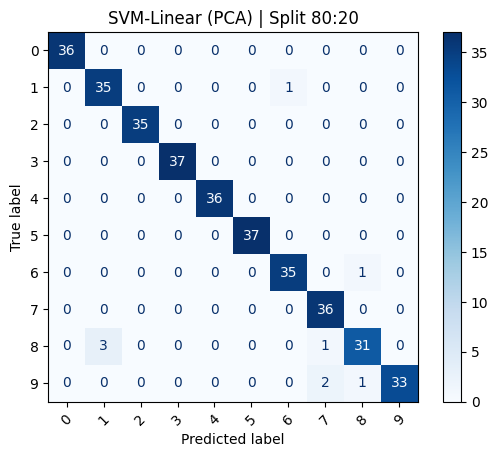

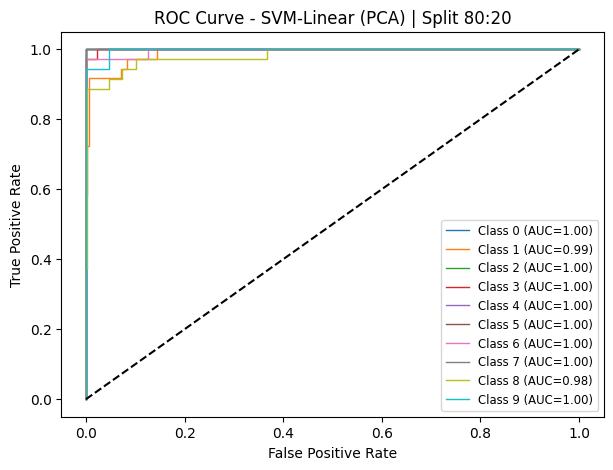

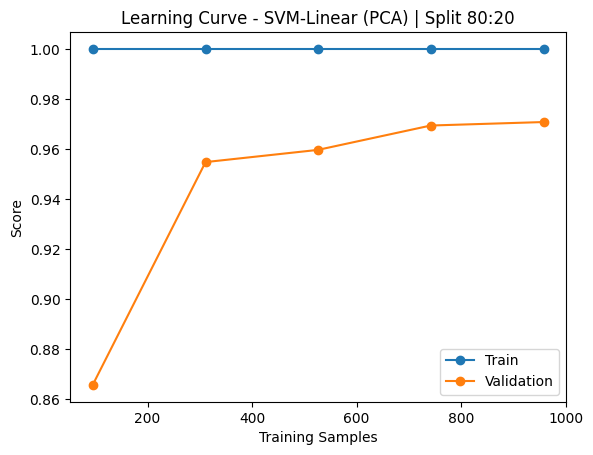

In [70]:
# SVM - Linear
model_linear_pca = SVC(kernel='linear', random_state=42)
evaluate_model(model_linear_pca, X_pca, y, model_name="SVM-Linear (PCA)")



==== SVM-Poly (PCA) | Train-Test Split 50:50 ====
              precision    recall  f1-score   support

           0     1.0000    0.9888    0.9944        89
           1     0.9674    0.9780    0.9727        91
           2     1.0000    0.9886    0.9943        88
           3     1.0000    0.9783    0.9890        92
           4     1.0000    1.0000    1.0000        91
           5     0.9780    0.9780    0.9780        91
           6     1.0000    0.9890    0.9945        91
           7     0.9570    1.0000    0.9780        89
           8     0.8866    0.9885    0.9348        87
           9     0.9875    0.8778    0.9294        90

    accuracy                         0.9766       899
   macro avg     0.9777    0.9767    0.9765       899
weighted avg     0.9780    0.9766    0.9767       899



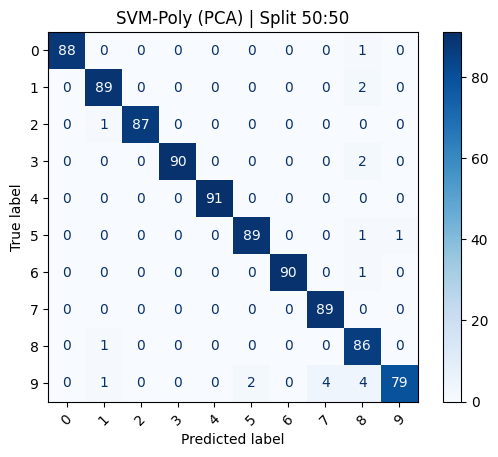

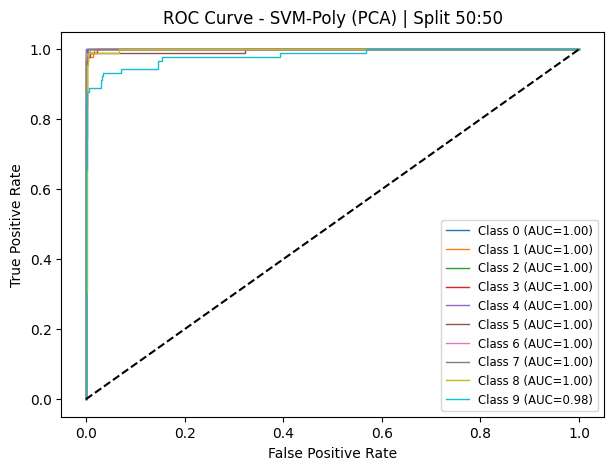

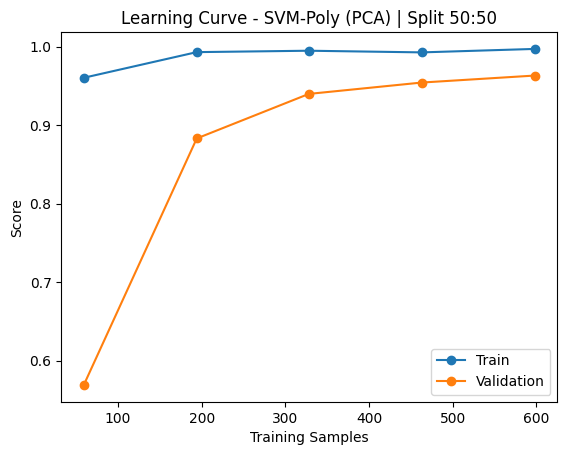


==== SVM-Poly (PCA) | Train-Test Split 60:40 ====
              precision    recall  f1-score   support

           0     1.0000    0.9859    0.9929        71
           1     0.9863    0.9863    0.9863        73
           2     1.0000    1.0000    1.0000        71
           3     1.0000    0.9863    0.9931        73
           4     1.0000    1.0000    1.0000        72
           5     1.0000    0.9863    0.9931        73
           6     1.0000    0.9861    0.9930        72
           7     0.9730    1.0000    0.9863        72
           8     0.9324    0.9857    0.9583        70
           9     0.9857    0.9583    0.9718        72

    accuracy                         0.9875       719
   macro avg     0.9877    0.9875    0.9875       719
weighted avg     0.9879    0.9875    0.9876       719



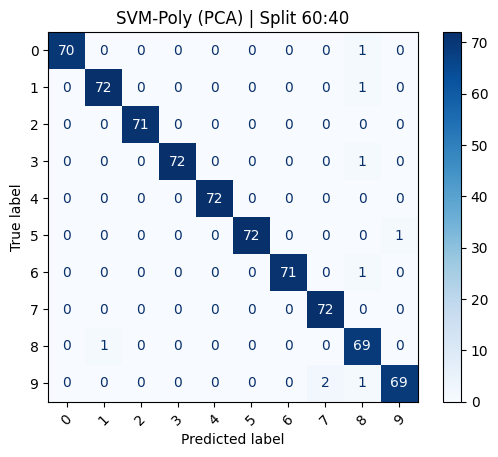

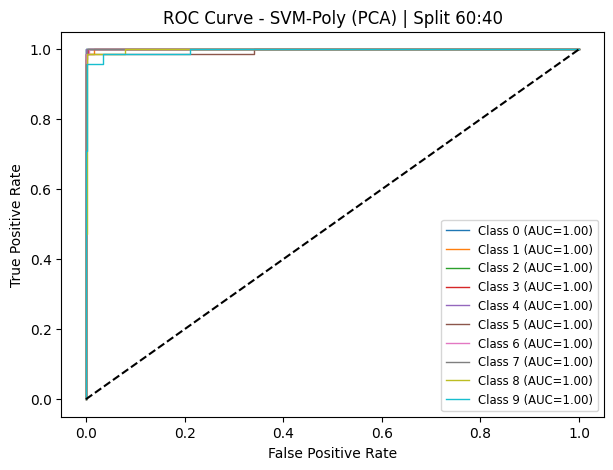

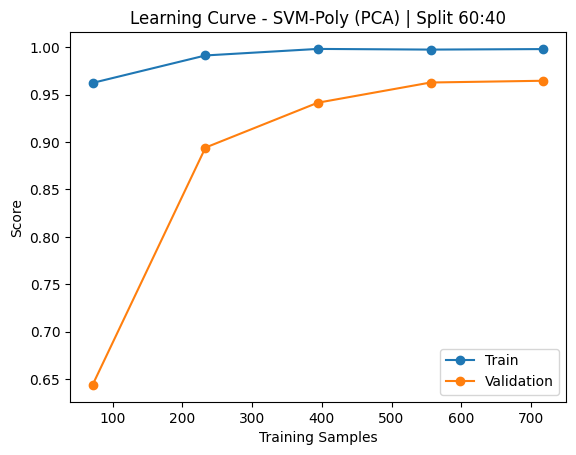


==== SVM-Poly (PCA) | Train-Test Split 70:30 ====
              precision    recall  f1-score   support

           0     1.0000    0.9815    0.9907        54
           1     0.9818    0.9818    0.9818        55
           2     1.0000    1.0000    1.0000        53
           3     1.0000    1.0000    1.0000        55
           4     1.0000    1.0000    1.0000        54
           5     1.0000    0.9818    0.9908        55
           6     1.0000    0.9815    0.9907        54
           7     0.9818    1.0000    0.9908        54
           8     0.9273    0.9808    0.9533        52
           9     0.9811    0.9630    0.9720        54

    accuracy                         0.9870       540
   macro avg     0.9872    0.9870    0.9870       540
weighted avg     0.9874    0.9870    0.9871       540



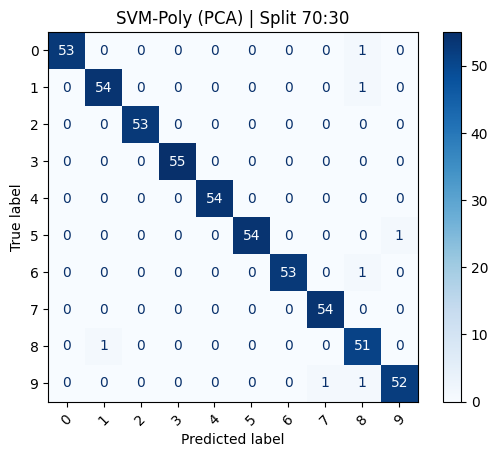

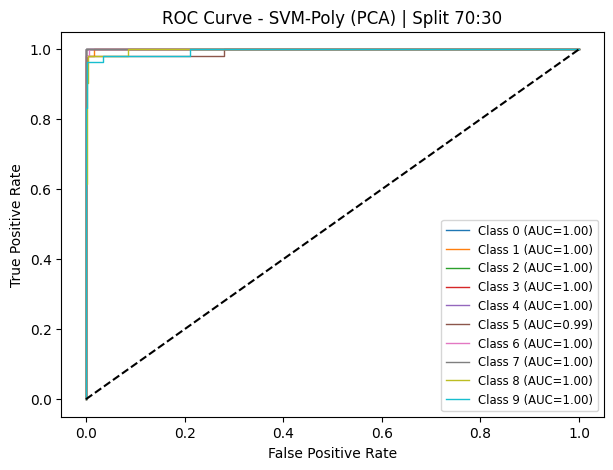

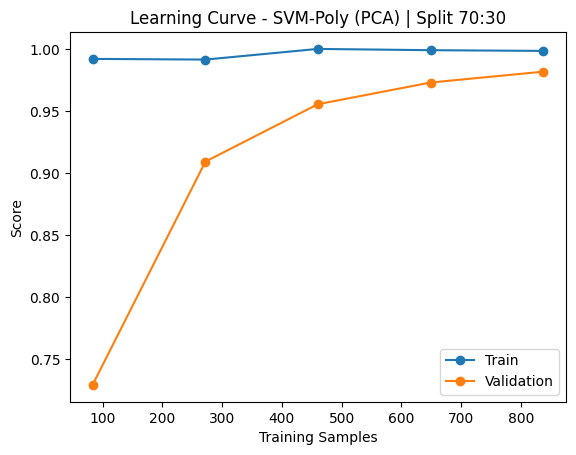


==== SVM-Poly (PCA) | Train-Test Split 80:20 ====
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        36
           1     1.0000    0.9722    0.9859        36
           2     1.0000    1.0000    1.0000        35
           3     1.0000    1.0000    1.0000        37
           4     1.0000    1.0000    1.0000        36
           5     1.0000    1.0000    1.0000        37
           6     1.0000    0.9722    0.9859        36
           7     0.9730    1.0000    0.9863        36
           8     0.9211    1.0000    0.9589        35
           9     1.0000    0.9444    0.9714        36

    accuracy                         0.9889       360
   macro avg     0.9894    0.9889    0.9888       360
weighted avg     0.9896    0.9889    0.9890       360



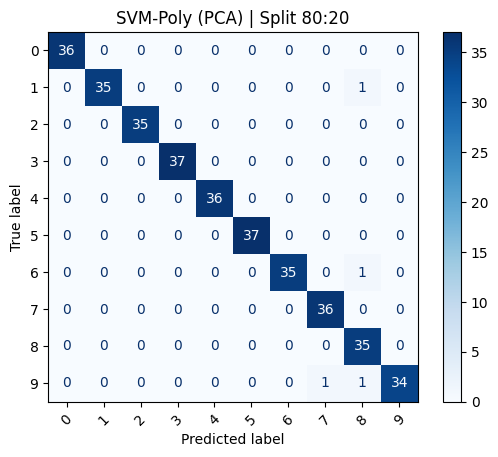

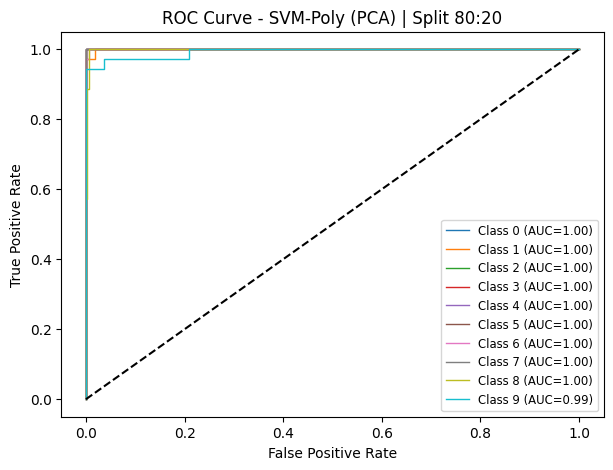

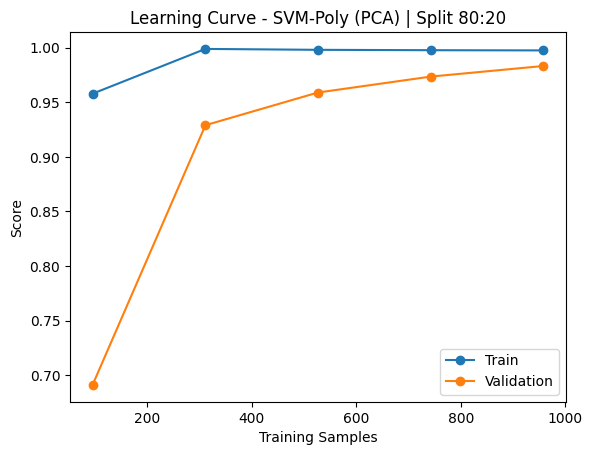

In [71]:
# SVM - Polynomial
model_poly_pca = SVC(kernel='poly', random_state=42)
evaluate_model(model_poly_pca, X_pca, y, model_name="SVM-Poly (PCA)")



==== SVM-RBF (PCA) | Train-Test Split 50:50 ====
              precision    recall  f1-score   support

           0     1.0000    0.9888    0.9944        89
           1     0.9681    1.0000    0.9838        91
           2     1.0000    0.9773    0.9885        88
           3     1.0000    1.0000    1.0000        92
           4     0.9891    1.0000    0.9945        91
           5     0.9783    0.9890    0.9836        91
           6     1.0000    0.9890    0.9945        91
           7     0.9368    1.0000    0.9674        89
           8     0.9884    0.9770    0.9827        87
           9     0.9881    0.9222    0.9540        90

    accuracy                         0.9844       899
   macro avg     0.9849    0.9843    0.9843       899
weighted avg     0.9849    0.9844    0.9844       899



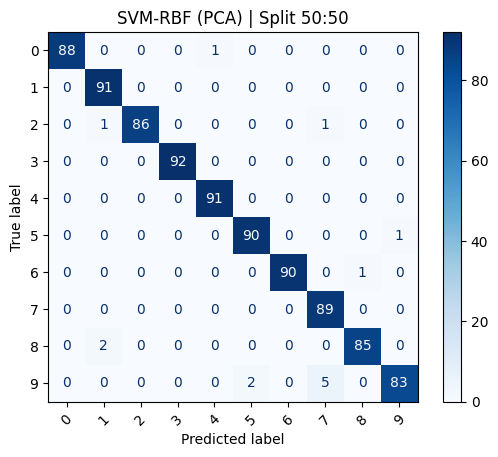

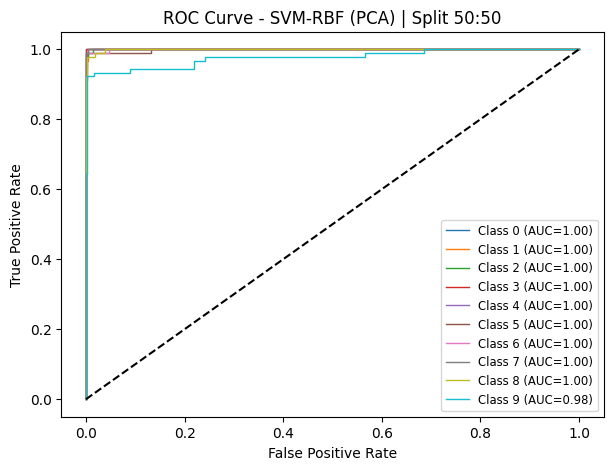

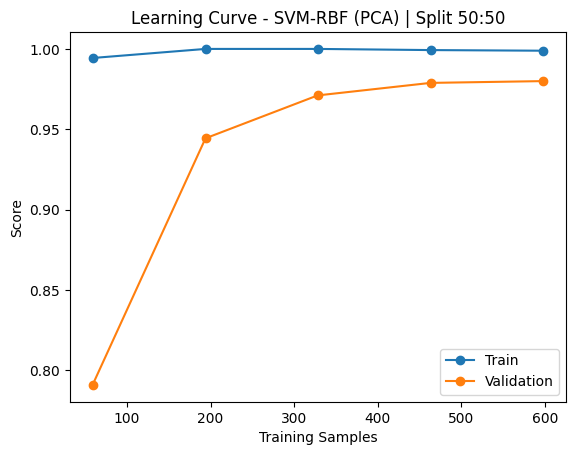


==== SVM-RBF (PCA) | Train-Test Split 60:40 ====
              precision    recall  f1-score   support

           0     1.0000    0.9859    0.9929        71
           1     0.9605    1.0000    0.9799        73
           2     1.0000    0.9718    0.9857        71
           3     1.0000    1.0000    1.0000        73
           4     0.9863    1.0000    0.9931        72
           5     1.0000    0.9863    0.9931        73
           6     1.0000    1.0000    1.0000        72
           7     0.9474    1.0000    0.9730        72
           8     1.0000    0.9714    0.9855        70
           9     0.9857    0.9583    0.9718        72

    accuracy                         0.9875       719
   macro avg     0.9880    0.9874    0.9875       719
weighted avg     0.9879    0.9875    0.9875       719



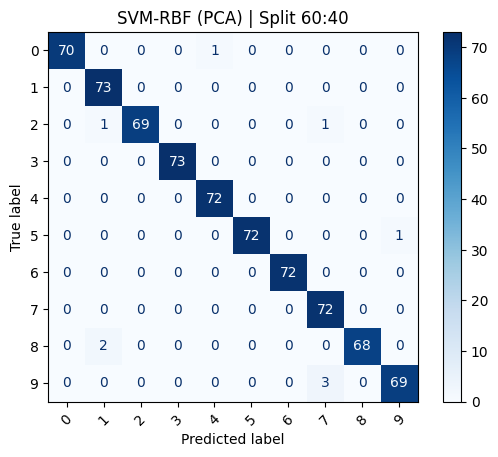

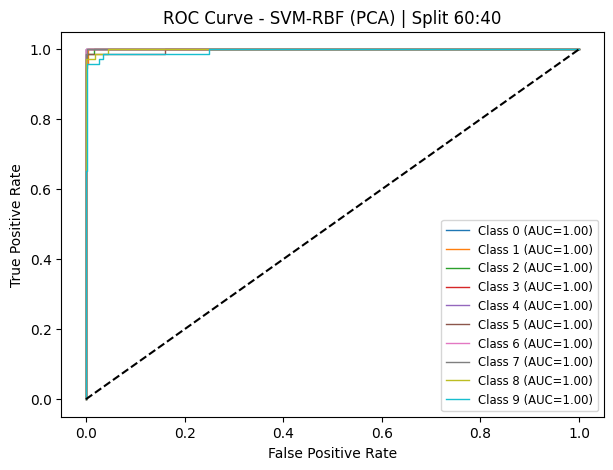

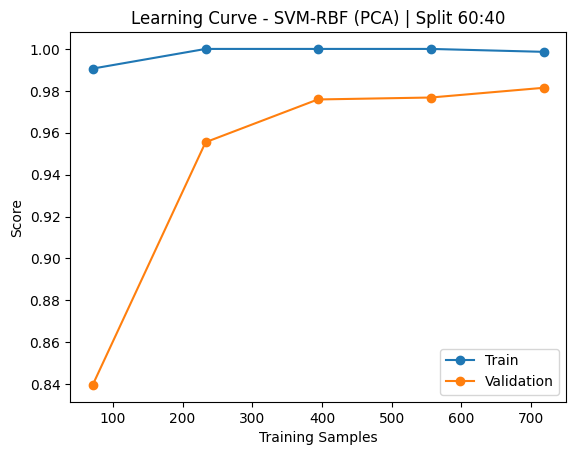


==== SVM-RBF (PCA) | Train-Test Split 70:30 ====
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        54
           1     0.9483    1.0000    0.9735        55
           2     1.0000    1.0000    1.0000        53
           3     1.0000    1.0000    1.0000        55
           4     1.0000    1.0000    1.0000        54
           5     1.0000    0.9818    0.9908        55
           6     1.0000    0.9815    0.9907        54
           7     0.9818    1.0000    0.9908        54
           8     0.9800    0.9423    0.9608        52
           9     0.9815    0.9815    0.9815        54

    accuracy                         0.9889       540
   macro avg     0.9892    0.9887    0.9888       540
weighted avg     0.9891    0.9889    0.9889       540



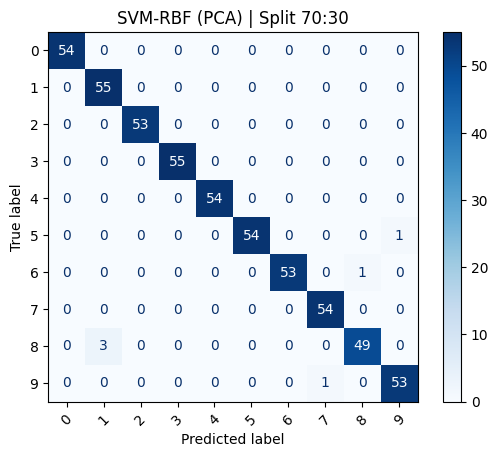

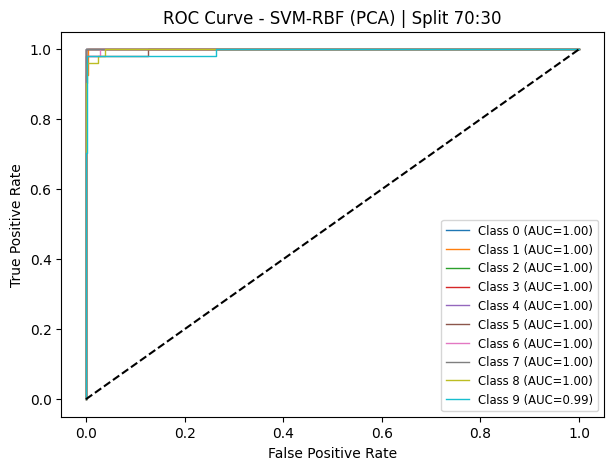

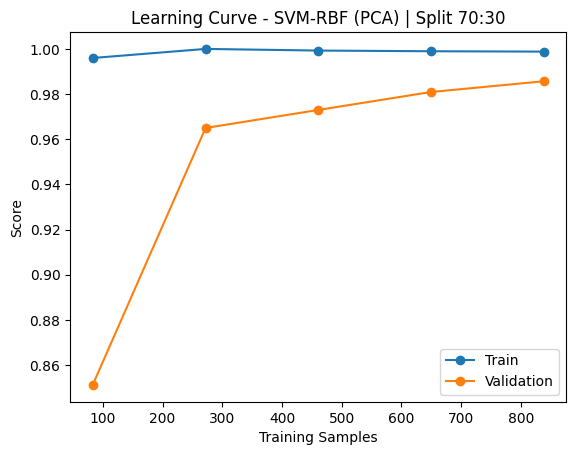


==== SVM-RBF (PCA) | Train-Test Split 80:20 ====
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        36
           1     0.9474    1.0000    0.9730        36
           2     1.0000    1.0000    1.0000        35
           3     1.0000    1.0000    1.0000        37
           4     1.0000    1.0000    1.0000        36
           5     1.0000    1.0000    1.0000        37
           6     1.0000    0.9722    0.9859        36
           7     0.9730    1.0000    0.9863        36
           8     0.9706    0.9429    0.9565        35
           9     1.0000    0.9722    0.9859        36

    accuracy                         0.9889       360
   macro avg     0.9891    0.9887    0.9888       360
weighted avg     0.9892    0.9889    0.9889       360



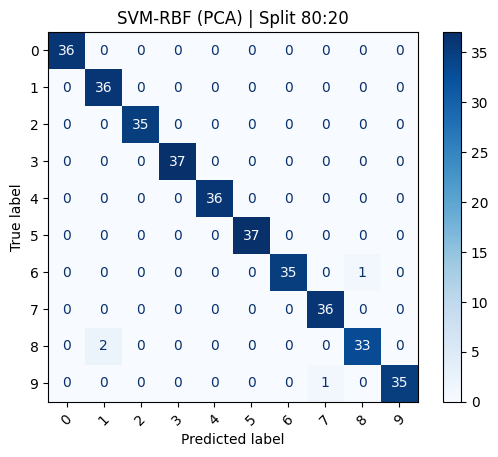

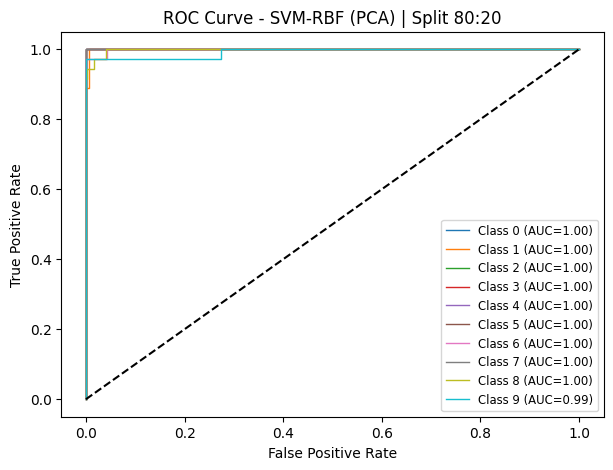

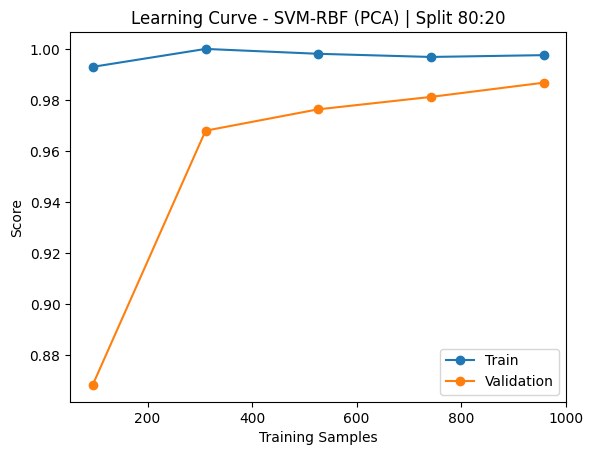

In [72]:
# SVM - RBF (Gaussian)
model_rbf_pca = SVC(kernel='rbf', random_state=42)
evaluate_model(model_rbf_pca, X_pca, y, model_name="SVM-RBF (PCA)")



==== SVM-Sigmoid (PCA) | Train-Test Split 50:50 ====
              precision    recall  f1-score   support

           0     1.0000    0.9888    0.9944        89
           1     0.7500    0.8901    0.8141        91
           2     0.9762    0.9318    0.9535        88
           3     0.9886    0.9457    0.9667        92
           4     0.9341    0.9341    0.9341        91
           5     0.9570    0.9780    0.9674        91
           6     0.9783    0.9890    0.9836        91
           7     0.9158    0.9775    0.9457        89
           8     0.9359    0.8391    0.8848        87
           9     0.9268    0.8444    0.8837        90

    accuracy                         0.9321       899
   macro avg     0.9363    0.9318    0.9328       899
weighted avg     0.9361    0.9321    0.9329       899



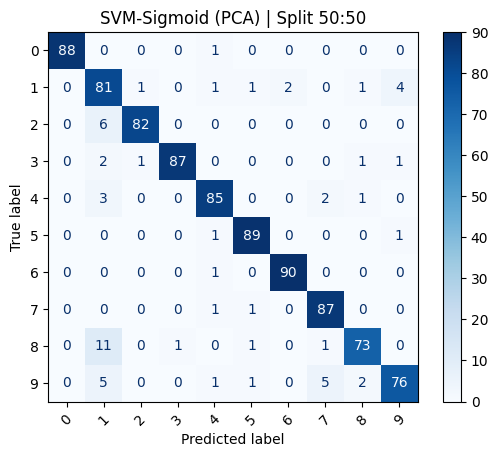

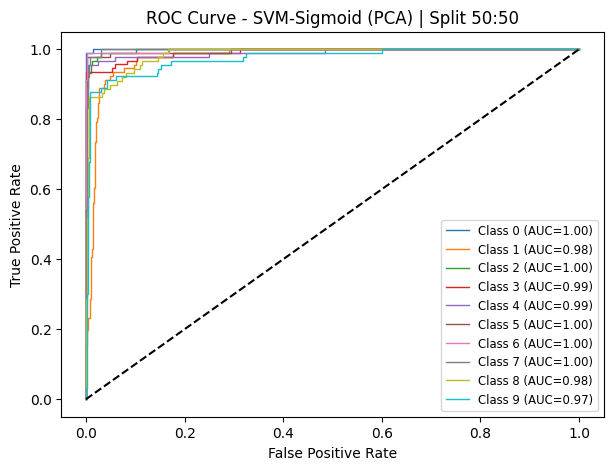

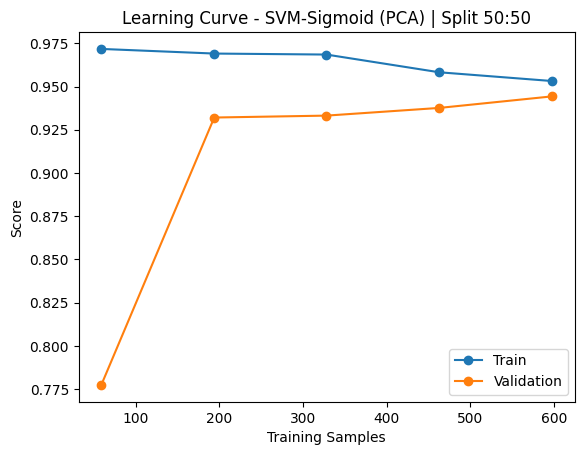


==== SVM-Sigmoid (PCA) | Train-Test Split 60:40 ====
              precision    recall  f1-score   support

           0     1.0000    0.9859    0.9929        71
           1     0.7647    0.8904    0.8228        73
           2     0.9710    0.9437    0.9571        71
           3     1.0000    0.9726    0.9861        73
           4     0.9306    0.9306    0.9306        72
           5     0.9730    0.9863    0.9796        73
           6     0.9595    0.9861    0.9726        72
           7     0.9211    0.9722    0.9459        72
           8     0.9828    0.8143    0.8906        70
           9     0.9286    0.9028    0.9155        72

    accuracy                         0.9388       719
   macro avg     0.9431    0.9385    0.9394       719
weighted avg     0.9428    0.9388    0.9394       719



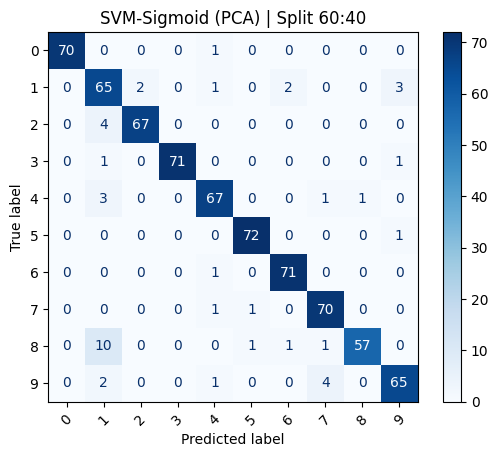

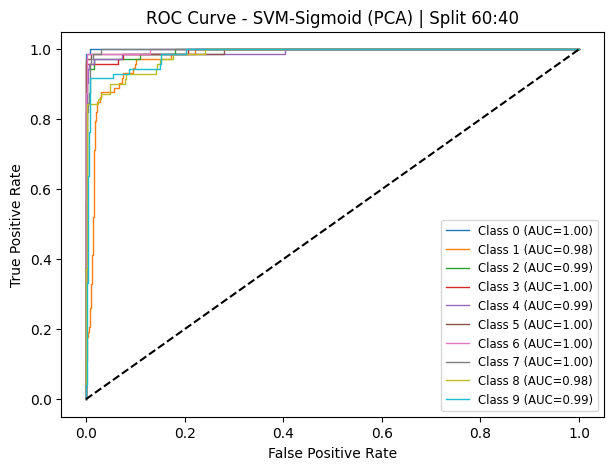

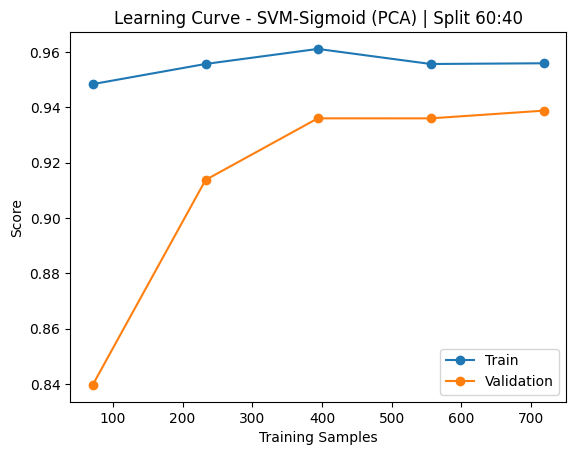


==== SVM-Sigmoid (PCA) | Train-Test Split 70:30 ====
              precision    recall  f1-score   support

           0     1.0000    0.9815    0.9907        54
           1     0.7667    0.8364    0.8000        55
           2     0.9444    0.9623    0.9533        53
           3     1.0000    0.9818    0.9908        55
           4     0.9074    0.9074    0.9074        54
           5     0.9818    0.9818    0.9818        55
           6     0.9636    0.9815    0.9725        54
           7     0.9138    0.9815    0.9464        54
           8     0.9333    0.8077    0.8660        52
           9     0.9231    0.8889    0.9057        54

    accuracy                         0.9315       540
   macro avg     0.9334    0.9311    0.9315       540
weighted avg     0.9333    0.9315    0.9316       540



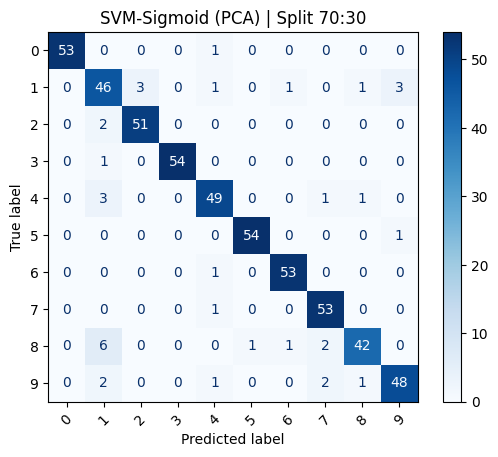

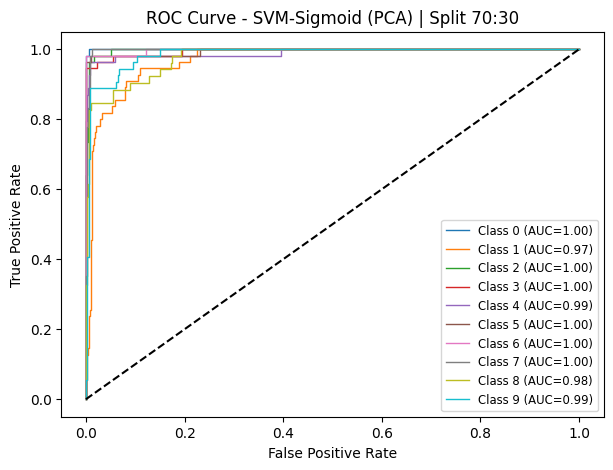

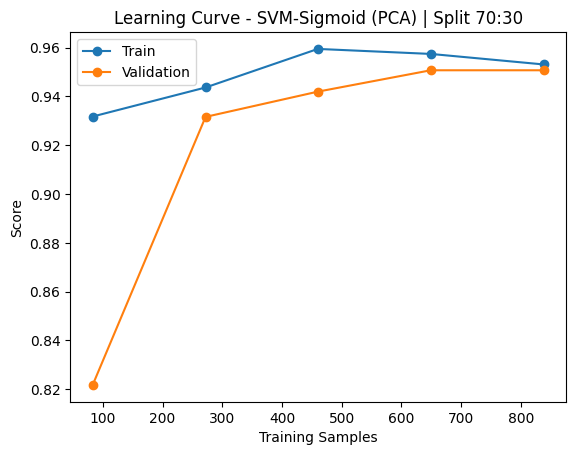


==== SVM-Sigmoid (PCA) | Train-Test Split 80:20 ====
              precision    recall  f1-score   support

           0     1.0000    0.9722    0.9859        36
           1     0.7647    0.7222    0.7429        36
           2     0.9722    1.0000    0.9859        35
           3     1.0000    1.0000    1.0000        37
           4     0.8250    0.9167    0.8684        36
           5     0.9737    1.0000    0.9867        37
           6     0.9459    0.9722    0.9589        36
           7     0.8974    0.9722    0.9333        36
           8     0.9333    0.8000    0.8615        35
           9     0.9118    0.8611    0.8857        36

    accuracy                         0.9222       360
   macro avg     0.9224    0.9217    0.9209       360
weighted avg     0.9226    0.9222    0.9213       360



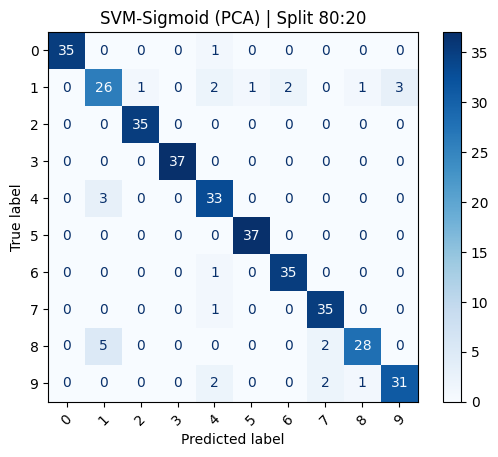

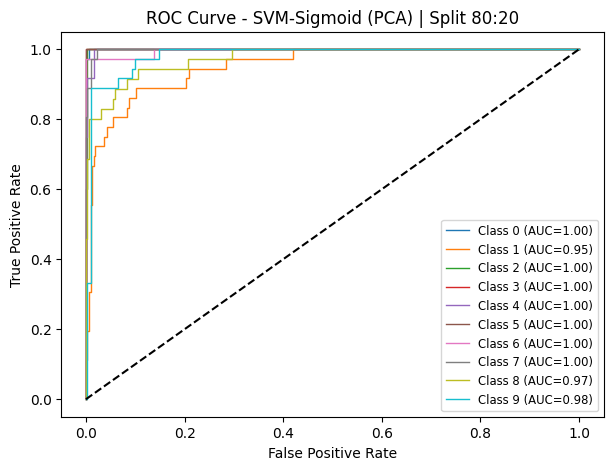

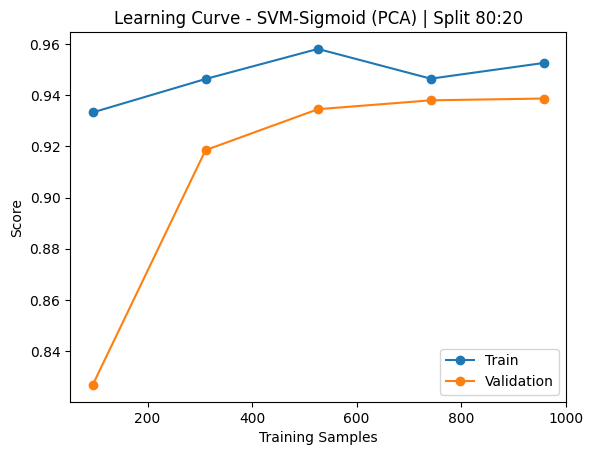

In [73]:
# SVM - Sigmoid
model_sigmoid_pca = SVC(kernel='sigmoid', random_state=42)
evaluate_model(model_sigmoid_pca, X_pca, y, model_name="SVM-Sigmoid (PCA)")



==== MLP (PCA) | Train-Test Split 50:50 ====
              precision    recall  f1-score   support

           0     1.0000    0.9775    0.9886        89
           1     0.9474    0.9890    0.9677        91
           2     0.9770    0.9659    0.9714        88
           3     0.9278    0.9783    0.9524        92
           4     0.9891    1.0000    0.9945        91
           5     0.9667    0.9560    0.9613        91
           6     0.9890    0.9890    0.9890        91
           7     0.9462    0.9888    0.9670        89
           8     0.9529    0.9310    0.9419        87
           9     0.9634    0.8778    0.9186        90

    accuracy                         0.9655       899
   macro avg     0.9660    0.9653    0.9653       899
weighted avg     0.9659    0.9655    0.9653       899



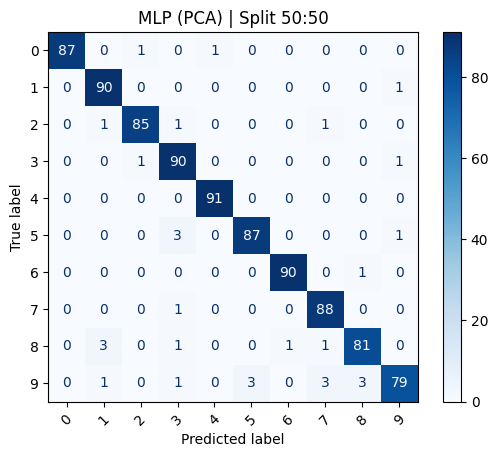

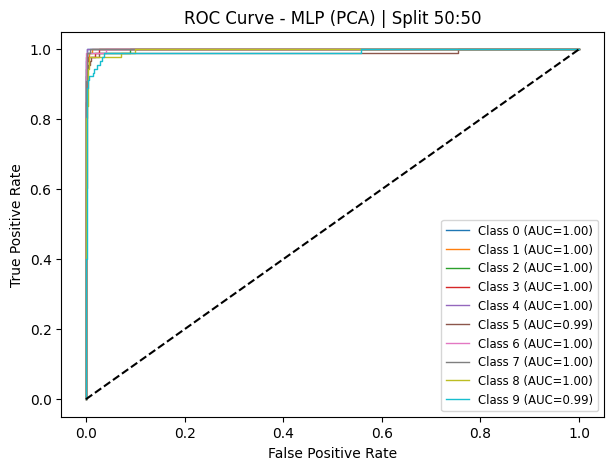

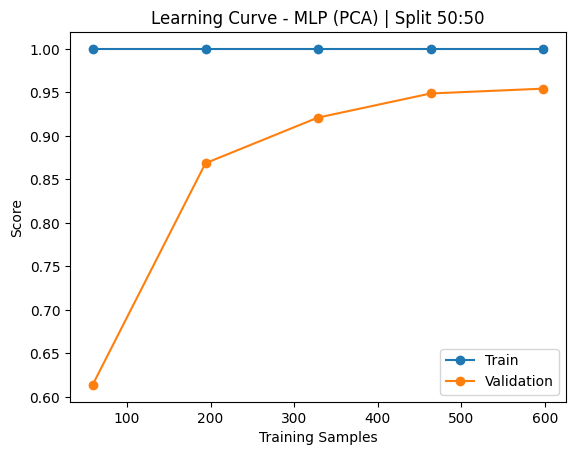

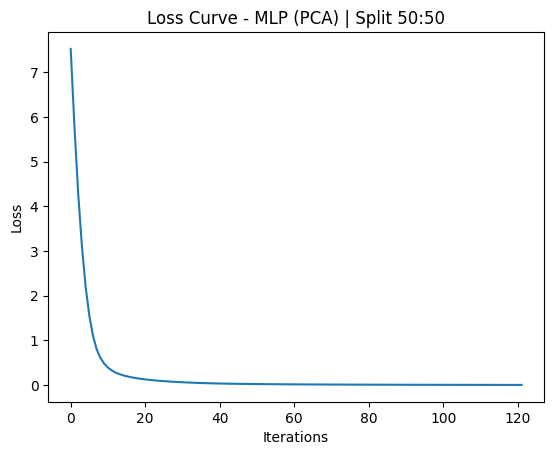


==== MLP (PCA) | Train-Test Split 60:40 ====
              precision    recall  f1-score   support

           0     1.0000    0.9718    0.9857        71
           1     0.9467    0.9726    0.9595        73
           2     0.9857    0.9718    0.9787        71
           3     0.9600    0.9863    0.9730        73
           4     0.9863    1.0000    0.9931        72
           5     1.0000    0.9589    0.9790        73
           6     0.9726    0.9861    0.9793        72
           7     0.9474    1.0000    0.9730        72
           8     0.9412    0.9143    0.9275        70
           9     0.9571    0.9306    0.9437        72

    accuracy                         0.9694       719
   macro avg     0.9697    0.9692    0.9692       719
weighted avg     0.9697    0.9694    0.9693       719



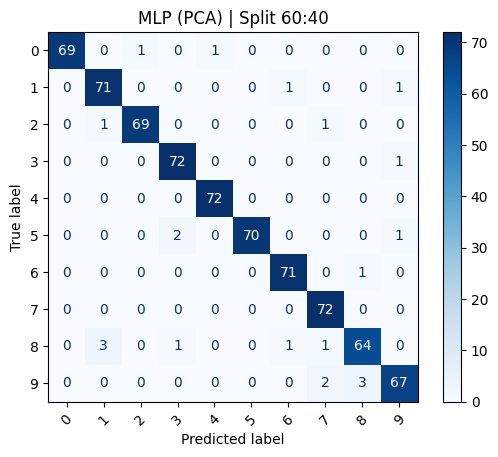

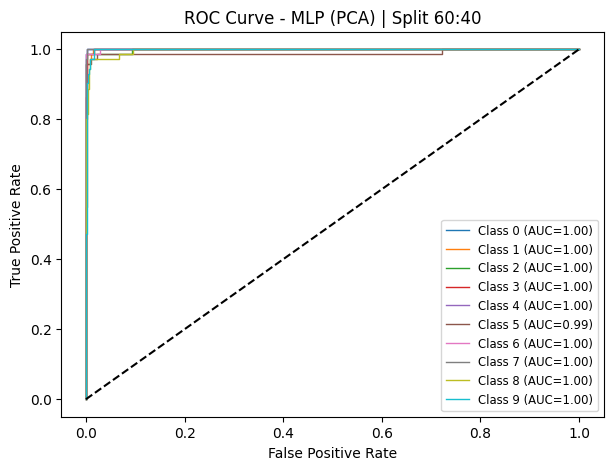

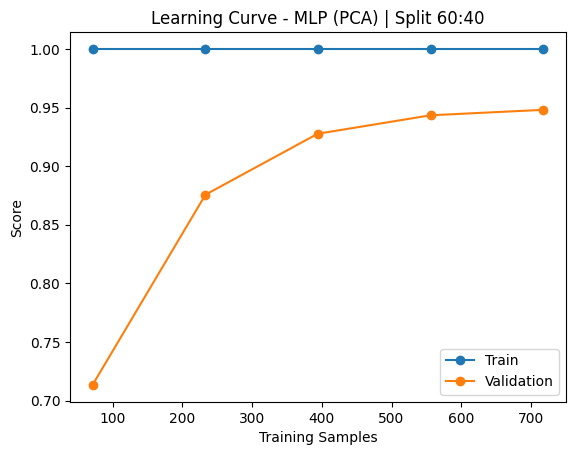

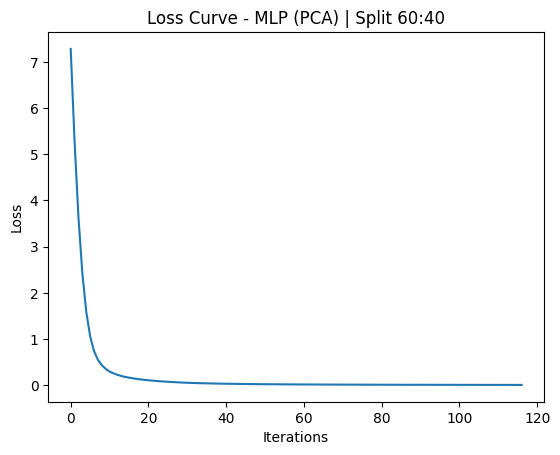


==== MLP (PCA) | Train-Test Split 70:30 ====
              precision    recall  f1-score   support

           0     1.0000    0.9630    0.9811        54
           1     0.9455    0.9455    0.9455        55
           2     0.9815    1.0000    0.9907        53
           3     1.0000    1.0000    1.0000        55
           4     0.9818    1.0000    0.9908        54
           5     0.9818    0.9818    0.9818        55
           6     0.9636    0.9815    0.9725        54
           7     0.9643    1.0000    0.9818        54
           8     0.9792    0.9038    0.9400        52
           9     0.9636    0.9815    0.9725        54

    accuracy                         0.9759       540
   macro avg     0.9761    0.9757    0.9757       540
weighted avg     0.9761    0.9759    0.9758       540



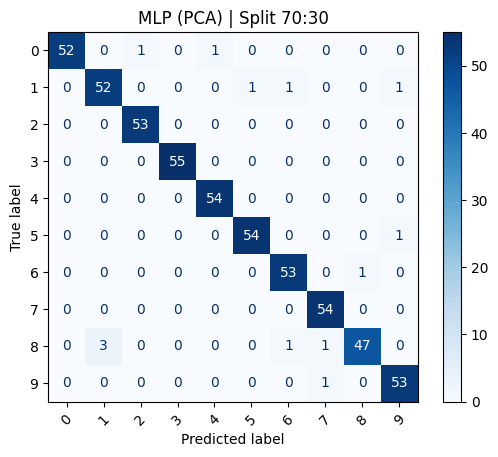

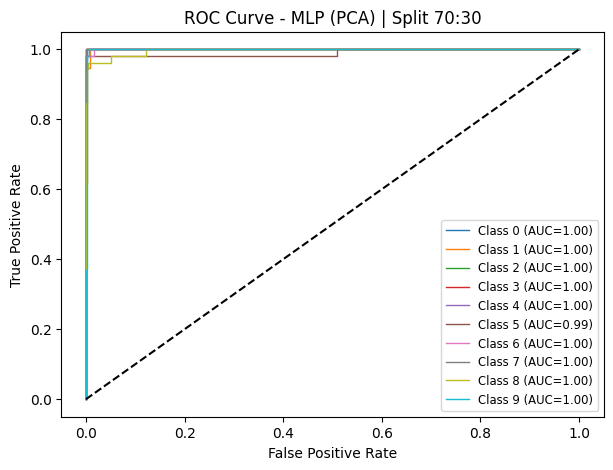

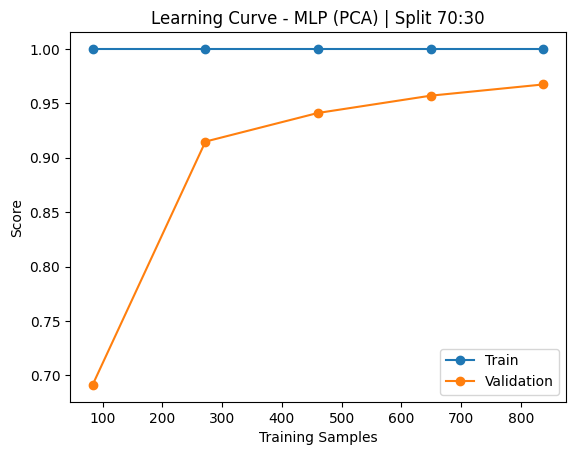

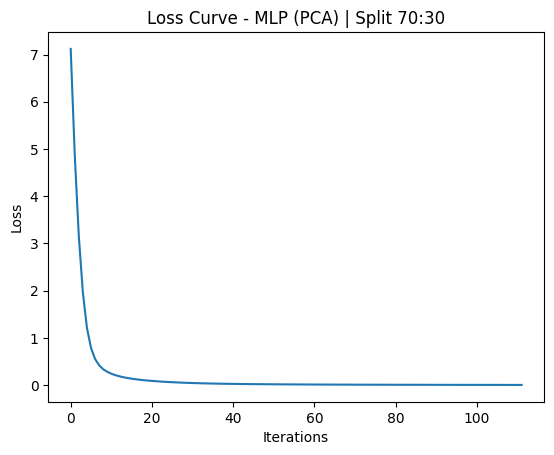


==== MLP (PCA) | Train-Test Split 80:20 ====
              precision    recall  f1-score   support

           0     1.0000    0.9444    0.9714        36
           1     0.9429    0.9167    0.9296        36
           2     0.9722    1.0000    0.9859        35
           3     1.0000    1.0000    1.0000        37
           4     0.9474    1.0000    0.9730        36
           5     1.0000    1.0000    1.0000        37
           6     0.9722    0.9722    0.9722        36
           7     0.9474    1.0000    0.9730        36
           8     0.9697    0.9143    0.9412        35
           9     0.9722    0.9722    0.9722        36

    accuracy                         0.9722       360
   macro avg     0.9724    0.9720    0.9718       360
weighted avg     0.9726    0.9722    0.9721       360



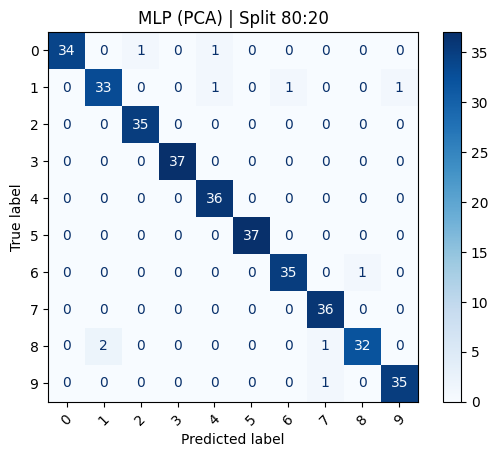

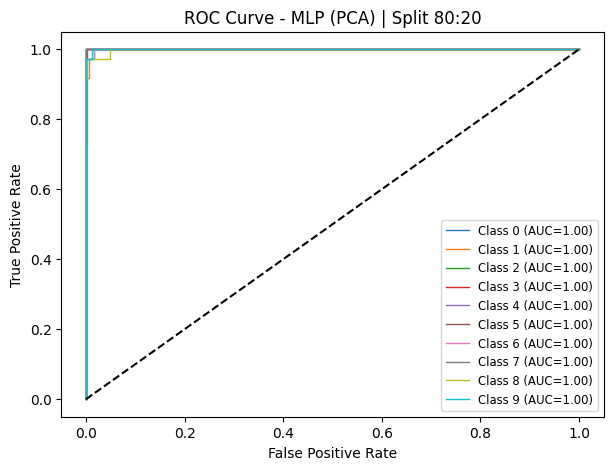

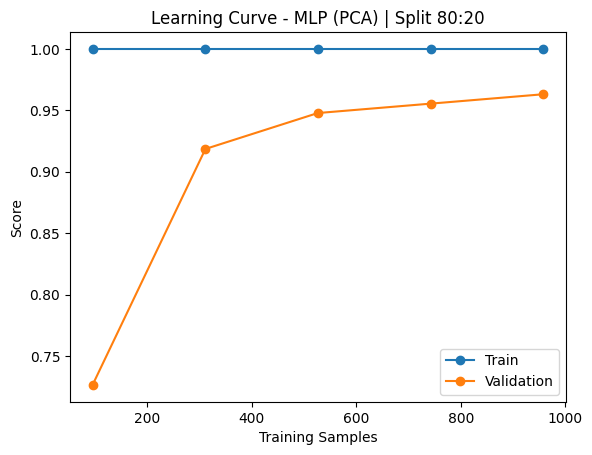

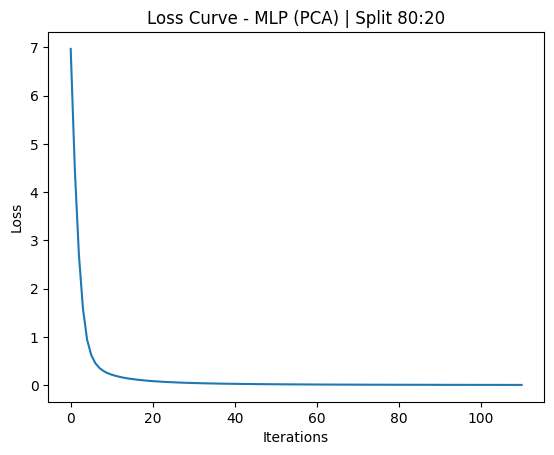

In [74]:
# MLP Classifier
mlp_pca = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=200,
    learning_rate_init=0.001,
    momentum=0.9,
    random_state=42
)
evaluate_model(mlp_pca, X_pca, y, model_name="MLP (PCA)")



==== Random Forest (PCA) | Train-Test Split 50:50 ====
              precision    recall  f1-score   support

           0     0.9888    0.9888    0.9888        89
           1     0.9175    0.9780    0.9468        91
           2     0.9765    0.9432    0.9595        88
           3     0.9773    0.9348    0.9556        92
           4     0.9674    0.9780    0.9727        91
           5     0.9362    0.9670    0.9514        91
           6     0.9889    0.9780    0.9834        91
           7     0.8900    1.0000    0.9418        89
           8     0.9524    0.9195    0.9357        87
           9     0.9375    0.8333    0.8824        90

    accuracy                         0.9522       899
   macro avg     0.9532    0.9521    0.9518       899
weighted avg     0.9533    0.9522    0.9519       899



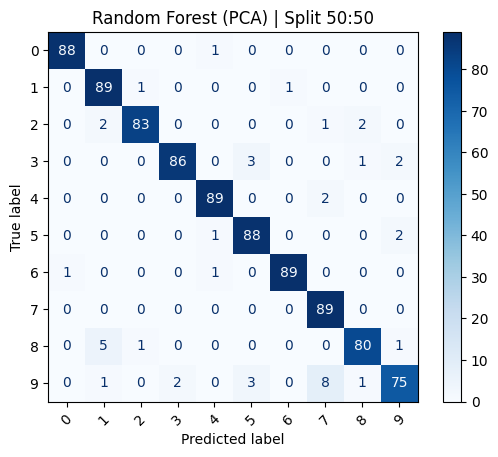

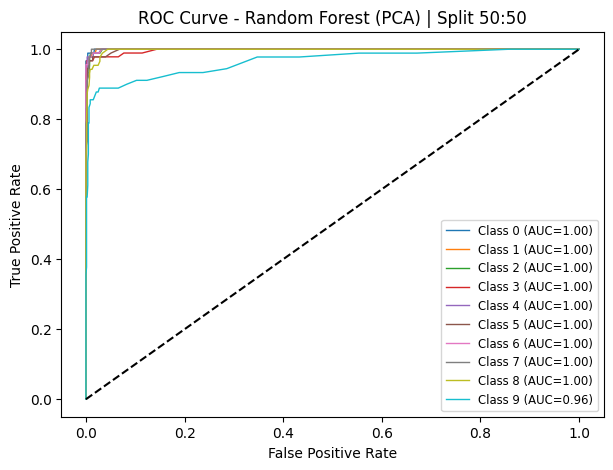

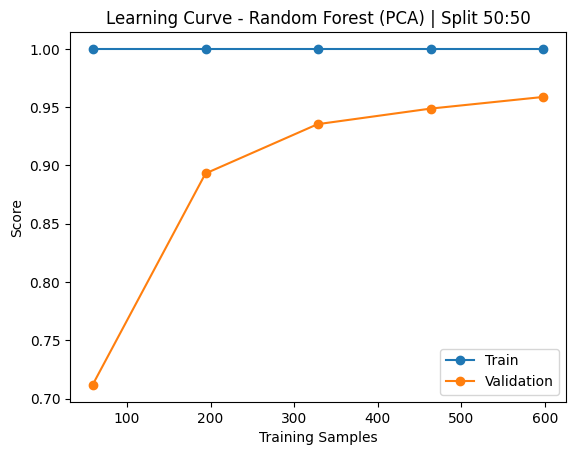


==== Random Forest (PCA) | Train-Test Split 60:40 ====
              precision    recall  f1-score   support

           0     1.0000    0.9859    0.9929        71
           1     0.8875    0.9726    0.9281        73
           2     0.9853    0.9437    0.9640        71
           3     1.0000    0.9863    0.9931        73
           4     0.9859    0.9722    0.9790        72
           5     1.0000    0.9726    0.9861        73
           6     0.9474    1.0000    0.9730        72
           7     0.8889    1.0000    0.9412        72
           8     0.9385    0.8714    0.9037        70
           9     0.9538    0.8611    0.9051        72

    accuracy                         0.9569       719
   macro avg     0.9587    0.9566    0.9566       719
weighted avg     0.9587    0.9569    0.9568       719



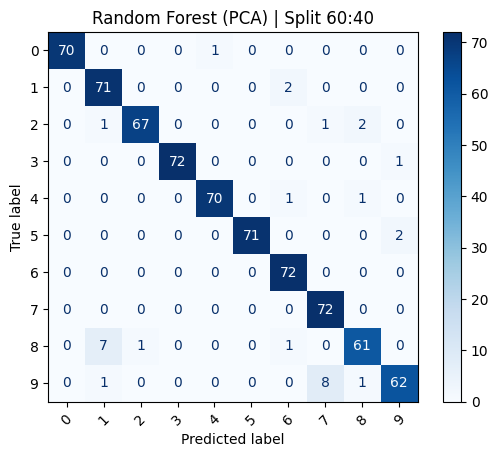

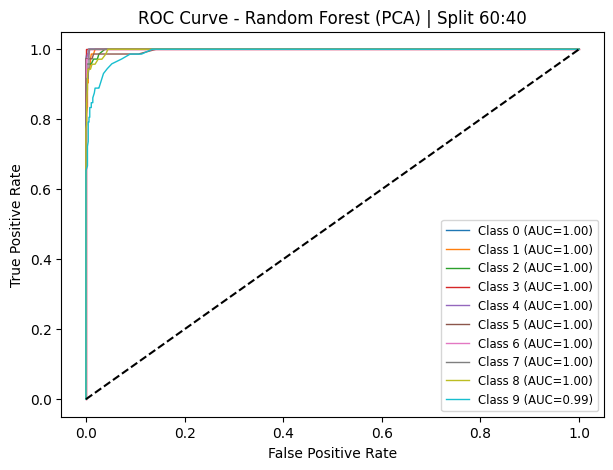

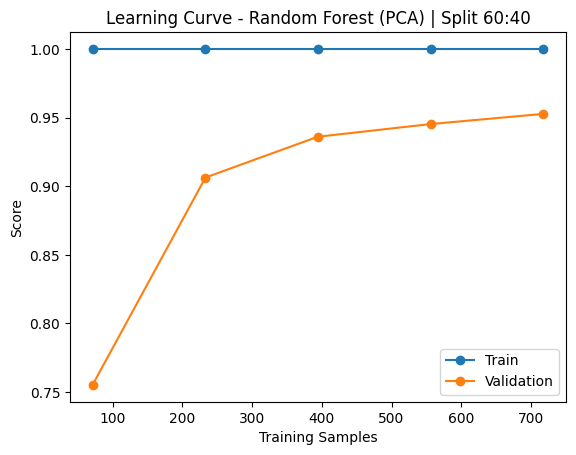


==== Random Forest (PCA) | Train-Test Split 70:30 ====
              precision    recall  f1-score   support

           0     1.0000    0.9815    0.9907        54
           1     0.9167    1.0000    0.9565        55
           2     0.9811    0.9811    0.9811        53
           3     1.0000    0.9636    0.9815        55
           4     0.9636    0.9815    0.9725        54
           5     0.9815    0.9636    0.9725        55
           6     1.0000    0.9815    0.9907        54
           7     0.9474    1.0000    0.9730        54
           8     0.9592    0.9038    0.9307        52
           9     0.9623    0.9444    0.9533        54

    accuracy                         0.9704       540
   macro avg     0.9712    0.9701    0.9702       540
weighted avg     0.9712    0.9704    0.9704       540



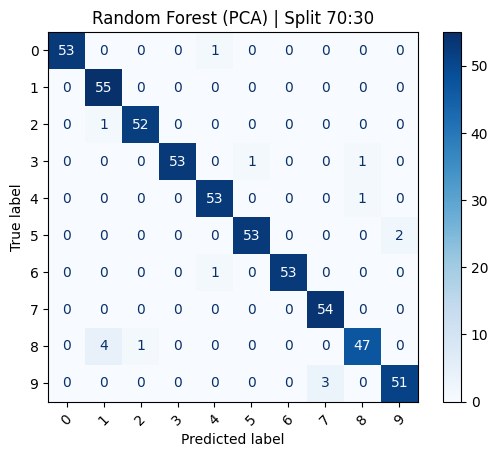

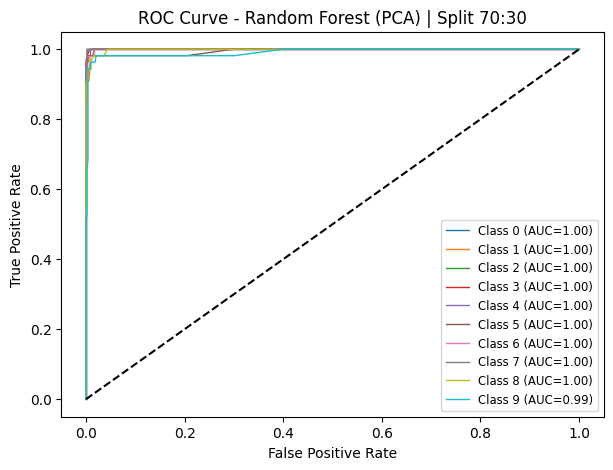

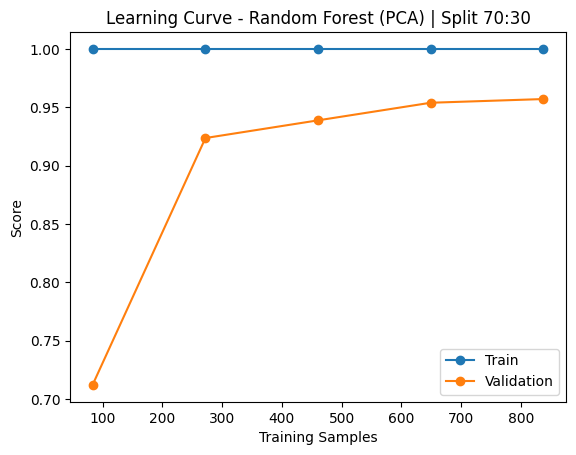


==== Random Forest (PCA) | Train-Test Split 80:20 ====
              precision    recall  f1-score   support

           0     1.0000    0.9722    0.9859        36
           1     0.9000    1.0000    0.9474        36
           2     0.9722    1.0000    0.9859        35
           3     1.0000    1.0000    1.0000        37
           4     0.9474    1.0000    0.9730        36
           5     1.0000    0.9730    0.9863        37
           6     1.0000    0.9722    0.9859        36
           7     0.9730    1.0000    0.9863        36
           8     1.0000    0.8571    0.9231        35
           9     0.9722    0.9722    0.9722        36

    accuracy                         0.9750       360
   macro avg     0.9765    0.9747    0.9746       360
weighted avg     0.9766    0.9750    0.9748       360



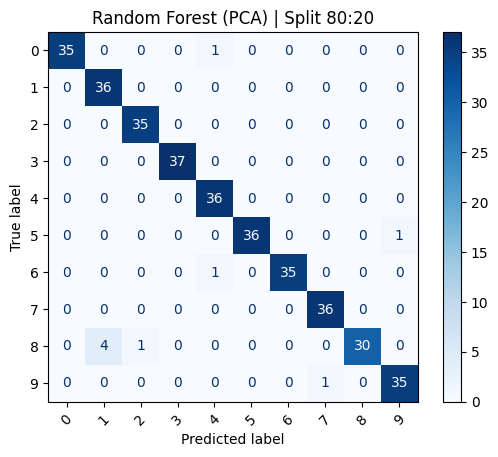

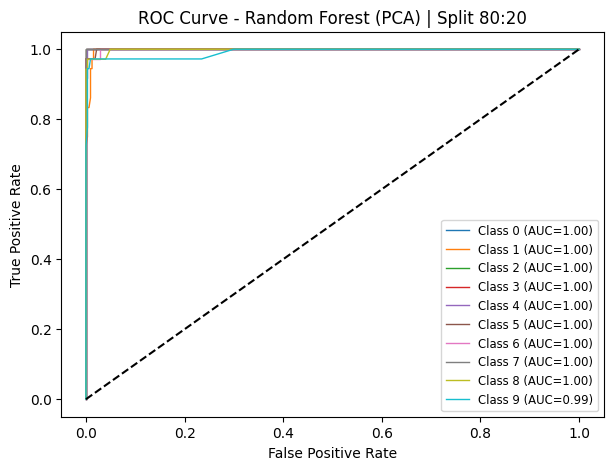

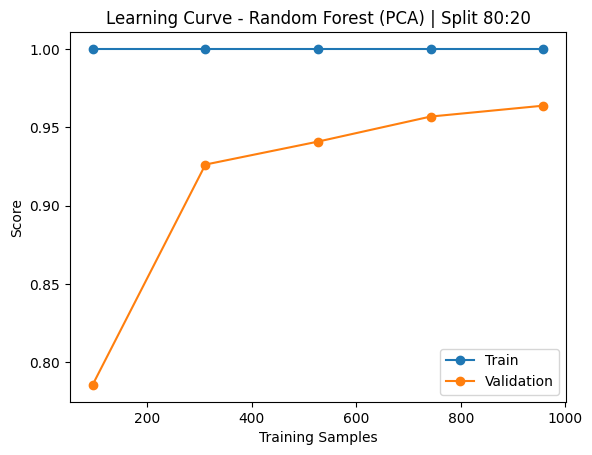

In [75]:
# Random Forest
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_pca, X_pca, y, model_name="Random Forest (PCA)")
